## Problem:

For this particular assignment, the data of different types of wine sales in the 20th century is to be analysed. Both of these data are from the same company but of different wines. As an analyst in the ABC Estate Wines, you are tasked to analyse and forecast Wine Sales in the 20th century.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

## 1 .Read the data as an appropriate Time Series data and plot the data.

The data consist of monthly wine sales for ABC Estate wines from year 1980 to 1995. It is recommended that we make our time series reference as the index while reading the data.

In [2]:
df1 = pd.read_csv('Sparkling.csv', parse_dates = True, index_col = 'YearMonth')
df1.head()

Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471

In [3]:
df2 = pd.read_csv('Rose.csv', parse_dates = True, index_col = 'YearMonth')
df2.head()

Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0

### Plot the Time Series to understand the behaviour of the data.

In [4]:
# The following code is to set the subsequent figure sizes

from pylab import rcParams
rcParams['figure.figsize'] = 15,8

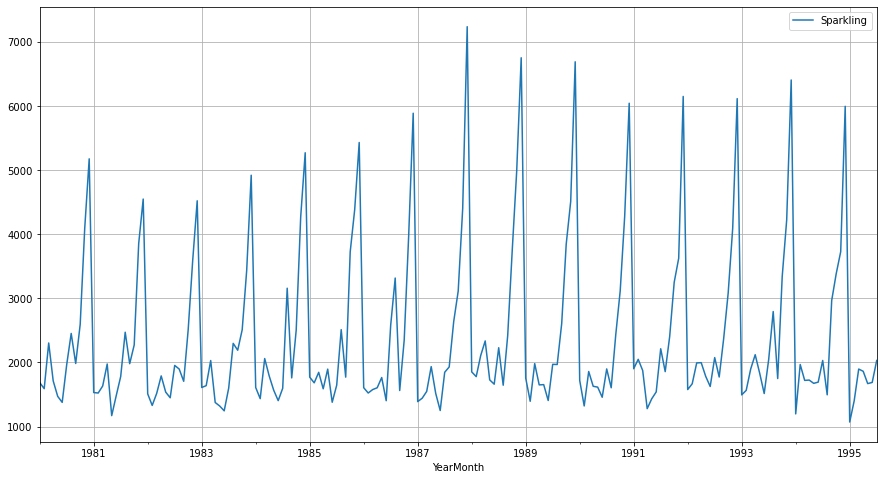

In [5]:
df1.plot()
plt.grid();

#### Observations:
- We notice that there is not much trend in the plot
- The seasonality seems to have a pattern on yearly basis

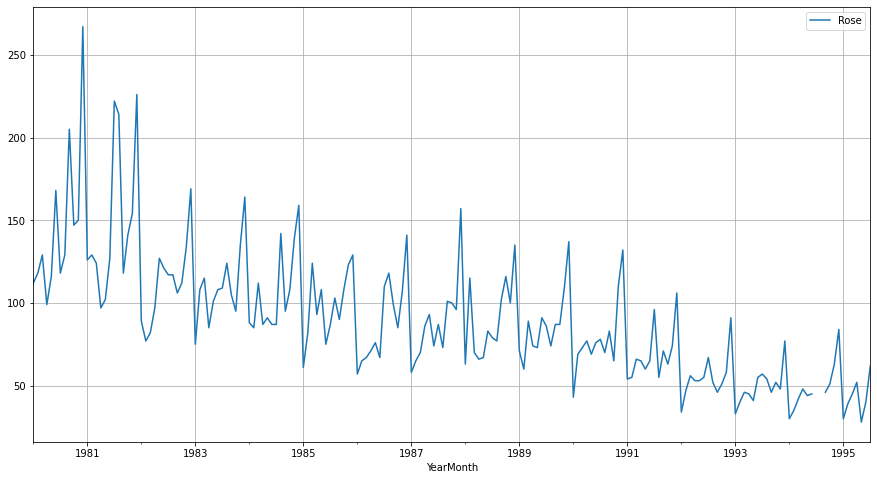

In [6]:
df2.plot()
plt.grid();

#### Observations: 
- We notice that there is an decreasing trend in the initial years which stabilizes after few years and again shows a decreasing trend
- We also observe seasonality in the data trend and pattern seem to repeat on yearly basis

## 2. Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

### Check the basic measures of descriptive statistics

The basic measures of descriptive statistics tell us how the Sales have varied across years. But remember, for this measure of descriptive statistics we have averaged over the whole data without taking the time component into account.

In [7]:
df1.describe().T

count         mean         std     min     25%     50%     75%  \
Sparkling  187.0  2402.417112  1295.11154  1070.0  1605.0  1874.0  2549.0   

              max  
Sparkling  7242.0

#### Observation:
The data consist of 187 monthly sales of Sparkling wine from year 1980 to 1995. The mean sale of wine across different months of year is ~ 2402 and the max sale is 7242 and min sale is 1070.

In [8]:
df2.describe().T

count       mean        std   min   25%   50%    75%    max
Rose  185.0  90.394595  39.175344  28.0  63.0  86.0  112.0  267.0

#### Observation:
The data consist of 187 monthly sales of Rose wine from year 1980 to 1995. The mean sale of wine across different months of year is ~ 89.9 and the max sale is 267 and min sale is 28.

### Cheching data type of data features:

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sparkling  187 non-null    int64
dtypes: int64(1)
memory usage: 2.9 KB


-  There are no missing values in Sparkling dataset.

In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    185 non-null    float64
dtypes: float64(1)
memory usage: 2.9 KB


- There are missing values in Rose dataset.

### Imputation for replacing missing values.

In [11]:
df2['1994']

<ipython-input-11-18e3fba1ed5d>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df2['1994']


Rose
YearMonth       
1994-01-01  30.0
1994-02-01  35.0
1994-03-01  42.0
1994-04-01  48.0
1994-05-01  44.0
1994-06-01  45.0
1994-07-01   NaN
1994-08-01   NaN
1994-09-01  46.0
1994-10-01  51.0
1994-11-01  63.0
1994-12-01  84.0

#### Interpolating missing values

In [12]:
df2= df2.interpolate();
print(df2)

             Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0
...           ...
1995-03-01   45.0
1995-04-01   52.0
1995-05-01   28.0
1995-06-01   40.0
1995-07-01   62.0

[187 rows x 1 columns]


In [13]:
df2['1994']

<ipython-input-13-18e3fba1ed5d>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df2['1994']


Rose
YearMonth            
1994-01-01  30.000000
1994-02-01  35.000000
1994-03-01  42.000000
1994-04-01  48.000000
1994-05-01  44.000000
1994-06-01  45.000000
1994-07-01  45.333333
1994-08-01  45.666667
1994-09-01  46.000000
1994-10-01  51.000000
1994-11-01  63.000000
1994-12-01  84.000000

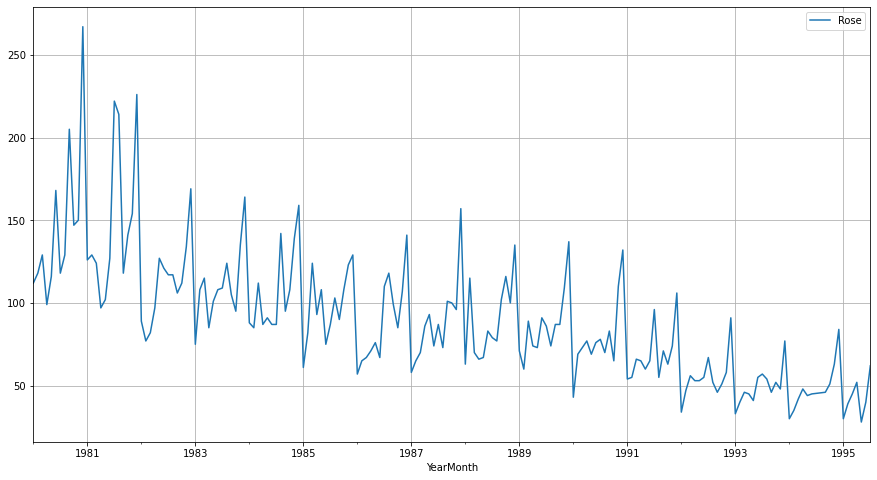

In [14]:
df2.plot()
plt.grid();

## EDA

### Plot a boxplot to understand the spread of sales across different years and within different months across years.

### Yearly Sale Boxplot for Sparkling wine.

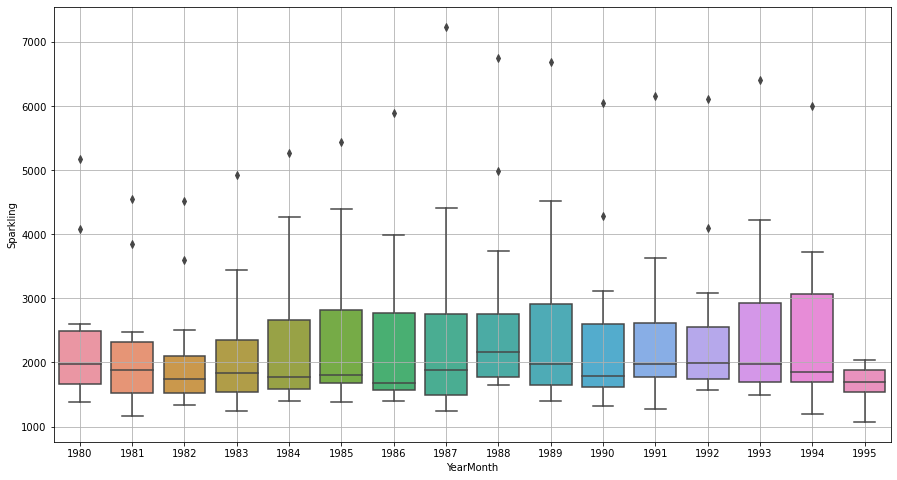

In [15]:
sns.boxplot(x = df1.index.year,y = df1['Sparkling'])
plt.grid();

#### Observations:
- From the above yearly plot, we see that the box plots do not indicate any trend.
- We also observe that the sale of Sparkling wine has outliers for almost all the years except 1955.
- The highest mean sale for sprinkling is shown in year 1988 and the lowest sales are in the year of 1995.
- The sales remain stagnant between years 1991-1993 and then starts decreasing slightly. 
- There is no increasing or decreasing trend in sale throughout the given time series. 
- The sale of Sparkling is quite stagnant and management should definitely work on why the sales are not showing any trend.

### Yearly Sale Boxplot for Rose wine.

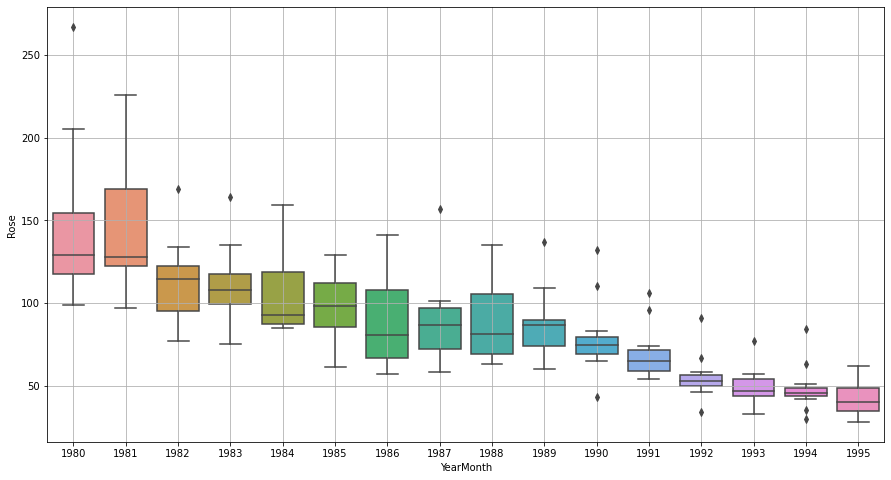

In [16]:
sns.boxplot(x = df2.index.year,y = df2['Rose'])
plt.grid();

#### Observations:
- From the yearly above plot we see that the box plots indicates a downward trend.
- We also observe that there are few outliers present in the Rose wine sales plot.

### MonthlySale Boxplot for Sparkling wine.

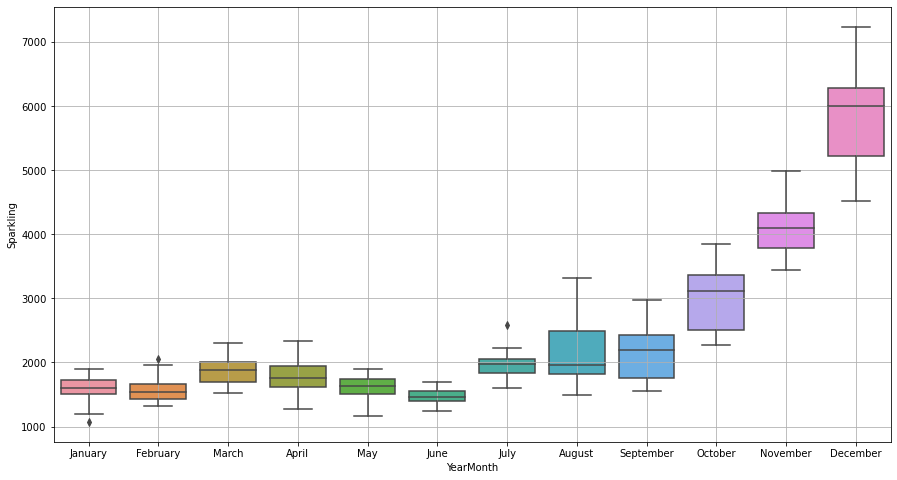

In [17]:
sns.boxplot(x = df1.index.month_name(),y = df1['Sparkling'])
plt.grid();

#### Observations:
- The highest monthly sale of wine is in month of Nov-Dec, this may be due to winter and festival season.
- The sale is quite stagnant in starting months till May and then there is incresing trend from July. 
- The above plot concludes that people love drinking wine in winter.


### MonthlySale Boxplot for Rose wine.

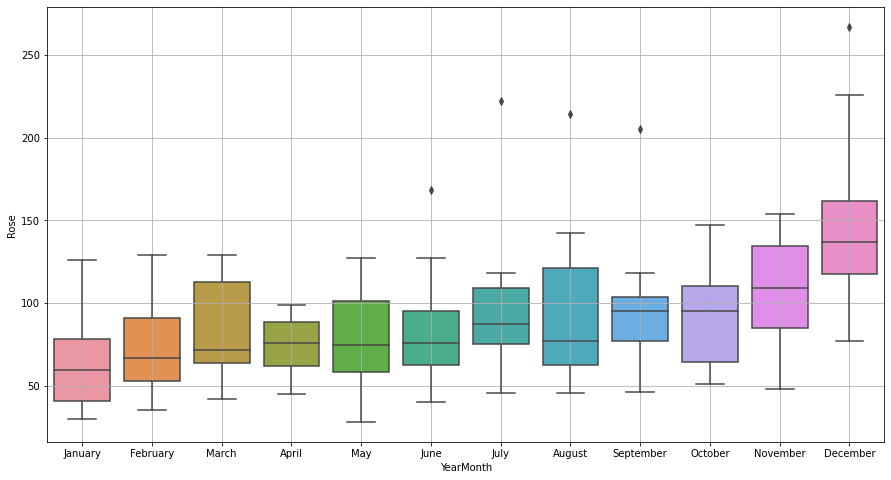

In [18]:
sns.boxplot(x = df2.index.month_name(),y = df2['Rose'])
plt.grid();

#### Observations: 
- The highest monthly sale of wine is in month of Nov-Dec, this may be due to winter and festival season.
- From the above plot, we see that December month has the highest sales of wine.
- There are also outliers present in June, July, August and September months.

### Plot a time series monthplot to understand the spread of Sales across different years and within different months across years for Sparkling wine.

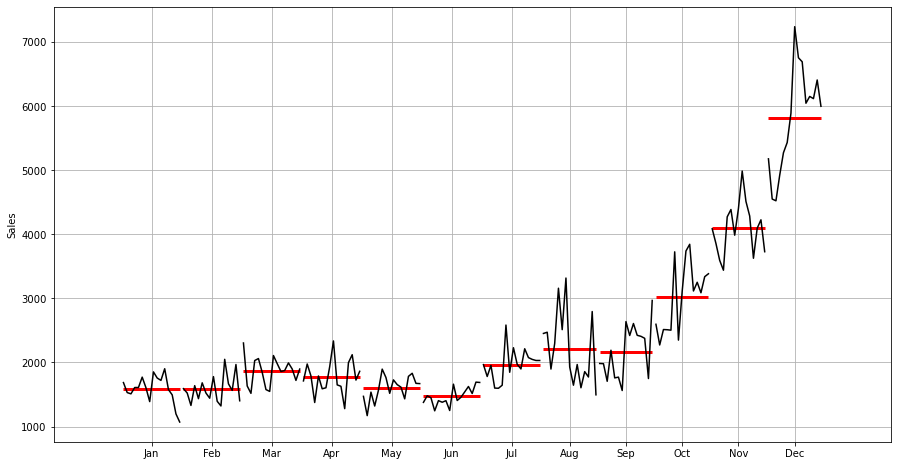

In [19]:
from statsmodels.graphics.tsaplots import month_plot

month_plot(df1['Sparkling'],ylabel='Sales')
plt.grid();

#### Observations:
- This plot shows us the behaviour of the Time Series Sparkling wine  across various months. 
- The red line is the median value.

### Plot a time series monthplot to understand the spread of Sales across different years and within different months across years for Rose wine.

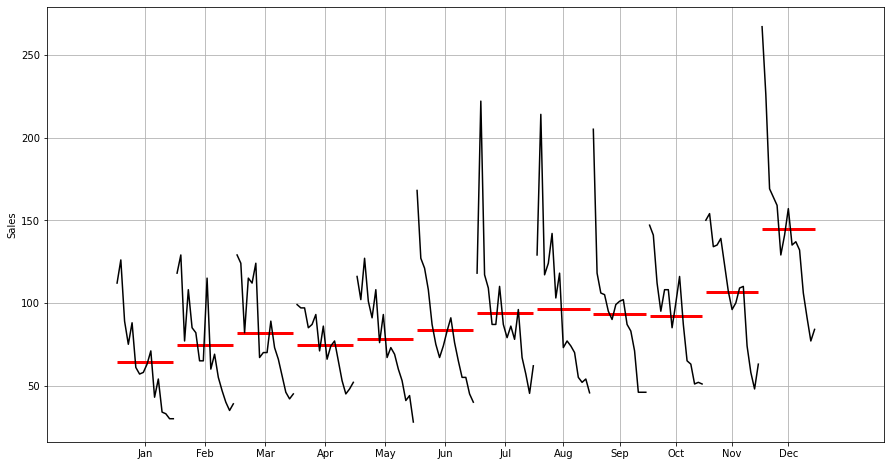

In [20]:
from statsmodels.graphics.tsaplots import month_plot

month_plot(df2['Rose'],ylabel='Sales')
plt.grid();

#### Observations:
- This plot shows us the behaviour of the Time Series Rose wine across various months.
- The red line is the median value.

### Plot a graph of monthly Sales of Sparkling wine across years.

In [21]:
monthly_sales_across_years = pd.pivot_table(df1, values = 'Sparkling', columns = df1.index.month, index = df1.index.year)
monthly_sales_across_years

YearMonth      1       2       3       4       5       6       7       8   \
YearMonth                                                                   
1980       1686.0  1591.0  2304.0  1712.0  1471.0  1377.0  1966.0  2453.0   
1981       1530.0  1523.0  1633.0  1976.0  1170.0  1480.0  1781.0  2472.0   
1982       1510.0  1329.0  1518.0  1790.0  1537.0  1449.0  1954.0  1897.0   
1983       1609.0  1638.0  2030.0  1375.0  1320.0  1245.0  1600.0  2298.0   
1984       1609.0  1435.0  2061.0  1789.0  1567.0  1404.0  1597.0  3159.0   
1985       1771.0  1682.0  1846.0  1589.0  1896.0  1379.0  1645.0  2512.0   
1986       1606.0  1523.0  1577.0  1605.0  1765.0  1403.0  2584.0  3318.0   
1987       1389.0  1442.0  1548.0  1935.0  1518.0  1250.0  1847.0  1930.0   
1988       1853.0  1779.0  2108.0  2336.0  1728.0  1661.0  2230.0  1645.0   
1989       1757.0  1394.0  1982.0  1650.0  1654.0  1406.0  1971.0  1968.0   
1990       1720.0  1321.0  1859.0  1628.0  1615.0  1457.0  1899.0  1605.0   
1991       1902.0  2049.0  1874.0  1279.0  1432.0  1540.0  2214.0  1857.0   
1992       1577.0  1667.0  1993.0  1997.0  1783.0  1625.0  2076.0  1773.0   
1993       1494.0  1564.0  1898.0  2121.0  1831.0  1515.0  2048.0  2795.0   
1994       1197.0  1968.0  1720.0  1725.0  1674.0  1693.0  2031.0  1495.0   
1995       1070.0  1402.0  1897.0  1862.0  1670.0  1688.0  2031.0     NaN   

YearMonth      9       10      11      12  
YearMonth                                  
1980       1984.0  2596.0  4087.0  5179.0  
1981       1981.0  2273.0  3857.0  4551.0  
1982       1706.0  2514.0  3593.0  4524.0  
1983       2191.0  2511.0  3440.0  4923.0  
1984       1759.0  2504.0  4273.0  5274.0  
1985       1771.0  3727.0  4388.0  5434.0  
1986       1562.0  2349.0  3987.0  5891.0  
1987       2638.0  3114.0  4405.0  7242.0  
1988       2421.0  3740.0  4988.0  6757.0  
1989       2608.0  3845.0  4514.0  6694.0  
1990       2424.0  3116.0  4286.0  6047.0  
1991       2408.0  3252.0  3627.0  6153.0  
1992       2377.0  3088.0  4096.0  6119.0  
1993       1749.0  3339.0  4227.0  6410.0  
1994       2968.0  3385.0  3729.0  5999.0  
1995          NaN     NaN     NaN     NaN

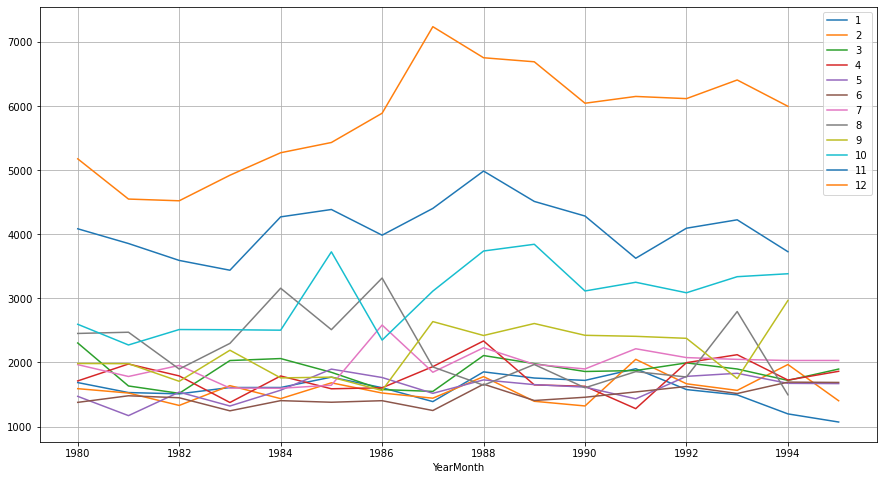

In [22]:
monthly_sales_across_years.plot()
plt.grid()
plt.legend(loc='best');

#### Observations:
- The number 1-12 indicates the month of years from January to December. The highest sales of sparking wine is in the month of December and the lowest and very stagnant sales is in the month of June for all the years.
- The sale for wine in month of August is good till 1986 and then there is steep decrease in later years.

### Plot a graph of monthly Sales of Rose wine across years.

In [23]:
monthly_sales_across_years_rose = pd.pivot_table(df2, values = 'Rose', columns = df2.index.month, index = df2.index.year)
monthly_sales_across_years_rose

YearMonth     1      2      3     4      5      6           7           8   \
YearMonth                                                                    
1980       112.0  118.0  129.0  99.0  116.0  168.0  118.000000  129.000000   
1981       126.0  129.0  124.0  97.0  102.0  127.0  222.000000  214.000000   
1982        89.0   77.0   82.0  97.0  127.0  121.0  117.000000  117.000000   
1983        75.0  108.0  115.0  85.0  101.0  108.0  109.000000  124.000000   
1984        88.0   85.0  112.0  87.0   91.0   87.0   87.000000  142.000000   
1985        61.0   82.0  124.0  93.0  108.0   75.0   87.000000  103.000000   
1986        57.0   65.0   67.0  71.0   76.0   67.0  110.000000  118.000000   
1987        58.0   65.0   70.0  86.0   93.0   74.0   87.000000   73.000000   
1988        63.0  115.0   70.0  66.0   67.0   83.0   79.000000   77.000000   
1989        71.0   60.0   89.0  74.0   73.0   91.0   86.000000   74.000000   
1990        43.0   69.0   73.0  77.0   69.0   76.0   78.000000   70.000000   
1991        54.0   55.0   66.0  65.0   60.0   65.0   96.000000   55.000000   
1992        34.0   47.0   56.0  53.0   53.0   55.0   67.000000   52.000000   
1993        33.0   40.0   46.0  45.0   41.0   55.0   57.000000   54.000000   
1994        30.0   35.0   42.0  48.0   44.0   45.0   45.333333   45.666667   
1995        30.0   39.0   45.0  52.0   28.0   40.0   62.000000         NaN   

YearMonth     9      10     11     12  
YearMonth                              
1980       205.0  147.0  150.0  267.0  
1981       118.0  141.0  154.0  226.0  
1982       106.0  112.0  134.0  169.0  
1983       105.0   95.0  135.0  164.0  
1984        95.0  108.0  139.0  159.0  
1985        90.0  108.0  123.0  129.0  
1986        99.0   85.0  107.0  141.0  
1987       101.0  100.0   96.0  157.0  
1988       102.0  116.0  100.0  135.0  
1989        87.0   87.0  109.0  137.0  
1990        83.0   65.0  110.0  132.0  
1991        71.0   63.0   74.0  106.0  
1992        46.0   51.0   58.0   91.0  
1993        46.0   52.0   48.0   77.0  
1994        46.0   51.0   63.0   84.0  
1995         NaN    NaN    NaN    NaN

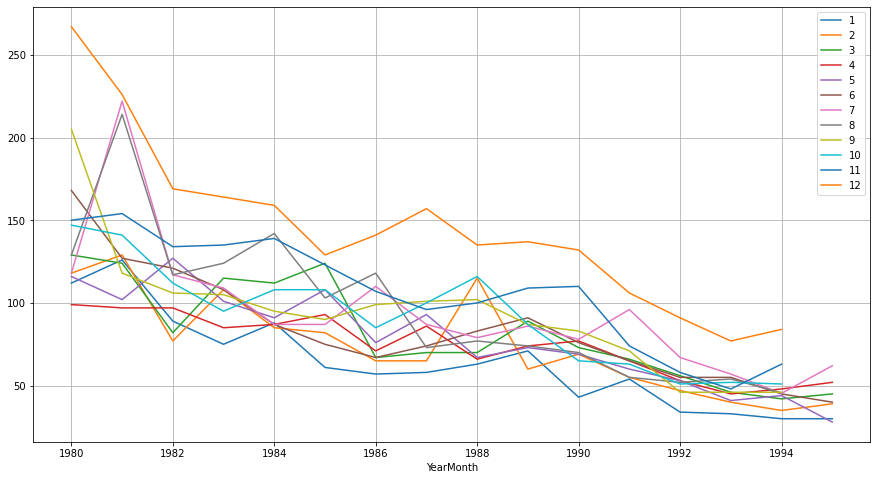

In [24]:
monthly_sales_across_years_rose.plot()
plt.grid()
plt.legend(loc='best');

#### Observations:
- The number 1-12 indicates the month of years from January to December. The highest sales of Rose wine is in the month of December and January, February and May show relatively lower sales.
- Company can start promoting and advertising during winter to increase its sales.

### Plot the Empirical Cumulative Distribution for Sparkling wine

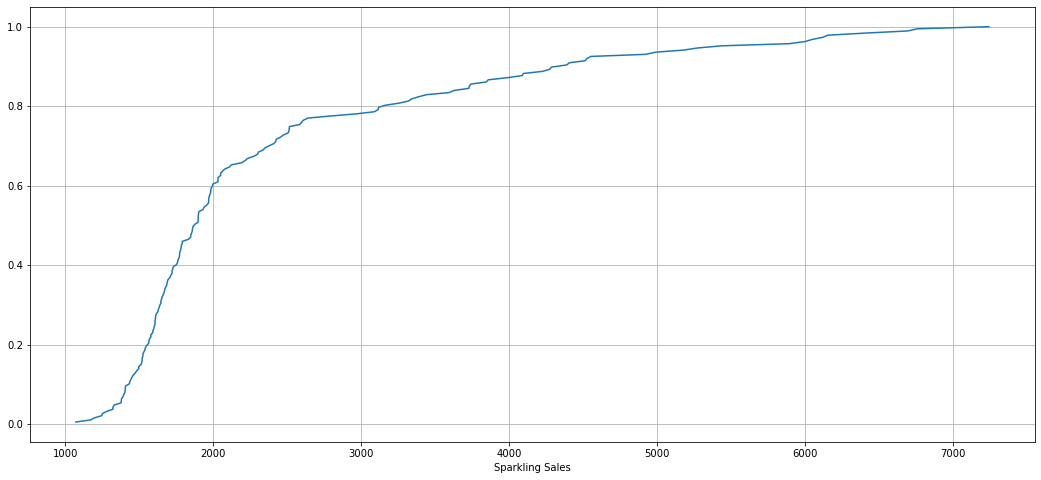

In [25]:
# statistics
from statsmodels.distributions.empirical_distribution import ECDF

plt.figure(figsize = (18, 8))
cdf = ECDF(df1['Sparkling'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.grid()
plt.xlabel('Sparkling Sales');

### Plot the Empirical Cumulative Distribution for Rose wine

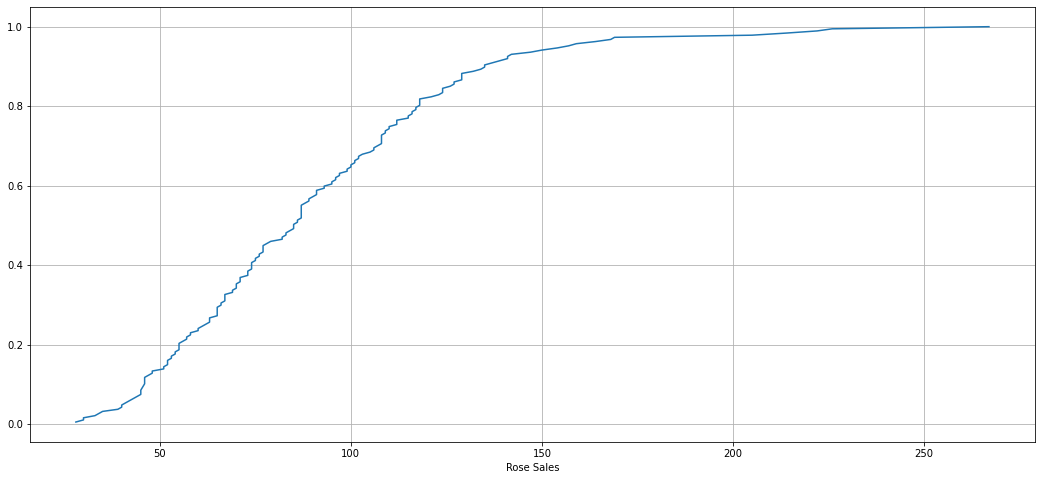

In [26]:
# statistics
from statsmodels.distributions.empirical_distribution import ECDF

plt.figure(figsize = (18, 8))
cdf = ECDF(df2['Rose'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.grid()
plt.xlabel('Rose Sales');

 This particular graph tells us what percentage of data points refer to what number of Sales.


### Sum of sales of Sparkling across different year:

Let us try to resample or aggregate the Time Series from an annual perspective and sum up the observations of each month.

In [27]:
df_yearly_sum = df1.resample('A').sum()
df_yearly_sum.head()

Sparkling
YearMonth            
1980-12-31      28406
1981-12-31      26227
1982-12-31      25321
1983-12-31      26180
1984-12-31      28431

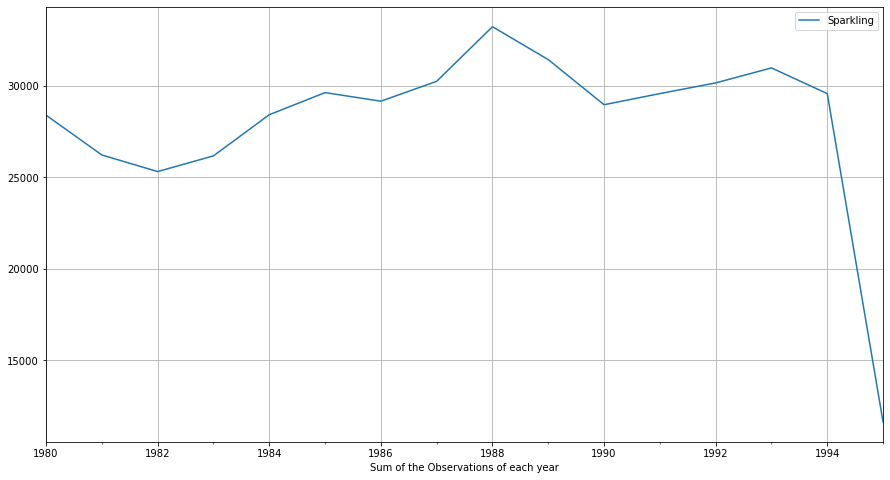

In [28]:
df_yearly_sum.plot();
plt.grid()
plt.xlabel('Sum of the Observations of each year');

#### Observations:
- Resample or aggregate the Time Series from an annual perspective and sum up the observations.
- We can see that, the sale of Sparkling wine decreases from 1980-1982 and then increases till 1988. There is steep decrease in sale from 1994.

### Sum of sales of Rose across different year:

In [29]:
df_yearly_sum_r = df2.resample('A').sum()
df_yearly_sum_r.head()

Rose
YearMonth         
1980-12-31  1758.0
1981-12-31  1780.0
1982-12-31  1348.0
1983-12-31  1324.0
1984-12-31  1280.0

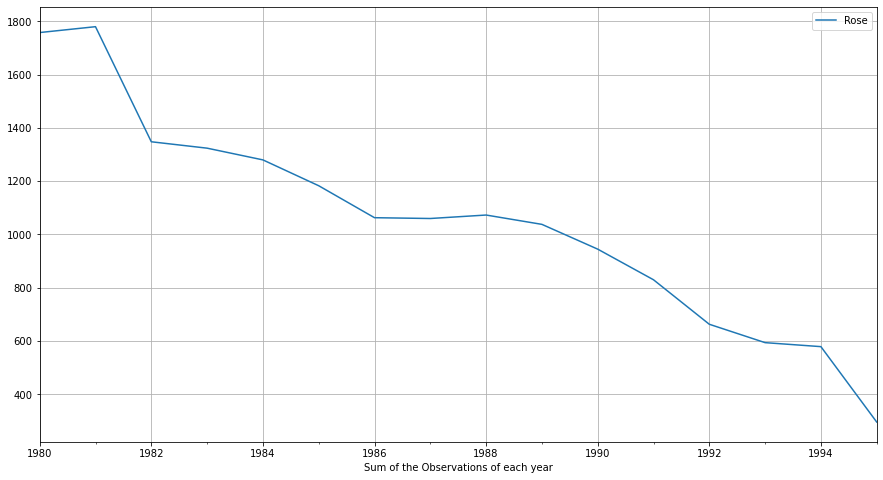

In [30]:
df_yearly_sum_r.plot();
plt.grid()
plt.xlabel('Sum of the Observations of each year');

- Resample or aggregate the Time Series from an annual perspective and sum up the observations.
- We can see that, the sale of Rose wine has steep decreases from 1980-1982 and then there is gradual decreasing trend.


### Plot the average Sales per month and the month on month percentage change of Sales of Sparkling wine.

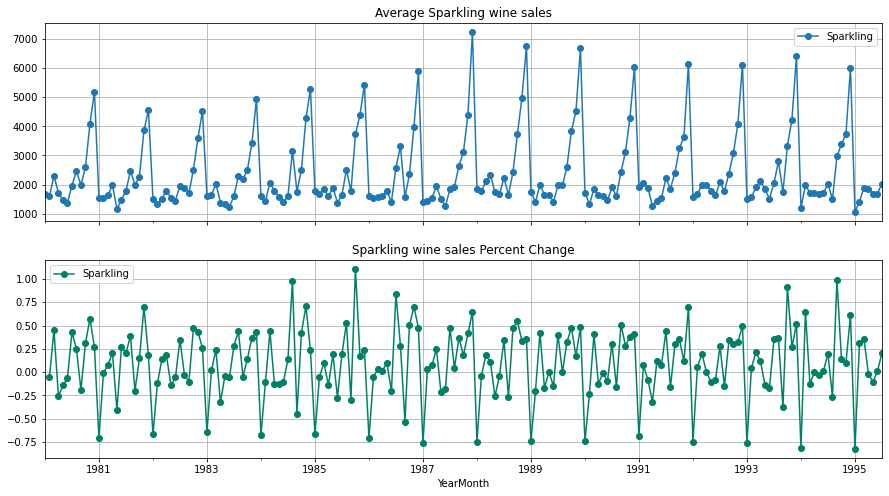

In [31]:
# group by date and get average Sparkling wine Sales, and precent change
average    = df1.groupby(df1.index)["Sparkling"].mean()
pct_change = df1.groupby(df1.index)["Sparkling"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average Sparkling wine Sales over time(year-month)
ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average Sparkling wine sales",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())
# plot precent change for Sparkling wine Sales over time(year-month)
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="Sparkling wine sales Percent Change",grid=True)

#### Observations:
- The above two graphs tell us the Average Sales and the Percentage change of Sales with respect to the time for Sparkling wine.
- The Average Sales value does not show any trend.

### Plot the average Sales per month and the month on month percentage change of Sales of Rose wine.

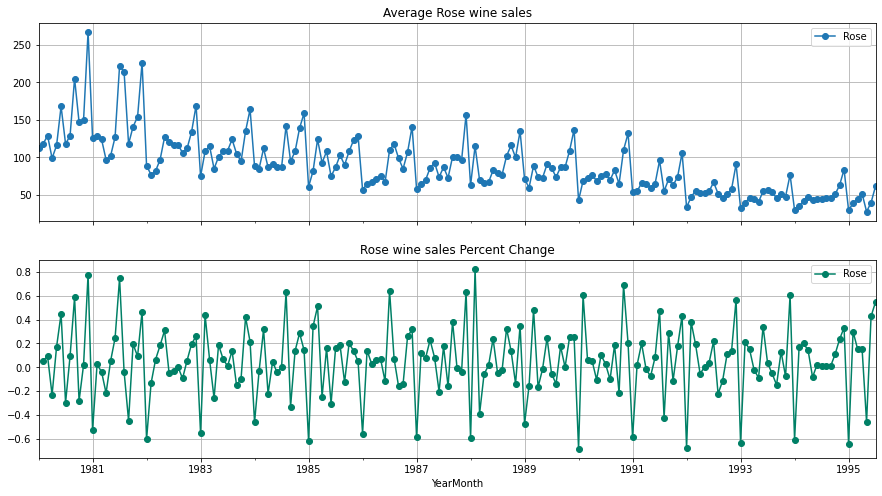

In [32]:
# group by date and get average Sparkling wine Sales, and precent change
average    = df2.groupby(df2.index)["Rose"].mean()
pct_change = df2.groupby(df2.index)["Rose"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average Sparkling wine Sales over time(year-month)
ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average Rose wine sales",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())
# plot precent change for Sparkling wine Sales over time(year-month)
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="Rose wine sales Percent Change",grid=True)

### Observations:
- The above two graphs tell us the Average Sales and the Percentage change of Sales with respect to the time for Rose wine.
- The Average Sales value shows decreasing trend.

### Decompose the Time Series and plot the different components.

In [33]:
from    statsmodels.tsa.seasonal import   seasonal_decompose

### Additive Decomposition for Sparkling

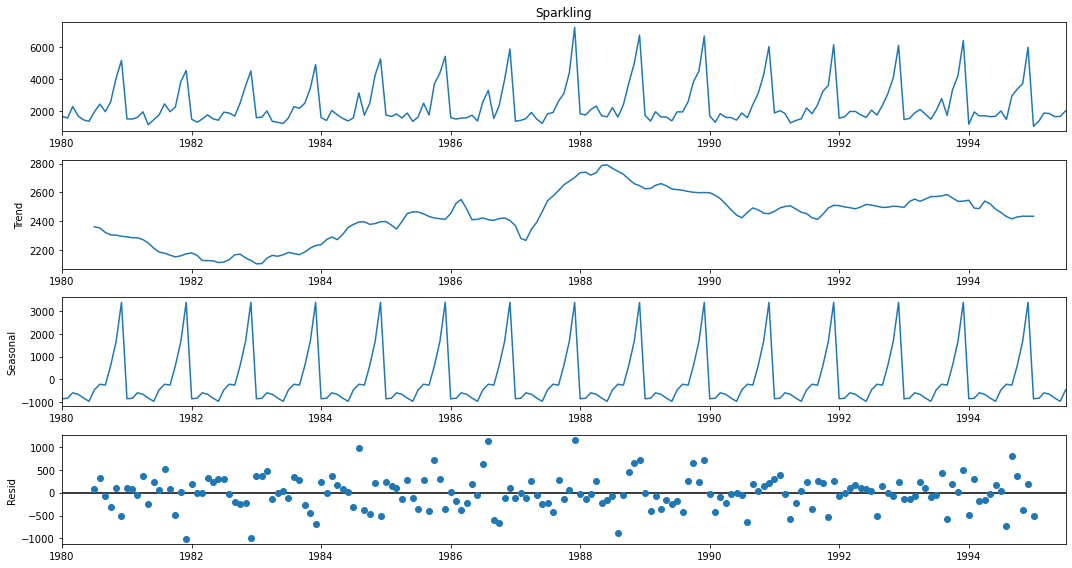

In [34]:
decomposition_add = seasonal_decompose(df1['Sparkling'],model='additive')
decomposition_add.plot();

#### Observations:
- We see that the residuals are located around 0 from the plot of the residuals in the decomposition.
- The residuals are ranging from -1000 to +1000. we can see some pattern in the residual so futher decomposing to multiplicative model to minimize the residuals.
- There is seasonality and we don't observe pronounced trend.

In [35]:
trend = decomposition_add.trend
seasonality = decomposition_add.seasonal
residual = decomposition_add.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-01            NaN
1980-02-01            NaN
1980-03-01            NaN
1980-04-01            NaN
1980-05-01            NaN
1980-06-01            NaN
1980-07-01    2360.666667
1980-08-01    2351.333333
1980-09-01    2320.541667
1980-10-01    2303.583333
1980-11-01    2302.041667
1980-12-01    2293.791667
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    -854.260599
1980-02-01    -830.350678
1980-03-01    -592.356630
1980-04-01    -658.490559
1980-05-01    -824.416154
1980-06-01    -967.434011
1980-07-01    -465.502265
1980-08-01    -214.332821
1980-09-01    -254.677265
1980-10-01     599.769957
1980-11-01    1675.067179
1980-12-01    3386.983846
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01     70.835599
1980-08-01    315.999487
1980-09-01    -81.864401
1980-10-01   -307.353290


### Multiplicative Decomposition for Sprakling

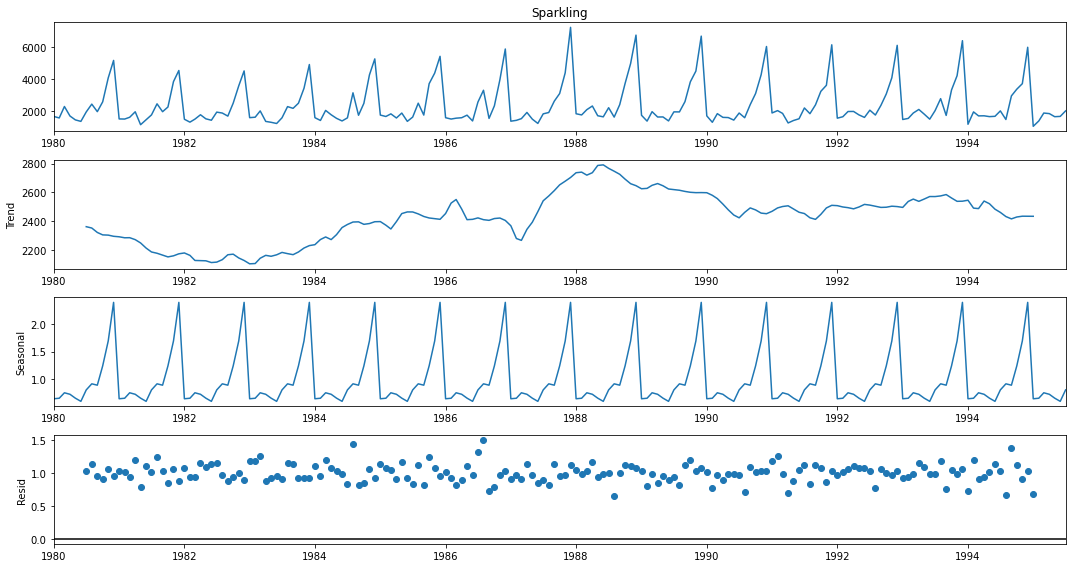

In [36]:
decomposition_mul = seasonal_decompose(df1['Sparkling'],model='multiplicative')
decomposition_mul.plot();

#### Observations:
- For the multiplicative series, we see that a lot of residuals are located around 1. The residuals are minimized and multiplocative model is best fit for decomposition.
- There is seasonality and we don't observe pronounced trend.

In [37]:
trend = decomposition_mul.trend
seasonality = decomposition_mul.seasonal
residual = decomposition_mul.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-01            NaN
1980-02-01            NaN
1980-03-01            NaN
1980-04-01            NaN
1980-05-01            NaN
1980-06-01            NaN
1980-07-01    2360.666667
1980-08-01    2351.333333
1980-09-01    2320.541667
1980-10-01    2303.583333
1980-11-01    2302.041667
1980-12-01    2293.791667
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    0.649843
1980-02-01    0.659214
1980-03-01    0.757440
1980-04-01    0.730351
1980-05-01    0.660609
1980-06-01    0.603468
1980-07-01    0.809164
1980-08-01    0.918822
1980-09-01    0.894367
1980-10-01    1.241789
1980-11-01    1.690158
1980-12-01    2.384776
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01         NaN
1980-02-01         NaN
1980-03-01         NaN
1980-04-01         NaN
1980-05-01         NaN
1980-06-01         NaN
1980-07-01    1.029230
1980-08-01    1.135407
1980-09-01    0.955954
1980-10-01    0.907513
1980-11-01    1.050423
1980-12-01    0.946770
Name: resi

### Additive Decomposition for Rose

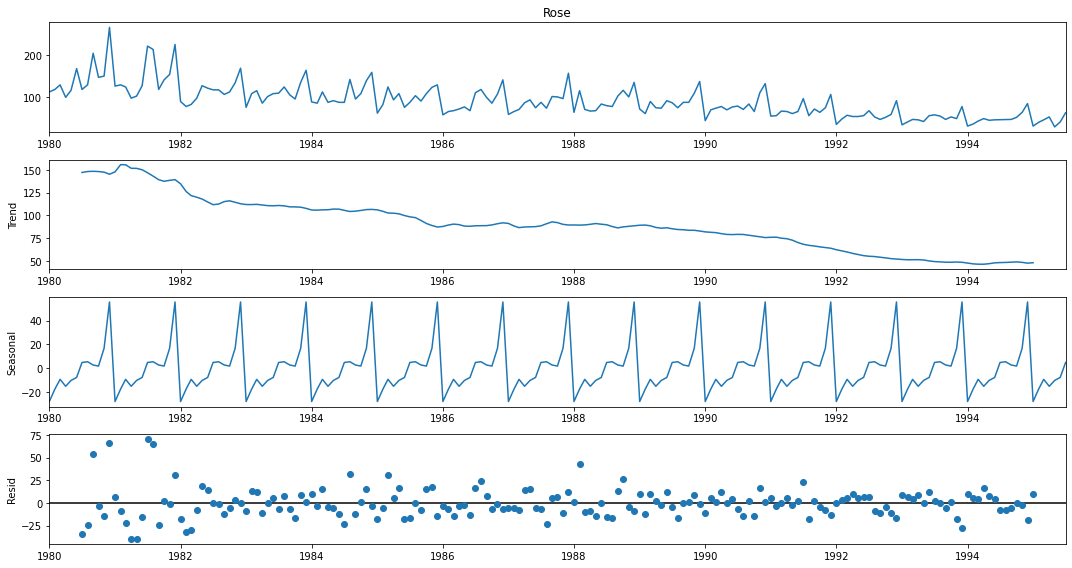

In [38]:
decomposition_add_r = seasonal_decompose(df2['Rose'],model='additive')
decomposition_add_r.plot();

#### Observations:
- We see that the residuals are located around 0 from the plot of the residuals in the decomposition.
- The residuals are ranging from -25 to +75. we can see some pattern in the residual so futher decomposing to multiplicative model to minimize the residuals.
- There is seasonality and we observe decreasing trend.

In [39]:
trend = decomposition_add_r.trend
seasonality = decomposition_add_r.seasonal
residual = decomposition_add_r.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01    147.083333
1980-08-01    148.125000
1980-09-01    148.375000
1980-10-01    148.083333
1980-11-01    147.416667
1980-12-01    145.125000
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01   -27.908647
1980-02-01   -17.435632
1980-03-01    -9.285830
1980-04-01   -15.098330
1980-05-01   -10.196544
1980-06-01    -7.678687
1980-07-01     4.896908
1980-08-01     5.499686
1980-09-01     2.774686
1980-10-01     1.871908
1980-11-01    16.846908
1980-12-01    55.713575
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01          NaN
1980-02-01          NaN
1980-03-01          NaN
1980-04-01          NaN
1980-05-01          NaN
1980-06-01          NaN
1980-07-01   -33.980241
1980-08-01   -24.624686
1980-09-01    53.850314
1980-10-01    -2.955241
1980-11-01   -14.263575
1980-12-01    66.16142

### Multiplicative Decomposition for Rose

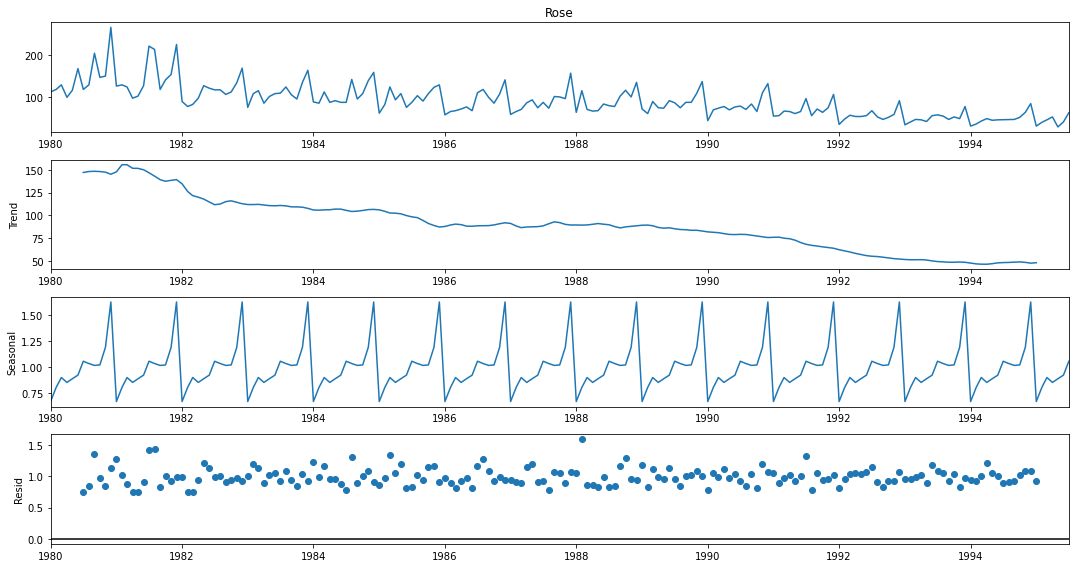

In [40]:
decomposition_mul_r = seasonal_decompose(df2['Rose'],model='multiplicative')
decomposition_mul_r.plot();

#### Observations:
- For the multiplicative series, we see that a lot of residuals are located around 1. The residuals are minimized and multiplocative model is best fit for decomposition.
- There is seasonality and we observe decreasing trend.

In [41]:
trend = decomposition_mul_r.trend
seasonality = decomposition_mul_r.seasonal
residual = decomposition_mul_r.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01    147.083333
1980-08-01    148.125000
1980-09-01    148.375000
1980-10-01    148.083333
1980-11-01    147.416667
1980-12-01    145.125000
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    0.670111
1980-02-01    0.806163
1980-03-01    0.901164
1980-04-01    0.854024
1980-05-01    0.889415
1980-06-01    0.923985
1980-07-01    1.058038
1980-08-01    1.035881
1980-09-01    1.017648
1980-10-01    1.022573
1980-11-01    1.192349
1980-12-01    1.628646
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01         NaN
1980-02-01         NaN
1980-03-01         NaN
1980-04-01         NaN
1980-05-01         NaN
1980-06-01         NaN
1980-07-01    0.758258
1980-08-01    0.840720
1980-09-01    1.357674
1980-10-01    0.970771
1980-11-01    0.853378
1980-12-01    1.129646
Name: resid, dtype: fl

## 3. Split the data into training and test. The test data should start in 1991.

Splitting the time series data into train and test. Training Data is till the end of 1990. Test Data is from the beginning of 1991 to the last time stamp provided.

### Splitting Sparkiling dataset

In [42]:
train_s=df1[df1.index.year < 1991]
test_s=df1[df1.index.year >= 1991]

In [43]:
print(train_s.shape)
print(test_s.shape)

(132, 1)
(55, 1)


In [44]:
## This is to display multiple data frames from one cell
from IPython.display import display

In [45]:
print('First few rows of Training Data')
display(train_s.head())
print('Last few rows of Training Data')
display(train_s.tail())
print('First few rows of Test Data')
display(test_s.head())
print('Last few rows of Test Data')
display(test_s.tail())

First few rows of Training Data


Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471

Last few rows of Training Data


Sparkling
YearMonth            
1990-08-01       1605
1990-09-01       2424
1990-10-01       3116
1990-11-01       4286
1990-12-01       6047

First few rows of Test Data


Sparkling
YearMonth            
1991-01-01       1902
1991-02-01       2049
1991-03-01       1874
1991-04-01       1279
1991-05-01       1432

Last few rows of Test Data


Sparkling
YearMonth            
1995-03-01       1897
1995-04-01       1862
1995-05-01       1670
1995-06-01       1688
1995-07-01       2031

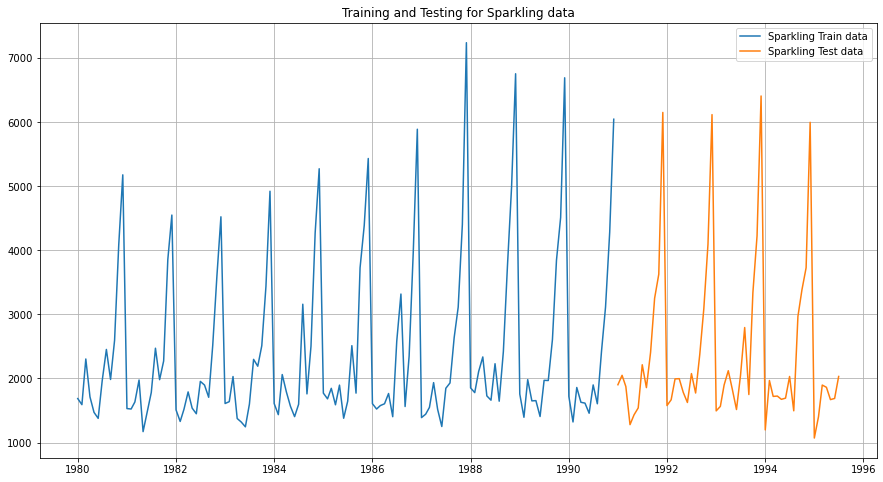

In [46]:
## Plotting the Training data, Test data for Sparkling data

plt.plot(train_s, label='Sparkling Train data')
plt.plot(test_s, label='Sparkling Test data')
plt.legend(loc='best')
plt.grid()
plt.title('Training and Testing for Sparkling data');

### Splitting Rose dataset

In [47]:
train_r =df2[df2.index.year < 1991]
test_r =df2[df2.index.year >= 1991]

In [48]:
print(train_r.shape)
print(test_r.shape)

(132, 1)
(55, 1)


In [49]:
print('First few rows of Training Data')
display(train_r.head())
print('Last few rows of Training Data')
display(train_r.tail())
print('First few rows of Test Data')
display(test_r.head())
print('Last few rows of Test Data')
display(test_r.tail())

First few rows of Training Data


Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0

Last few rows of Training Data


Rose
YearMonth        
1990-08-01   70.0
1990-09-01   83.0
1990-10-01   65.0
1990-11-01  110.0
1990-12-01  132.0

First few rows of Test Data


Rose
YearMonth       
1991-01-01  54.0
1991-02-01  55.0
1991-03-01  66.0
1991-04-01  65.0
1991-05-01  60.0

Last few rows of Test Data


Rose
YearMonth       
1995-03-01  45.0
1995-04-01  52.0
1995-05-01  28.0
1995-06-01  40.0
1995-07-01  62.0

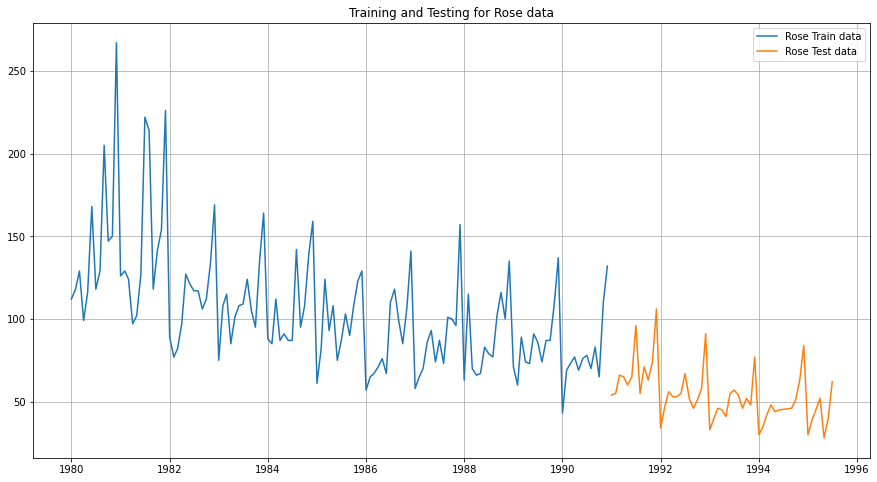

In [50]:
## Plotting the Training data, Test data for Rose data

plt.plot(train_r, label='Rose Train data')
plt.plot(test_r, label='Rose Test data')
plt.legend(loc='best')
plt.grid()
plt.title('Training and Testing for Rose data');

## 4. Build all the exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other additional models such as regression, naïve forecast models, simple average models, moving average models should also be built on the training data and check the performance on the test data using RMSE.

## Model- 1 Linear Regression
**For this particular linear regression, we are going to regress the 'Sales' variable against the order of the occurrence. For this we need to modify our training data before fitting it into a linear regression.**

In the simplest case, the regression model allows for a linear relationship between the forecast variable y and a single predictor variable x.
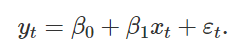
 

In [51]:
train_time_sparkling = [i+1 for i in range(len(train_s))]
test_time_sparkling = [i+133 for i in range(len(test_s))]
print('Training Time instance for Sparkling','\n',train_time_sparkling)
print('Test Time instance for Sparkling','\n',test_time_sparkling)

Training Time instance for Sparkling 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance for Sparkling 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [52]:
LinearRegression_train_sparkling = train_s.copy()
LinearRegression_test_sparkling = test_s.copy()

In [53]:
LinearRegression_train_sparkling['time'] = train_time_sparkling
LinearRegression_test_sparkling['time'] = test_time_sparkling

print('First few rows of Training Data for Sparkling','\n',LinearRegression_train_sparkling.head(),'\n')
print('Last few rows of Training Data for Sparkling','\n',LinearRegression_train_sparkling.tail(),'\n')
print('First few rows of Test Data for Sparkling','\n',LinearRegression_test_sparkling.head(),'\n')
print('Last few rows of Test Data for Sparkling','\n',LinearRegression_test_sparkling.tail(),'\n')

First few rows of Training Data for Sparkling 
             Sparkling  time
YearMonth                  
1980-01-01       1686     1
1980-02-01       1591     2
1980-03-01       2304     3
1980-04-01       1712     4
1980-05-01       1471     5 

Last few rows of Training Data for Sparkling 
             Sparkling  time
YearMonth                  
1990-08-01       1605   128
1990-09-01       2424   129
1990-10-01       3116   130
1990-11-01       4286   131
1990-12-01       6047   132 

First few rows of Test Data for Sparkling 
             Sparkling  time
YearMonth                  
1991-01-01       1902   133
1991-02-01       2049   134
1991-03-01       1874   135
1991-04-01       1279   136
1991-05-01       1432   137 

Last few rows of Test Data for Sparkling 
             Sparkling  time
YearMonth                  
1995-03-01       1897   183
1995-04-01       1862   184
1995-05-01       1670   185
1995-06-01       1688   186
1995-07-01       2031   187 



Now that our training and test data has been modified, let us go ahead use  𝐿𝑖𝑛𝑒𝑎𝑟𝑅𝑒𝑔𝑟𝑒𝑠𝑠𝑖𝑜𝑛 to build the model on the training data and test the model on the test data.

In [54]:
from sklearn.linear_model import LinearRegression

In [55]:
lr_sparkling = LinearRegression()

In [56]:
lr_sparkling.fit(LinearRegression_train_sparkling[['time']],LinearRegression_train_sparkling['Sparkling'].values)

LinearRegression()

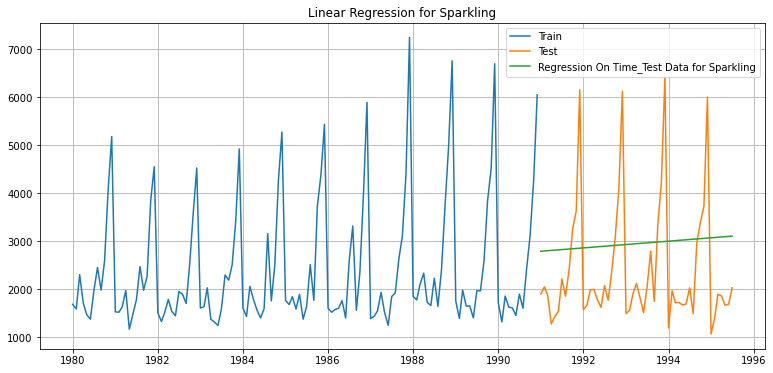

In [57]:
test_predictions_lr_sparkling  = lr_sparkling.predict(LinearRegression_test_sparkling[['time']])
LinearRegression_test_sparkling['RegOnTime'] = test_predictions_lr_sparkling

plt.figure(figsize=(13,6))
plt.plot(train_s['Sparkling'], label='Train')
plt.plot(test_s['Sparkling'], label='Test')
plt.plot(LinearRegression_test_sparkling['RegOnTime'], label='Regression On Time_Test Data for Sparkling')
plt.legend(loc='best')
plt.grid();
plt.title('Linear Regression for Sparkling');

In [58]:
## Test Data - RMSE
from sklearn import metrics
rmse_lr_test_sparkling = metrics.mean_squared_error(test_s['Sparkling'],test_predictions_lr_sparkling,squared=False)
print("For RegressionOnTime forecast on the Test Data for Sparkling,  RMSE is %3.3f" %(rmse_lr_test_sparkling))

For RegressionOnTime forecast on the Test Data for Sparkling,  RMSE is 1389.135


In [59]:
resultsDf = pd.DataFrame({'Test RMSE-Sparkling': [metrics.mean_squared_error(test_s['Sparkling'],test_predictions_lr_sparkling,squared=False)]}
                           ,index=['Linear Regression'])
resultsDf

Test RMSE-Sparkling
Linear Regression          1389.135175

### Linear Regression for Rose

In [60]:
train_time_rose = [i+1 for i in range(len(train_r))]
test_time_rose = [i+133 for i in range(len(test_r))]
print('Training Time instance for Rose','\n',train_time_rose)
print('Test Time instance for Rose','\n',test_time_rose)

Training Time instance for Rose 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance for Rose 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [61]:
LinearRegression_train_rose = train_r.copy()
LinearRegression_test_rose = test_r.copy()

In [62]:
LinearRegression_train_rose['time'] = train_time_rose
LinearRegression_test_rose['time'] = test_time_rose

print('First few rows of Training Data for Rose','\n',LinearRegression_train_rose.head(),'\n')
print('Last few rows of Training Data for Rose','\n',LinearRegression_train_rose.tail(),'\n')
print('First few rows of Test Data for Rose','\n',LinearRegression_test_rose.head(),'\n')
print('Last few rows of Test Data for Rose','\n',LinearRegression_test_rose.tail(),'\n')

First few rows of Training Data for Rose 
              Rose  time
YearMonth              
1980-01-01  112.0     1
1980-02-01  118.0     2
1980-03-01  129.0     3
1980-04-01   99.0     4
1980-05-01  116.0     5 

Last few rows of Training Data for Rose 
              Rose  time
YearMonth              
1990-08-01   70.0   128
1990-09-01   83.0   129
1990-10-01   65.0   130
1990-11-01  110.0   131
1990-12-01  132.0   132 

First few rows of Test Data for Rose 
             Rose  time
YearMonth             
1991-01-01  54.0   133
1991-02-01  55.0   134
1991-03-01  66.0   135
1991-04-01  65.0   136
1991-05-01  60.0   137 

Last few rows of Test Data for Rose 
             Rose  time
YearMonth             
1995-03-01  45.0   183
1995-04-01  52.0   184
1995-05-01  28.0   185
1995-06-01  40.0   186
1995-07-01  62.0   187 



In [63]:
from sklearn.linear_model import LinearRegression

In [64]:
lr_rose = LinearRegression()

In [65]:
lr_rose.fit(LinearRegression_train_rose[['time']],LinearRegression_train_rose['Rose'].values)

LinearRegression()

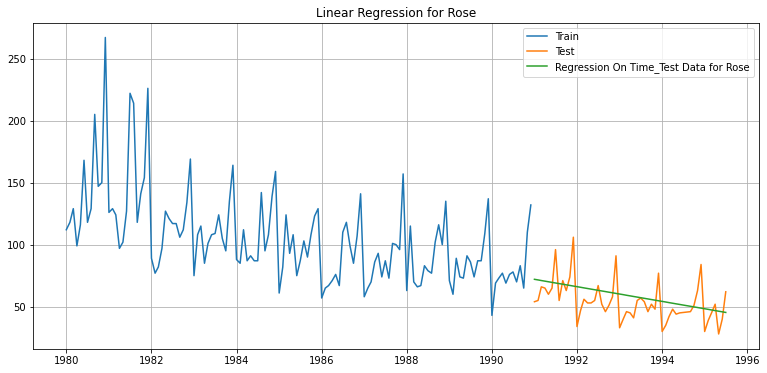

In [66]:
test_predictions_lr_rose = lr_rose.predict(LinearRegression_test_rose[['time']])
LinearRegression_test_rose['RegOnTime'] = test_predictions_lr_rose

plt.figure(figsize=(13,6))
plt.plot(train_r['Rose'], label='Train')
plt.plot(test_r['Rose'], label='Test')
plt.plot(LinearRegression_test_rose['RegOnTime'], label='Regression On Time_Test Data for Rose')
plt.legend(loc='best')
plt.grid();
plt.title('Linear Regression for Rose');

In [67]:
from sklearn import metrics
## Test Data - RMSE

rmse_lr_test_rose = metrics.mean_squared_error(test_r['Rose'],test_predictions_lr_rose,squared=False)
print("For RegressionOnTime forecast on the Test Data for Rose,  RMSE is %3.3f" %(rmse_lr_test_rose))

For RegressionOnTime forecast on the Test Data for Rose,  RMSE is 15.269


In [68]:
resultsDf_r = pd.DataFrame({'Test RMSE-Rose': [metrics.mean_squared_error(test_r['Rose'],test_predictions_lr_rose,squared=False)]}
                           ,index=['Linear Regression'])
resultsDf_r

Test RMSE-Rose
Linear Regression       15.268955

## Model 2: Naive Approach: $\hat{y}_{t+1} = y_t$

### Naive Approach for Sparkling

In [69]:
NaiveModel_train_sparkling = train_s.copy()
NaiveModel_test_sparkling = test_s.copy()

In [70]:
NaiveModel_test_sparkling['naive'] = np.asarray(train_s['Sparkling'])[len(np.asarray(train_s['Sparkling']))-1]
NaiveModel_test_sparkling['naive'].head()

YearMonth
1991-01-01    6047
1991-02-01    6047
1991-03-01    6047
1991-04-01    6047
1991-05-01    6047
Name: naive, dtype: int64

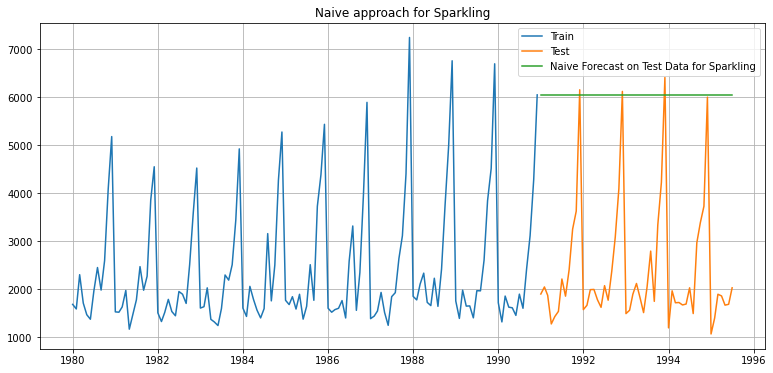

In [71]:
plt.figure(figsize=(13,6))
plt.plot(NaiveModel_train_sparkling['Sparkling'], label='Train')
plt.plot(test_s['Sparkling'], label='Test')
plt.plot(NaiveModel_test_sparkling['naive'], label='Naive Forecast on Test Data for Sparkling')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();
plt.title('Naive approach for Sparkling');

In [72]:
## Test Data - RMSE

rmse_naive_test_sparkling = metrics.mean_squared_error(test_s['Sparkling'],NaiveModel_test_sparkling['naive'],squared=False)
print("For RegressionOnTime forecast on the Test Data for Sparkling,  RMSE is %3.3f" %(rmse_naive_test_sparkling))

For RegressionOnTime forecast on the Test Data for Sparkling,  RMSE is 3864.279


In [73]:
resultsDf_temp = pd.DataFrame({'Test RMSE-Sparkling': [metrics.mean_squared_error(test_s['Sparkling'],NaiveModel_test_sparkling['naive'],squared=False)]}
                           ,index=['Naive Approach'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

Test RMSE-Sparkling
Linear Regression          1389.135175
Naive Approach             3864.279352

### Naive Approach for Rose

In [74]:
NaiveModel_train_rose = train_r.copy()
NaiveModel_test_rose = test_r.copy()

In [75]:
NaiveModel_test_rose['naive'] = np.asarray(train_r['Rose'])[len(np.asarray(train_r['Rose']))-1]
NaiveModel_test_rose['naive'].head()

YearMonth
1991-01-01    132.0
1991-02-01    132.0
1991-03-01    132.0
1991-04-01    132.0
1991-05-01    132.0
Name: naive, dtype: float64

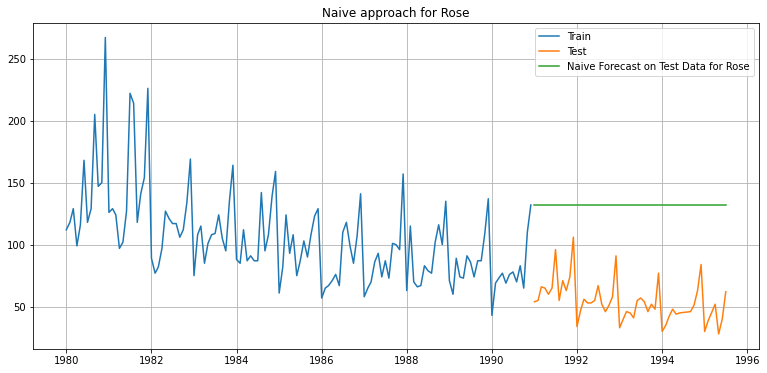

In [76]:
plt.figure(figsize=(13,6))
plt.plot(NaiveModel_train_rose['Rose'], label='Train')
plt.plot(test_r['Rose'], label='Test')
plt.plot(NaiveModel_test_rose['naive'], label='Naive Forecast on Test Data for Rose')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();
plt.title('Naive approach for Rose');

In [77]:
## Test Data - RMSE

rmse_naive_test_rose = metrics.mean_squared_error(test_r['Rose'],NaiveModel_test_rose['naive'],squared=False)
print("For RegressionOnTime forecast on the Test Data for Rose,  RMSE is %3.3f" %(rmse_naive_test_rose))

For RegressionOnTime forecast on the Test Data for Rose,  RMSE is 79.719


In [78]:
temp_resultsDf = pd.DataFrame({'Test RMSE-Rose':[metrics.mean_squared_error(test_r['Rose'],NaiveModel_test_rose['naive'],squared=False)]}
                              ,index=['Naive Approach'])

resultsDf_r = pd.concat([resultsDf_r, temp_resultsDf])
resultsDf_r

Test RMSE-Rose
Linear Regression       15.268955
Naive Approach          79.718773

## Method 3: Simple Average
**For this particular simple average method, we will forecast by using the average of the training values.**

### Simple Average for Sparkling

In [79]:
SimpleAverage_train_sparkling = train_s.copy()
SimpleAverage_test_sparkling = test_s.copy()

In [80]:
SimpleAverage_test_sparkling['mean_forecast'] = SimpleAverage_train_sparkling['Sparkling'].mean()
SimpleAverage_test_sparkling.head()

Sparkling  mean_forecast
YearMonth                           
1991-01-01       1902    2403.780303
1991-02-01       2049    2403.780303
1991-03-01       1874    2403.780303
1991-04-01       1279    2403.780303
1991-05-01       1432    2403.780303

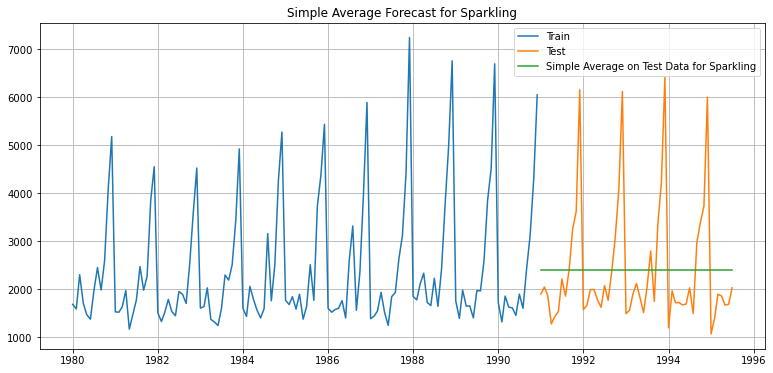

In [81]:
plt.figure(figsize=(13,6))
plt.plot(SimpleAverage_train_sparkling['Sparkling'], label='Train')
plt.plot(SimpleAverage_test_sparkling['Sparkling'], label='Test')
plt.plot(SimpleAverage_test_sparkling['mean_forecast'], label='Simple Average on Test Data for Sparkling')
plt.legend(loc='best')
plt.title("Simple Average Forecast for Sparkling")
plt.grid();

In [82]:
## Test Data - RMSE 

rmse_sa_test_sparkling = metrics.mean_squared_error(SimpleAverage_test_sparkling['Sparkling'],SimpleAverage_test_sparkling['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data for Sparkling,  RMSE is %3.3f" %(rmse_sa_test_sparkling))

For Simple Average forecast on the Test Data for Sparkling,  RMSE is 1275.082


In [83]:
resultsDf_temp = pd.DataFrame({'Test RMSE-Sparkling': [metrics.mean_squared_error(SimpleAverage_test_sparkling['Sparkling'],
                                                                                  SimpleAverage_test_sparkling['mean_forecast'],
                                                                                  squared=False)]}
                                                                                  ,index=['Simple Average'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

Test RMSE-Sparkling
Linear Regression          1389.135175
Naive Approach             3864.279352
Simple Average             1275.081804

### Simple Average for Rose

In [85]:
SimpleAverage_train_rose = train_r.copy()
SimpleAverage_test_rose = test_r.copy()

In [86]:
SimpleAverage_test_rose['mean_forecast'] = SimpleAverage_train_rose['Rose'].mean()
SimpleAverage_test_rose.head()

Rose  mean_forecast
YearMonth                      
1991-01-01  54.0     104.939394
1991-02-01  55.0     104.939394
1991-03-01  66.0     104.939394
1991-04-01  65.0     104.939394
1991-05-01  60.0     104.939394

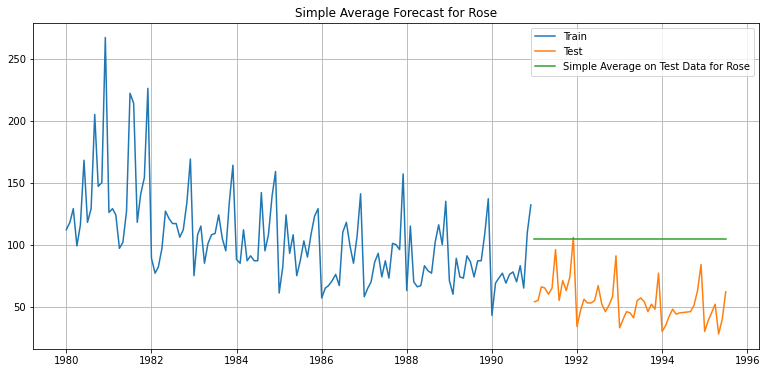

In [87]:
plt.figure(figsize=(13,6))
plt.plot(SimpleAverage_train_rose['Rose'], label='Train')
plt.plot(SimpleAverage_test_rose['Rose'], label='Test')
plt.plot(SimpleAverage_test_rose['mean_forecast'], label='Simple Average on Test Data for Rose')
plt.legend(loc='best')
plt.title("Simple Average Forecast for Rose")
plt.grid();

In [88]:
## Test Data - RMSE 

rmse_sa_test_rose = metrics.mean_squared_error(SimpleAverage_test_rose['Rose'],SimpleAverage_test_rose['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data for Rose,  RMSE is %3.3f" %(rmse_sa_test_rose))

For Simple Average forecast on the Test Data for Rose,  RMSE is 53.461


In [89]:
temp_resultsDf = pd.DataFrame({'Test RMSE-Rose':[metrics.mean_squared_error(SimpleAverage_test_rose['Rose']
                              ,SimpleAverage_test_rose['mean_forecast'],squared=False)]}
                              ,index=['Simple Average'])

resultsDf_r = pd.concat([resultsDf_r, temp_resultsDf])
resultsDf_r

Test RMSE-Rose
Linear Regression       15.268955
Naive Approach          79.718773
Simple Average          53.460570

## Method 4: Moving Average(MA)

#### For the moving average model, we are going to calculate rolling means (or moving averages) for different intervals. The best interval can be determined by the maximum accuracy (or the minimum error) over here.

###### For Moving Average, we are going to average over the entire data.

###  Moving Average for Sparkling

In [90]:
MovingAverage_sparkling = df1.copy()
MovingAverage_sparkling.head()

Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471

In [91]:
MovingAverage_sparkling['Trailing_2'] = MovingAverage_sparkling['Sparkling'].rolling(2).mean()
MovingAverage_sparkling['Trailing_4'] = MovingAverage_sparkling['Sparkling'].rolling(4).mean()
MovingAverage_sparkling['Trailing_6'] = MovingAverage_sparkling['Sparkling'].rolling(6).mean()
MovingAverage_sparkling['Trailing_9'] = MovingAverage_sparkling['Sparkling'].rolling(9).mean()

MovingAverage_sparkling.head()

Sparkling  Trailing_2  Trailing_4  Trailing_6  Trailing_9
YearMonth                                                            
1980-01-01       1686         NaN         NaN         NaN         NaN
1980-02-01       1591      1638.5         NaN         NaN         NaN
1980-03-01       2304      1947.5         NaN         NaN         NaN
1980-04-01       1712      2008.0     1823.25         NaN         NaN
1980-05-01       1471      1591.5     1769.50         NaN         NaN

Text(0.5, 1.0, 'Moving Average for Sparkling')

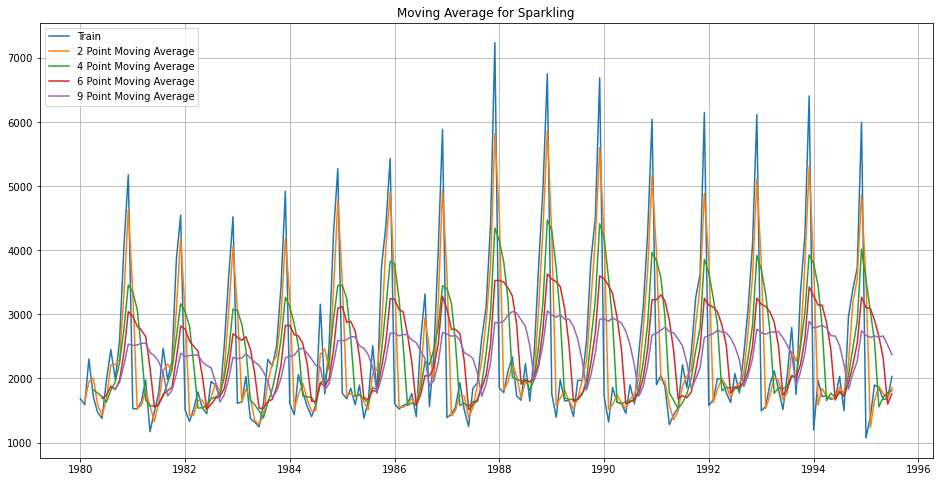

In [92]:
## Plotting on the whole data

plt.figure(figsize=(16,8))
plt.plot(MovingAverage_sparkling['Sparkling'],label='Train')
plt.plot(MovingAverage_sparkling['Trailing_2'],label='2 Point Moving Average')
plt.plot(MovingAverage_sparkling['Trailing_4'],label='4 Point Moving Average')
plt.plot(MovingAverage_sparkling['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage_sparkling['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();
plt.title("Moving Average for Sparkling")

In [93]:
#Creating train and test set 

trailing_MovingAverage_train_sparkling = MovingAverage_sparkling[MovingAverage_sparkling.index.year < 1991] 
trailing_MovingAverage_test_sparkling = MovingAverage_sparkling[MovingAverage_sparkling.index.year >= 1991]

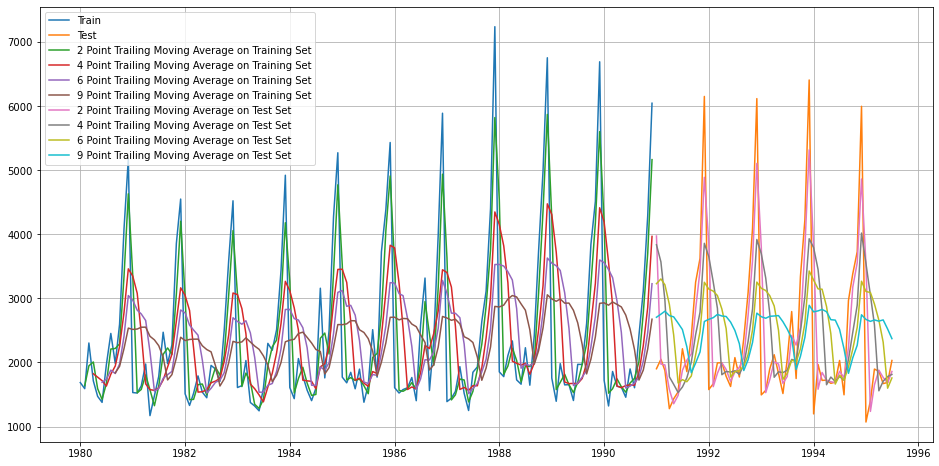

In [94]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train_sparkling['Sparkling'], label='Train')
plt.plot(trailing_MovingAverage_test_sparkling['Sparkling'], label='Test')

plt.plot(trailing_MovingAverage_train_sparkling['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train_sparkling['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train_sparkling['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train_sparkling['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test_sparkling['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test_sparkling['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test_sparkling['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test_sparkling['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

In [95]:
## Test Data - RMSE --> 2 point Trailing MA

rmse_ma_test_2_sparkling = metrics.mean_squared_error(test_s['Sparkling'],trailing_MovingAverage_test_sparkling['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data for Sparkling,  RMSE is %3.3f" %(rmse_ma_test_2_sparkling))

## Test Data - RMSE  --> 4 point Trailing MA

rmse_ma_test_4_sparkling = metrics.mean_squared_error(test_s['Sparkling'],trailing_MovingAverage_test_sparkling['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data for Sparkling,  RMSE is %3.3f" %(rmse_ma_test_4_sparkling))

## Test Data - RMSE --> 6 point Trailing MA

rmse_ma_test_6_sparkling = metrics.mean_squared_error(test_s['Sparkling'],trailing_MovingAverage_test_sparkling['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data for Sparkling,  RMSE is %3.3f" %(rmse_ma_test_6_sparkling))

## Test Data - RMSE  --> 9 point Trailing MA

rmse_ma_test_9_sparkling = metrics.mean_squared_error(test_s['Sparkling'],trailing_MovingAverage_test_sparkling['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data for Sparkling,  RMSE is %3.3f " %(rmse_ma_test_9_sparkling))

For 2 point Moving Average Model forecast on the Training Data for Sparkling,  RMSE is 813.401
For 4 point Moving Average Model forecast on the Training Data for Sparkling,  RMSE is 1156.590
For 6 point Moving Average Model forecast on the Training Data for Sparkling,  RMSE is 1283.927
For 9 point Moving Average Model forecast on the Training Data for Sparkling,  RMSE is 1346.278 


In [96]:
resultsDf_temp = pd.DataFrame({'Test RMSE-Sparkling':  [rmse_ma_test_2_sparkling,rmse_ma_test_4_sparkling
                                          ,rmse_ma_test_6_sparkling,rmse_ma_test_9_sparkling]}
                                          ,index=['2point Trailing Moving Average','4point Trailing Moving Average'
                                          ,'6point Trailing Moving Average','9point Trailing Moving Average'])
resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

Test RMSE-Sparkling
Linear Regression                       1389.135175
Naive Approach                          3864.279352
Simple Average                          1275.081804
2point Trailing Moving Average           813.400684
4point Trailing Moving Average          1156.589694
6point Trailing Moving Average          1283.927428
9point Trailing Moving Average          1346.278315

### Moving Average for Rose

In [97]:
MovingAverage_rose = df2.copy()
MovingAverage_rose.head()  

Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0

In [98]:
MovingAverage_rose['Trailing_2'] = MovingAverage_rose['Rose'].rolling(2).mean()
MovingAverage_rose['Trailing_4'] = MovingAverage_rose['Rose'].rolling(4).mean()
MovingAverage_rose['Trailing_6'] = MovingAverage_rose['Rose'].rolling(6).mean()
MovingAverage_rose['Trailing_9'] = MovingAverage_rose['Rose'].rolling(9).mean()

MovingAverage_rose.head()

Rose  Trailing_2  Trailing_4  Trailing_6  Trailing_9
YearMonth                                                        
1980-01-01  112.0         NaN         NaN         NaN         NaN
1980-02-01  118.0       115.0         NaN         NaN         NaN
1980-03-01  129.0       123.5         NaN         NaN         NaN
1980-04-01   99.0       114.0       114.5         NaN         NaN
1980-05-01  116.0       107.5       115.5         NaN         NaN

Text(0.5, 1.0, 'Moving Average for Rose')

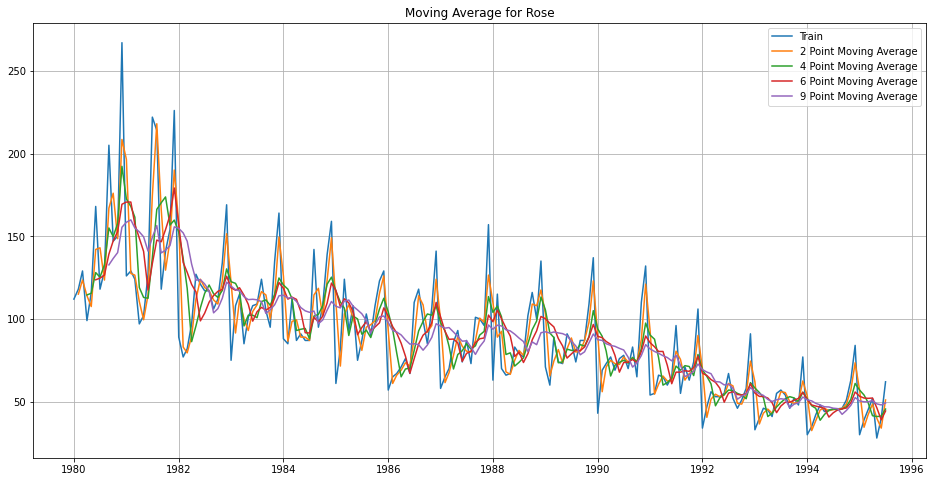

In [99]:
## Plotting on the whole data

plt.figure(figsize=(16,8))
plt.plot(MovingAverage_rose['Rose'], label='Train')
plt.plot(MovingAverage_rose['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage_rose['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage_rose['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage_rose['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();
plt.title("Moving Average for Rose")

In [100]:
#Creating train and test set 
trailing_MovingAverage_train_rose=MovingAverage_rose[MovingAverage_rose.index.year < 1991] 
trailing_MovingAverage_test_rose=MovingAverage_rose[MovingAverage_rose.index.year >= 1991]

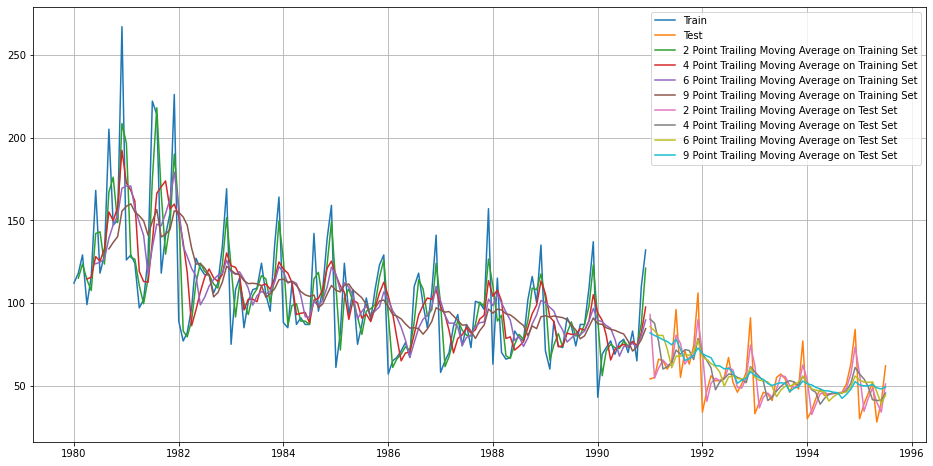

In [101]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train_rose['Rose'], label='Train')
plt.plot(trailing_MovingAverage_test_rose['Rose'], label='Test')

plt.plot(trailing_MovingAverage_train_rose['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train_rose['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train_rose['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train_rose['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test_rose['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test_rose['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test_rose['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test_rose['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

In [102]:
## Test Data - RMSE --> 2 point Trailing MA

rmse_ma_test_2_rose = metrics.mean_squared_error(test_r['Rose'],trailing_MovingAverage_test_rose['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data for Rose,  RMSE is %3.3f" %(rmse_ma_test_2_rose))

## Test Data - RMSE  --> 4 point Trailing MA

rmse_ma_test_4_rose = metrics.mean_squared_error(test_r['Rose'],trailing_MovingAverage_test_rose['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data for Rose,  RMSE is %3.3f" %(rmse_ma_test_4_rose))

## Test Data - RMSE --> 6 point Trailing MA

rmse_ma_test_6_rose = metrics.mean_squared_error(test_r['Rose'],trailing_MovingAverage_test_rose['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data for Rose,  RMSE is %3.3f" %(rmse_ma_test_6_rose))

## Test Data - RMSE  --> 9 point Trailing MA

rmse_ma_test_9_rose = metrics.mean_squared_error(test_r['Rose'],trailing_MovingAverage_test_rose['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data for Rose,  RMSE is %3.3f " %(rmse_ma_test_9_rose))

For 2 point Moving Average Model forecast on the Training Data for Rose,  RMSE is 11.529
For 4 point Moving Average Model forecast on the Training Data for Rose,  RMSE is 14.451
For 6 point Moving Average Model forecast on the Training Data for Rose,  RMSE is 14.566
For 9 point Moving Average Model forecast on the Training Data for Rose,  RMSE is 14.728 


In [103]:
temp_resultsDf = pd.DataFrame({'Test RMSE-Rose': [rmse_ma_test_2_rose,rmse_ma_test_4_rose
                                          ,rmse_ma_test_6_rose,rmse_ma_test_9_rose]}
                                          ,index=['2point Trailing Moving Average','4point Trailing Moving Average'
                                          ,'6point Trailing Moving Average','9point Trailing Moving Average'])

resultsDf_r = pd.concat([resultsDf_r, temp_resultsDf])
resultsDf_r

Test RMSE-Rose
Linear Regression                    15.268955
Naive Approach                       79.718773
Simple Average                       53.460570
2point Trailing Moving Average       11.529278
4point Trailing Moving Average       14.451403
6point Trailing Moving Average       14.566327
9point Trailing Moving Average       14.727630

## Exponential smoothing model
- Exponential smoothing methods consist of flattening time series data.
- Exponential smoothing averages or exponentially weighted moving averages consist of forecast based on previous periods data with exponentially declining influence on the older observations.
- Exponential smoothing methods consist of special case exponential moving with notation ETS (Error, Trend, Seasonality) where each can be none(N), additive (N), additive damped (Ad), Multiplicative (M) or multiplicative damped (Md).
- One or more parameters control how fast the weights decay.
- These parameters have values between 0 and 1

In [104]:
import statsmodels.tools.eval_measures as      em
from   sklearn.metrics                 import  mean_squared_error
from   statsmodels.tsa.api             import ExponentialSmoothing, SimpleExpSmoothing, Holt
from   IPython.display                 import display
from   pylab                           import rcParams

## Model 5 - Simple Exponential Smoothing (SES) -  ETS(A, N, N) 

###### The simplest of the exponentially smoothing methods is naturally called simple exponential smoothing (SES). 
###### This method is suitable for forecasting data with no clear trend or seasonal pattern.
In Single ES, the forecast at time (t + 1) is given by Winters,1960

* $F_{t+1} = \alpha Y_t + (1-\alpha) F_t$

Parameter $\alpha$ is called the smoothing constant and its value lies between 0 and 1.
Since the model uses only one smoothing constant, it is called Single Exponential Smoothing.

###### Note: Here, there is both trend and seasonality in the data. So, we should have directly gone for the Triple Exponential Smoothing but Simple Exponential Smoothing and the Double Exponential Smoothing models are built over here to get an idea of how the three types of models compare in this case.

SimpleExpSmoothing class must be instantiated and passed the training data.

The fit() function is then called providing the fit configuration, the alpha value, smoothing_level. If this is omitted or set to None, the model will automatically optimize the value.

### Simple Exponential Smoothing for Sparkling

In [105]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [106]:
SES_train = train_s.copy()
SES_test = test_s.copy()

In [107]:
model_SES = SimpleExpSmoothing(SES_train['Sparkling'])

F:\DS\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [108]:
model_SES_autofit = model_SES.fit(optimized=True)

F:\DS\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [109]:
model_SES_autofit.params

{'smoothing_level': 0.049607360581862936,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1818.535750008871,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [110]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(SES_test))
SES_test.head()

Sparkling      predict
YearMonth                         
1991-01-01       1902  2724.932624
1991-02-01       2049  2724.932624
1991-03-01       1874  2724.932624
1991-04-01       1279  2724.932624
1991-05-01       1432  2724.932624

In [111]:
# Using the fitted model on the training set to forecast on the test set
SES_predict = model_SES_autofit.forecast(steps=len(SES_test))
SES_predict

1991-01-01    2724.932624
1991-02-01    2724.932624
1991-03-01    2724.932624
1991-04-01    2724.932624
1991-05-01    2724.932624
1991-06-01    2724.932624
1991-07-01    2724.932624
1991-08-01    2724.932624
1991-09-01    2724.932624
1991-10-01    2724.932624
1991-11-01    2724.932624
1991-12-01    2724.932624
1992-01-01    2724.932624
1992-02-01    2724.932624
1992-03-01    2724.932624
1992-04-01    2724.932624
1992-05-01    2724.932624
1992-06-01    2724.932624
1992-07-01    2724.932624
1992-08-01    2724.932624
1992-09-01    2724.932624
1992-10-01    2724.932624
1992-11-01    2724.932624
1992-12-01    2724.932624
1993-01-01    2724.932624
1993-02-01    2724.932624
1993-03-01    2724.932624
1993-04-01    2724.932624
1993-05-01    2724.932624
1993-06-01    2724.932624
1993-07-01    2724.932624
1993-08-01    2724.932624
1993-09-01    2724.932624
1993-10-01    2724.932624
1993-11-01    2724.932624
1993-12-01    2724.932624
1994-01-01    2724.932624
1994-02-01    2724.932624
1994-03-01  

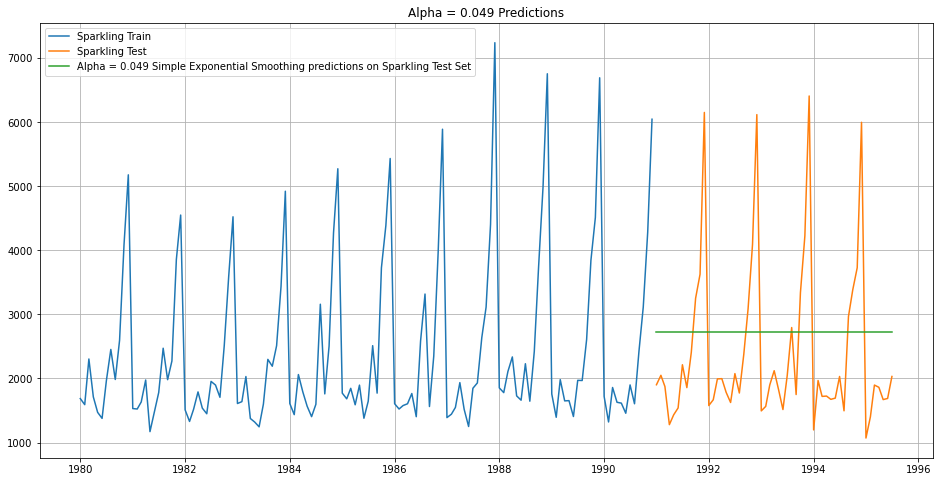

In [112]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(SES_train['Sparkling'], label='Sparkling Train')
plt.plot(SES_test['Sparkling'], label='Sparkling Test')

plt.plot(SES_test['predict'], label='Alpha = 0.049 Simple Exponential Smoothing predictions on Sparkling Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha = 0.049 Predictions');

In [113]:
## Mean Absolute Percentage Error (MAPE) - Function Definition

def MAPE(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

In [114]:
## Test Data - RMSE
from sklearn import metrics

rmse_SES_test_S = metrics.mean_squared_error(SES_test['Sparkling'],SES_predict,squared=False)
print("For SES forecast on the Sparkling Test Data,  RMSE is %3.3f" %(rmse_SES_test_S))

For SES forecast on the Sparkling Test Data,  RMSE is 1316.035


In [115]:
resultsDf_temp = pd.DataFrame({'Test RMSE-Sparkling':   [metrics.mean_squared_error(SES_test['Sparkling'],
                                                                                    SES_predict,squared=False)]},
                         index=['Alpha=0.049:Simple Exponential Smoothing'])
resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

Test RMSE-Sparkling
Linear Regression                                 1389.135175
Naive Approach                                    3864.279352
Simple Average                                    1275.081804
2point Trailing Moving Average                     813.400684
4point Trailing Moving Average                    1156.589694
6point Trailing Moving Average                    1283.927428
9point Trailing Moving Average                    1346.278315
Alpha=0.049:Simple Exponential Smoothing          1316.035487

### Tuning Simple Exponential Smoothing for Sparkling

#### Setting different alpha values.
Remember, the higher the alpha value more weightage is given to the more recent observation. That means, what happened recently will happen again.
**We will run a loop with different alpha values to understand which particular value works best for alpha on the test set.**

In [117]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_S = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_S

Empty DataFrame
Columns: [Alpha Values, Train RMSE, Test RMSE]
Index: []

In [118]:
for i in np.arange(0.01,1,0.01):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues 
    SES_test['predict',i] = model_SES_alpha_i.forecast(len(SES_test))
    
    rmse_model_train_i = metrics.mean_squared_error(SES_train['Sparkling'],SES_train['predict',i],squared=False)
    
    rmse_model_test_i = metrics.mean_squared_error(SES_test['Sparkling'],SES_test['predict',i],squared=False)
    
    resultsDf_S = resultsDf_S.append({'Alpha Values':i,'Train RMSE':rmse_model_train_i 
                                      ,'Test RMSE':rmse_model_test_i}, ignore_index=True)

#### Model Evaluation

In [120]:
resultsDf_S.sort_values(by=['Test RMSE'],ascending=True).head()

Alpha Values   Train RMSE    Test RMSE
1          0.02  1328.406554  1279.495201
0          0.01  1361.997529  1281.032699
2          0.03  1318.846031  1293.110073
3          0.04  1317.138929  1305.462953
4          0.05  1318.429335  1316.411742

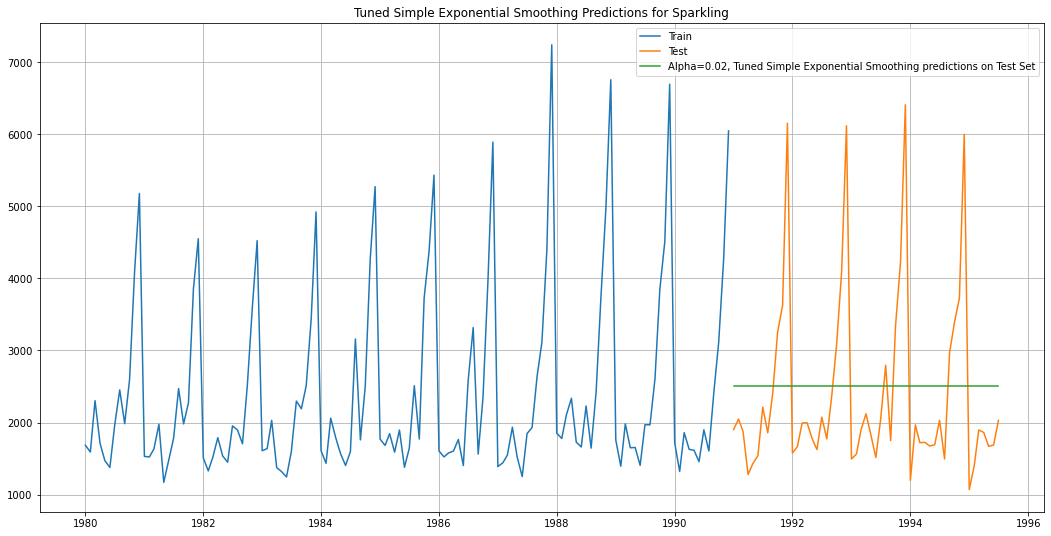

In [121]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(SES_train['Sparkling'], label='Train')
plt.plot(SES_test['Sparkling'], label='Test')

plt.plot(SES_test['predict', 0.02], label='Alpha=0.02, Tuned Simple Exponential Smoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid()
plt.title('Tuned Simple Exponential Smoothing Predictions for Sparkling');

In [122]:
temp_resultsDf = pd.DataFrame({'Test RMSE-Sparkling':  [resultsDf_S.sort_values(by=['Test RMSE'],ascending=True).values[0][2]]}
                              ,index=['Alpha=0.02:Tuned Simple Exponential Smoothing'])

resultsDf = pd.concat([resultsDf, temp_resultsDf])
resultsDf

Test RMSE-Sparkling
Linear Regression                                      1389.135175
Naive Approach                                         3864.279352
Simple Average                                         1275.081804
2point Trailing Moving Average                          813.400684
4point Trailing Moving Average                         1156.589694
6point Trailing Moving Average                         1283.927428
9point Trailing Moving Average                         1346.278315
Alpha=0.049:Simple Exponential Smoothing               1316.035487
Alpha=0.02:Tuned Simple Exponential Smoothing          1279.495201

### Simple Exponential Smoothing for Rose

In [123]:
SES_train_r = train_r.copy()
SES_test_r = test_r.copy()

In [124]:
model_SES_R = SimpleExpSmoothing(SES_train_r['Rose'])

F:\DS\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [125]:
model_SES_autofit_R = model_SES_R.fit(optimized=True)

In [126]:
model_SES_autofit_R.params

{'smoothing_level': 0.0987493111726833,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 134.38720226208358,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [127]:
SES_test_r['predict'] = model_SES_autofit_R.forecast(steps = len(SES_test_r))
SES_test_r.head()

Rose    predict
YearMonth                  
1991-01-01  54.0  87.104983
1991-02-01  55.0  87.104983
1991-03-01  66.0  87.104983
1991-04-01  65.0  87.104983
1991-05-01  60.0  87.104983

In [128]:
# Using the fitted model on the training set to forecast on the test set
SES_predict_R = model_SES_autofit_R.forecast(steps=len(SES_test_r))
SES_predict_R

1991-01-01    87.104983
1991-02-01    87.104983
1991-03-01    87.104983
1991-04-01    87.104983
1991-05-01    87.104983
1991-06-01    87.104983
1991-07-01    87.104983
1991-08-01    87.104983
1991-09-01    87.104983
1991-10-01    87.104983
1991-11-01    87.104983
1991-12-01    87.104983
1992-01-01    87.104983
1992-02-01    87.104983
1992-03-01    87.104983
1992-04-01    87.104983
1992-05-01    87.104983
1992-06-01    87.104983
1992-07-01    87.104983
1992-08-01    87.104983
1992-09-01    87.104983
1992-10-01    87.104983
1992-11-01    87.104983
1992-12-01    87.104983
1993-01-01    87.104983
1993-02-01    87.104983
1993-03-01    87.104983
1993-04-01    87.104983
1993-05-01    87.104983
1993-06-01    87.104983
1993-07-01    87.104983
1993-08-01    87.104983
1993-09-01    87.104983
1993-10-01    87.104983
1993-11-01    87.104983
1993-12-01    87.104983
1994-01-01    87.104983
1994-02-01    87.104983
1994-03-01    87.104983
1994-04-01    87.104983
1994-05-01    87.104983
1994-06-01    87

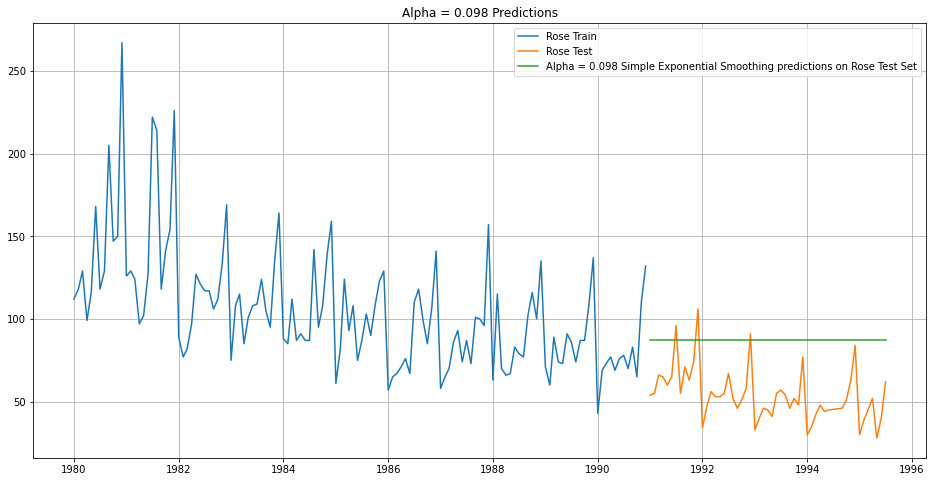

In [129]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(SES_train_r['Rose'], label='Rose Train')
plt.plot(SES_test_r['Rose'], label='Rose Test')

plt.plot(SES_test_r['predict'], label='Alpha = 0.098 Simple Exponential Smoothing predictions on Rose Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha = 0.098 Predictions');

In [130]:
## Test Data - RMSE
from sklearn import metrics

rmse_SES_test_R = metrics.mean_squared_error(SES_test_r['Rose'],SES_predict_R,squared=False)
print("For SES forecast on the Rose Test Data,  RMSE is %3.3f" %(rmse_SES_test_R))

For SES forecast on the Rose Test Data,  RMSE is 36.796


In [131]:
temp_resultsDf = pd.DataFrame({'Test RMSE-Rose': [metrics.mean_squared_error(SES_test_r['Rose'],SES_predict_R,squared=False)]},
                         index=['Alpha= 0.098:Simple Exponential Smoothing'])
resultsDf_r = pd.concat([resultsDf_r, temp_resultsDf])
resultsDf_r

Test RMSE-Rose
Linear Regression                               15.268955
Naive Approach                                  79.718773
Simple Average                                  53.460570
2point Trailing Moving Average                  11.529278
4point Trailing Moving Average                  14.451403
6point Trailing Moving Average                  14.566327
9point Trailing Moving Average                  14.727630
Alpha= 0.098:Simple Exponential Smoothing       36.796227

### Tuning Simple Exponential Smoothing for Rose

In [132]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_R = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_R

Empty DataFrame
Columns: [Alpha Values, Train RMSE, Test RMSE]
Index: []

In [133]:
for i in np.arange(0.01,1,0.01):
    model_SES_alpha_i =  model_SES_R.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_train_r['predict',i] = model_SES_alpha_i.fittedvalues 
    SES_test_r['predict',i] = model_SES_alpha_i.forecast(len(SES_test_r))
    
    rmse_model_train_i = metrics.mean_squared_error(SES_train_r['Rose'],SES_train_r['predict',i],squared=False)
    
    rmse_model_test_i = metrics.mean_squared_error(SES_test_r['Rose'],SES_test_r['predict',i],squared=False)
    
    resultsDf_R = resultsDf_R.append({'Alpha Values':i,'Train RMSE':rmse_model_train_i 
                                      ,'Test RMSE':rmse_model_test_i}, ignore_index=True)

In [134]:
resultsDf_R.sort_values(by=['Test RMSE'],ascending=True).head()

Alpha Values  Train RMSE  Test RMSE
6          0.07   32.046904  36.435772
7          0.08   31.936243  36.462965
5          0.06   32.209657  36.580469
8          0.09   31.862435  36.604118
9          0.10   31.815610  36.828033

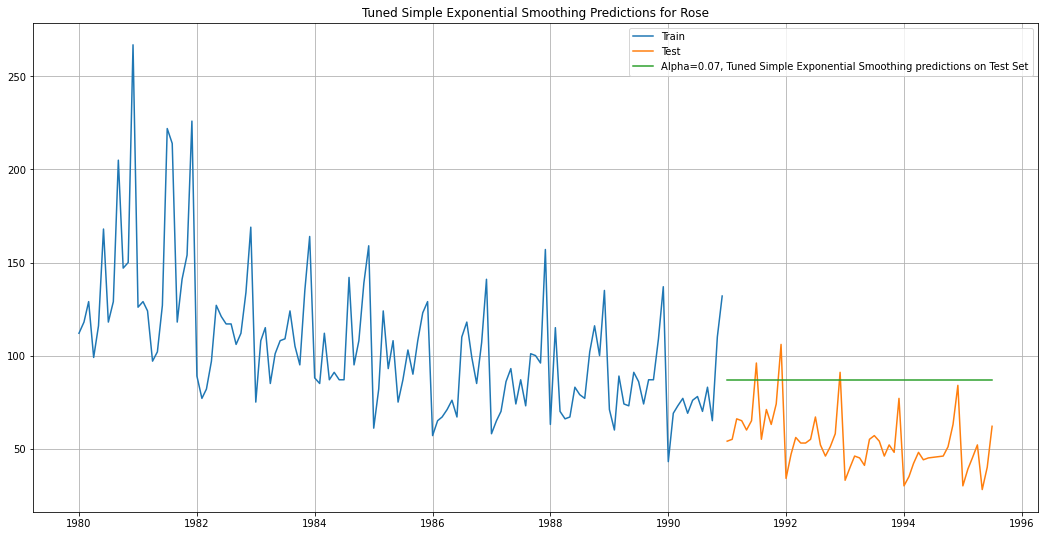

In [135]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(SES_train_r['Rose'], label='Train')
plt.plot(SES_test_r['Rose'], label='Test')

plt.plot(SES_test_r['predict', 0.08], label='Alpha=0.07, Tuned Simple Exponential Smoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid()
plt.title('Tuned Simple Exponential Smoothing Predictions for Rose');

In [136]:
temp_resultsDf = pd.DataFrame({'Test RMSE-Rose': [resultsDf_R.sort_values(by=['Test RMSE'],ascending=True).values[0][2]]}
                              ,index=['Alpha=0.07:Tuned Simple Exponential Smoothing'])

resultsDf_r = pd.concat([resultsDf_r, temp_resultsDf])
resultsDf_r

Test RMSE-Rose
Linear Regression                                   15.268955
Naive Approach                                      79.718773
Simple Average                                      53.460570
2point Trailing Moving Average                      11.529278
4point Trailing Moving Average                      14.451403
6point Trailing Moving Average                      14.566327
9point Trailing Moving Average                      14.727630
Alpha= 0.098:Simple Exponential Smoothing           36.796227
Alpha=0.07:Tuned Simple Exponential Smoothing       36.435772

## Model- 6 Double Exponential Smoothing (DES) Holt - ETS(A, A, N)
* One of the drawbacks of the simple exponential smoothing is that the model does not do well in the presence of the trend.
* This model is an extension of SES known as Double Exponential model which estimates two smoothing parameters.
* Applicable when data has Trend but no seasonality.
* Two separate components are considered: Level and Trend.
* Level is the local mean.
* One smoothing parameter α corresponds to the level series
* A second smoothing parameter β corresponds to the trend series.

**Double Exponential Smoothing uses two equations to forecast future values of the time series, one for forecating the short term avarage value or level and the other for capturing the trend.**

* Intercept or Level equation, $L_t$ is given by:
$L_t = {\alpha}{Y_t}  + (1 - \alpha)F_t$ 

* Trend equation is given by 
$T_t = {\beta}{(L_t - L_{t-1})}  + (1 - \beta)T_{t-1}$ 

Here, $\alpha$ and $\beta$ are the smoothing constants for level and trend, respectively, 
* 0 <$\alpha$ < 1 and 0 < $\beta$ < 1.

The forecast at time t + 1 is given by
* $F_{t+1} = L_t + T_t$
* $F_{t+n} = L_t + nT_t$

### Double Exponential Smoothing for Sparkling (Holt's Model)

In [138]:
DES_train_s = train_s.copy()
DES_test_s = test_s.copy()

In [139]:
# Initializing the Double Exponential Smoothing Model
model_DES_s = Holt(DES_train_s, initialization_method='estimated')
# Fitting the model
model_DES_s = model_DES_s.fit()

print('')
print('==Holt model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_DES_s.params)


==Holt model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.6649999999999999, 'smoothing_trend': 0.0001, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1502.1999999999991, 'initial_trend': 74.87272727272739, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


F:\DS\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
F:\DS\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [140]:
# Forecasting using this model for the duration of the test set
DES_predict_s =  model_DES_s.forecast(len(DES_test_s))
DES_predict_s

1991-01-01    5401.733026
1991-02-01    5476.005230
1991-03-01    5550.277433
1991-04-01    5624.549637
1991-05-01    5698.821840
1991-06-01    5773.094044
1991-07-01    5847.366248
1991-08-01    5921.638451
1991-09-01    5995.910655
1991-10-01    6070.182858
1991-11-01    6144.455062
1991-12-01    6218.727266
1992-01-01    6292.999469
1992-02-01    6367.271673
1992-03-01    6441.543876
1992-04-01    6515.816080
1992-05-01    6590.088284
1992-06-01    6664.360487
1992-07-01    6738.632691
1992-08-01    6812.904894
1992-09-01    6887.177098
1992-10-01    6961.449302
1992-11-01    7035.721505
1992-12-01    7109.993709
1993-01-01    7184.265912
1993-02-01    7258.538116
1993-03-01    7332.810320
1993-04-01    7407.082523
1993-05-01    7481.354727
1993-06-01    7555.626930
1993-07-01    7629.899134
1993-08-01    7704.171338
1993-09-01    7778.443541
1993-10-01    7852.715745
1993-11-01    7926.987948
1993-12-01    8001.260152
1994-01-01    8075.532356
1994-02-01    8149.804559
1994-03-01  

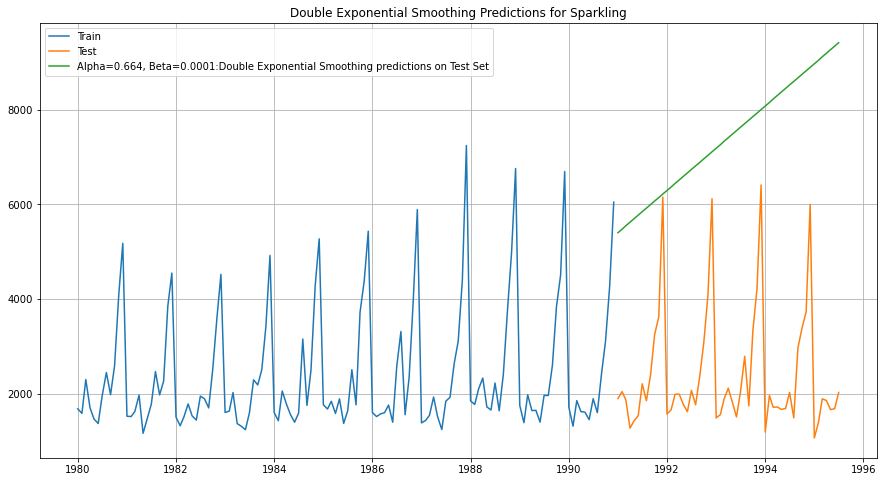

In [141]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(DES_train_s, label='Train')
plt.plot(DES_test_s, label='Test')

plt.plot(DES_predict_s, label='Alpha=0.664, Beta=0.0001:Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Double Exponential Smoothing Predictions for Sparkling');

We see that the double exponential smoothing is picking up the trend component along with the level component as well.

In [142]:
print('DES RMSE:',mean_squared_error(DES_test_s.values,DES_predict_s.values,squared=False))

DES RMSE: 5291.8798332269125


In [143]:
resultsDf_temp = pd.DataFrame({'Test RMSE-Sparkling': [mean_squared_error(DES_test_s.values,DES_predict_s.values,squared=False)]}
                           ,index=['Alpha=0.66,Beta=0.0001:DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

Test RMSE-Sparkling
Linear Regression                                          1389.135175
Naive Approach                                             3864.279352
Simple Average                                             1275.081804
2point Trailing Moving Average                              813.400684
4point Trailing Moving Average                             1156.589694
6point Trailing Moving Average                             1283.927428
9point Trailing Moving Average                             1346.278315
Alpha=0.049:Simple Exponential Smoothing                   1316.035487
Alpha=0.02:Tuned Simple Exponential Smoothing              1279.495201
Alpha=0.66,Beta=0.0001:DoubleExponentialSmoothing          5291.879833

### Tuning Double Exponential Smoothing for Sparkling

In [144]:
resultsDf_blank = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_blank

Empty DataFrame
Columns: [Alpha Values, Beta Values, Train RMSE, Test RMSE]
Index: []

In [145]:
model_DES_s = Holt(DES_train_s['Sparkling'])
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        model_DES_alpha_i_j = model_DES_s.fit(smoothing_level=i,smoothing_trend=j,optimized=False,use_brute=True)
        DES_train_s['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test_s['predict',i,j] = model_DES_alpha_i_j.forecast(steps=1000)
        
        rmse_model2_train = metrics.mean_squared_error(DES_train_s['Sparkling'],DES_train_s['predict',i,j],squared=False)
        
        rmse_model2_test = metrics.mean_squared_error(DES_test_s['Sparkling'],DES_test_s['predict',i,j],squared=False)
        
        resultsDf_blank = resultsDf_blank.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model2_train
                                          ,'Test RMSE':rmse_model2_test}, ignore_index=True)

F:\DS\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [146]:
resultsDf_blank.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values   Train RMSE    Test RMSE
0            0.1          0.1  1382.520870  1778.564670
1            0.1          0.2  1413.598835  2599.439986
10           0.2          0.1  1418.041591  3611.763322
2            0.1          0.3  1445.762015  4293.084674
20           0.3          0.1  1431.169601  5908.185554

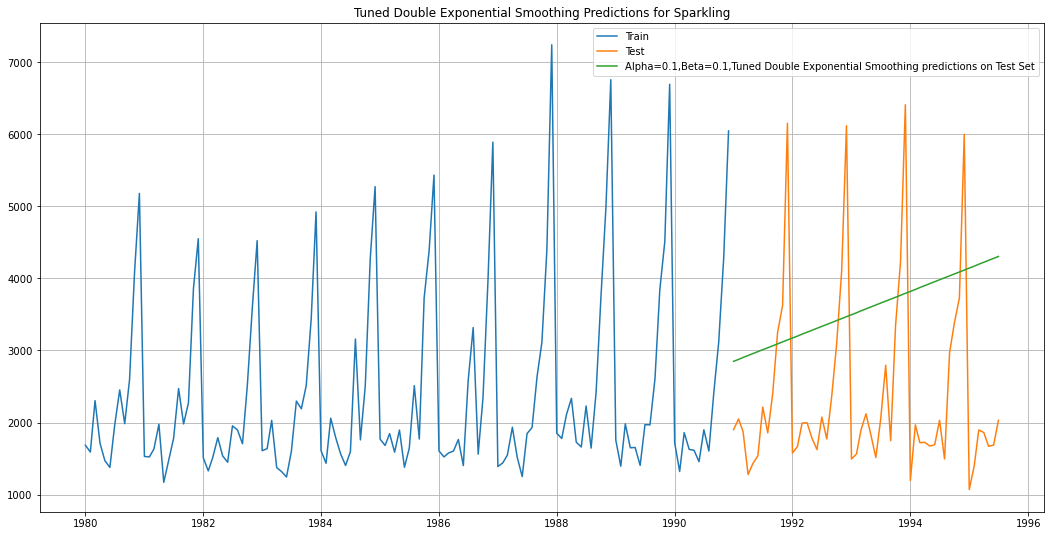

In [147]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(DES_train_s['Sparkling'], label='Train')
plt.plot(DES_test_s['Sparkling'], label='Test')

plt.plot(DES_test_s['predict', 0.1, 0.1], label='Alpha=0.1,Beta=0.1,Tuned Double Exponential Smoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid()
plt.title('Tuned Double Exponential Smoothing Predictions for Sparkling');

In [148]:
resultsDf_temp = pd.DataFrame({'Test RMSE-Sparkling': [resultsDf_blank.sort_values(by=['Test RMSE']).values[0][3]]}
                           ,index=['Alpha=0.1,Beta=0.1:Tuned Double Exponential Smoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

Test RMSE-Sparkling
Linear Regression                                           1389.135175
Naive Approach                                              3864.279352
Simple Average                                              1275.081804
2point Trailing Moving Average                               813.400684
4point Trailing Moving Average                              1156.589694
6point Trailing Moving Average                              1283.927428
9point Trailing Moving Average                              1346.278315
Alpha=0.049:Simple Exponential Smoothing                    1316.035487
Alpha=0.02:Tuned Simple Exponential Smoothing               1279.495201
Alpha=0.66,Beta=0.0001:DoubleExponentialSmoothing           5291.879833
Alpha=0.1,Beta=0.1:Tuned Double Exponential Smo...          1778.564670

### Double Exponential Smoothing for Rose (Holt's Model)

In [149]:
DES_train_r = train_r.copy()
DES_test_r = test_r.copy()

In [150]:
# Initializing the Double Exponential Smoothing Model
model_DES_r = Holt(DES_train_r, initialization_method='estimated')
# Fitting the model
model_DES_r = model_DES_r.fit()

print('')
print('==Holt model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_DES_r.params)


==Holt model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 1.4901161193847656e-08, 'smoothing_trend': 1.6610391146660035e-10, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 137.81553690867275, 'initial_trend': -0.4943781897068274, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


F:\DS\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [151]:
# Forecasting using this model for the duration of the test set
DES_predict_r =  model_DES_r.forecast(len(DES_test_r))
DES_predict_r

1991-01-01    72.063238
1991-02-01    71.568859
1991-03-01    71.074481
1991-04-01    70.580103
1991-05-01    70.085725
1991-06-01    69.591347
1991-07-01    69.096969
1991-08-01    68.602590
1991-09-01    68.108212
1991-10-01    67.613834
1991-11-01    67.119456
1991-12-01    66.625078
1992-01-01    66.130699
1992-02-01    65.636321
1992-03-01    65.141943
1992-04-01    64.647565
1992-05-01    64.153187
1992-06-01    63.658808
1992-07-01    63.164430
1992-08-01    62.670052
1992-09-01    62.175674
1992-10-01    61.681296
1992-11-01    61.186918
1992-12-01    60.692539
1993-01-01    60.198161
1993-02-01    59.703783
1993-03-01    59.209405
1993-04-01    58.715027
1993-05-01    58.220648
1993-06-01    57.726270
1993-07-01    57.231892
1993-08-01    56.737514
1993-09-01    56.243136
1993-10-01    55.748757
1993-11-01    55.254379
1993-12-01    54.760001
1994-01-01    54.265623
1994-02-01    53.771245
1994-03-01    53.276866
1994-04-01    52.782488
1994-05-01    52.288110
1994-06-01    51

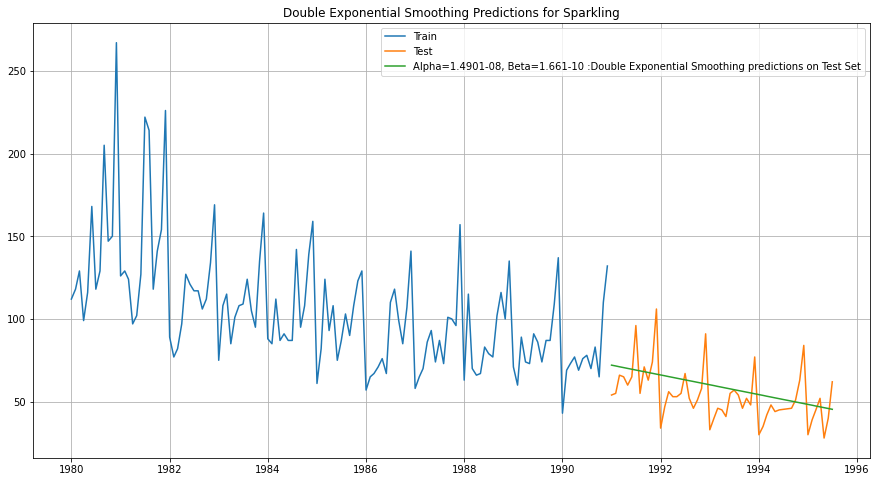

In [152]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(DES_train_r, label='Train')
plt.plot(DES_test_r, label='Test')

plt.plot(DES_predict_r, label='Alpha=1.4901-08, Beta=1.661-10 :Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Double Exponential Smoothing Predictions for Sparkling');

In [153]:
print('DES RMSE:',mean_squared_error(DES_test_r.values,DES_predict_r.values,squared=False))

DES RMSE: 15.268943764436564


In [154]:
temp_resultsDf = pd.DataFrame({'Test RMSE-Rose': [mean_squared_error(DES_test_r.values,DES_predict_r.values,squared=False)]}
                              ,index=['Alpha=1.4901-08,,Beta=1.661-10:Double Exponential Smoothing'])

resultsDf_r = pd.concat([resultsDf_r, temp_resultsDf])
resultsDf_r

Test RMSE-Rose
Linear Regression                                        15.268955
Naive Approach                                           79.718773
Simple Average                                           53.460570
2point Trailing Moving Average                           11.529278
4point Trailing Moving Average                           14.451403
6point Trailing Moving Average                           14.566327
9point Trailing Moving Average                           14.727630
Alpha= 0.098:Simple Exponential Smoothing                36.796227
Alpha=0.07:Tuned Simple Exponential Smoothing            36.435772
Alpha=1.4901-08,,Beta=1.661-10:Double Exponenti...       15.268944

### Tuning Double Exponential Smoothing for Rose

In [155]:
resultsDf_blank = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_blank

Empty DataFrame
Columns: [Alpha Values, Beta Values, Train RMSE, Test RMSE]
Index: []

In [156]:
model_DES_r = Holt(DES_train_r['Rose'])
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        model_DES_alpha_i_j = model_DES_r.fit(smoothing_level=i,smoothing_trend=j,optimized=False,use_brute=True)
        DES_train_r['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test_r['predict',i,j] = model_DES_alpha_i_j.forecast(steps=1000)
        
        rmse_model2_train = metrics.mean_squared_error(DES_train_r['Rose'],DES_train_r['predict',i,j],squared=False)
        
        rmse_model2_test = metrics.mean_squared_error(DES_test_r['Rose'],DES_test_r['predict',i,j],squared=False)
        
        resultsDf_blank = resultsDf_blank.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model2_train
                                          ,'Test RMSE':rmse_model2_test}, ignore_index=True)

F:\DS\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [157]:
resultsDf_blank.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values  Train RMSE  Test RMSE
0            0.1          0.1   34.439111  36.923416
1            0.1          0.2   33.450729  48.688648
10           0.2          0.1   33.097427  65.731702
2            0.1          0.3   33.145789  78.156641
20           0.3          0.1   33.611269  98.653317

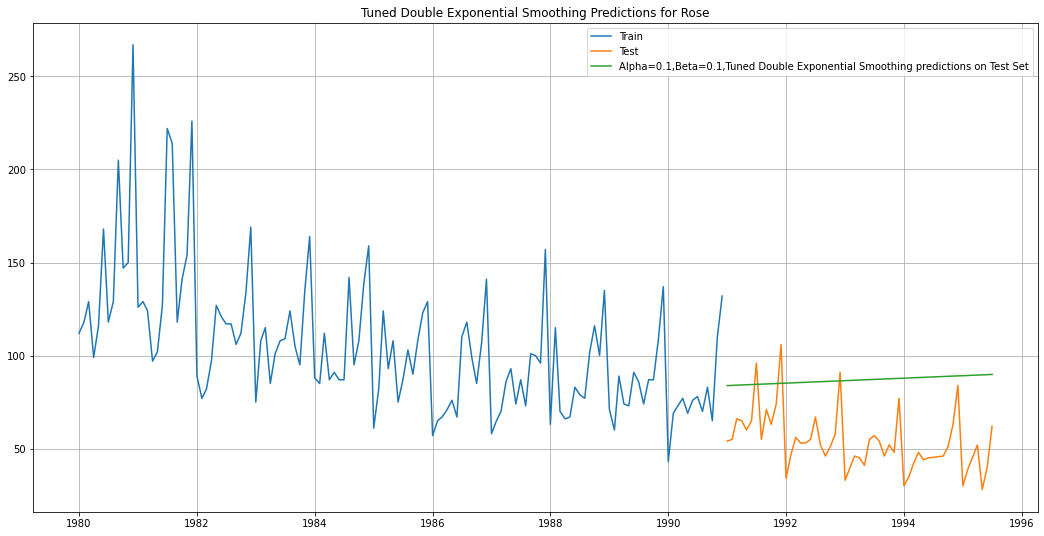

In [158]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(DES_train_r['Rose'], label='Train')
plt.plot(DES_test_r['Rose'], label='Test')

plt.plot(DES_test_r['predict', 0.1, 0.1], label='Alpha=0.1,Beta=0.1,Tuned Double Exponential Smoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid()
plt.title('Tuned Double Exponential Smoothing Predictions for Rose');

In [159]:
temp_resultsDf = pd.DataFrame({'Test RMSE-Rose':[resultsDf_blank.sort_values(by=['Test RMSE']).values[0][3]]}
                              ,index=['Alpha=0.1,,Beta=0.1:Tuned Double Exponential Smoothing'])

resultsDf_r = pd.concat([resultsDf_r, temp_resultsDf])
resultsDf_r

Test RMSE-Rose
Linear Regression                                        15.268955
Naive Approach                                           79.718773
Simple Average                                           53.460570
2point Trailing Moving Average                           11.529278
4point Trailing Moving Average                           14.451403
6point Trailing Moving Average                           14.566327
9point Trailing Moving Average                           14.727630
Alpha= 0.098:Simple Exponential Smoothing                36.796227
Alpha=0.07:Tuned Simple Exponential Smoothing            36.435772
Alpha=1.4901-08,,Beta=1.661-10:Double Exponenti...       15.268944
Alpha=0.1,,Beta=0.1:Tuned Double Exponential Sm...       36.923416

**Inference**
Here, we see that the Double Exponential Smoothing has actually done well when compared to the Simple Exponential Smoothing. This is because of the fact that the Double Exponential Smoothing model has picked up the trend component as well.


## Model- 3 Triple Exponential Smoothing (TES) Holt Winter's - ETS(A, A, M)

### Triple Exponential Smoothing for Sparkling (Holt Winter's Model)

In [160]:
TES_train_s = train_s.copy()
TES_test_s = test_s.copy()

In [161]:
# Initializing the Triple Exponential Smoothing Model
model_TES_s = ExponentialSmoothing(TES_train_s['Sparkling'],trend='multiplicative',seasonal='multiplicative',
                                   initialization_method='estimated')

F:\DS\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [162]:
model_TES_autofit_s= model_TES_s.fit()

F:\DS\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [163]:
model_TES_autofit_s.params

{'smoothing_level': 0.11106668752955826,
 'smoothing_trend': 0.04936072355729082,
 'smoothing_seasonal': 0.3621821387810734,
 'damping_trend': nan,
 'initial_level': 2360.4089797373545,
 'initial_trend': 0.9992288111047797,
 'initial_seasons': array([0.71936124, 0.6984697 , 0.90024844, 0.80991063, 0.66820986,
        0.66898271, 0.87875613, 1.11648842, 0.90067181, 1.17297733,
        1.82687893, 2.27815792]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [164]:
## Prediction on the test data

TES_test_s['auto_predict'] = model_TES_autofit_s.forecast(steps=len(TES_test_s))
TES_test_s.head()

Sparkling  auto_predict
YearMonth                          
1991-01-01       1902   1591.299973
1991-02-01       2049   1360.408886
1991-03-01       1874   1767.949510
1991-04-01       1279   1661.619432
1991-05-01       1432   1547.414170

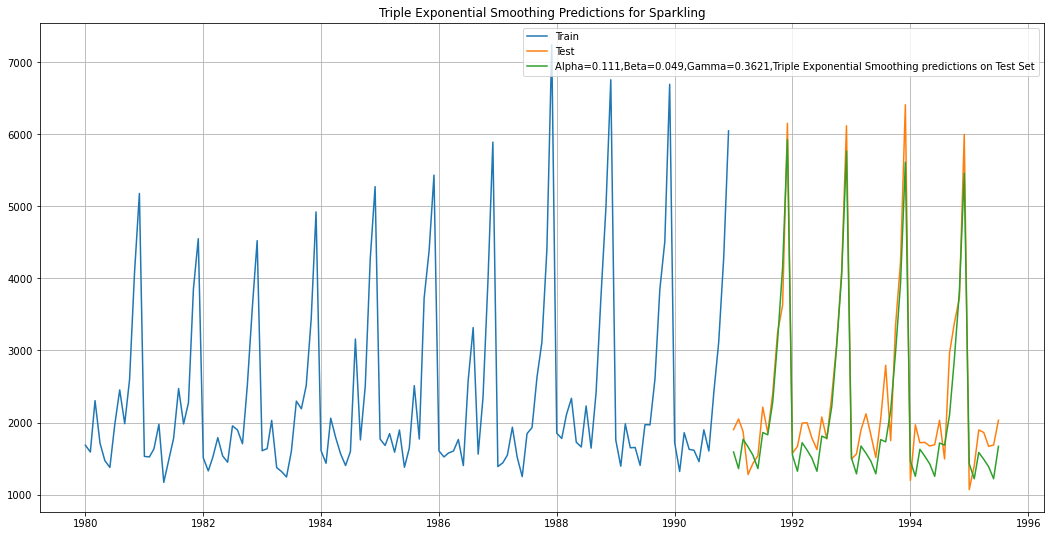

In [165]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(TES_train_s['Sparkling'], label='Train')
plt.plot(TES_test_s['Sparkling'], label='Test')

plt.plot(TES_test_s['auto_predict'] , label='Alpha=0.111,Beta=0.049,Gamma=0.3621,Triple Exponential Smoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid()
plt.title('Triple Exponential Smoothing Predictions for Sparkling');

In [166]:
print('TES RMSE:',mean_squared_error(TES_test_s['Sparkling'],TES_test_s['auto_predict'].values,squared=False))

TES RMSE: 380.3984781419219


In [167]:
resultsDf_temp = pd.DataFrame({'Test RMSE-Sparkling': [mean_squared_error(TES_test_s['Sparkling'],TES_test_s['auto_predict'].values,squared=False)]}
                           ,index=['Alpha=0.111,Beta=0.049,Gamma=0.362:Triple Exponential Smoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

Test RMSE-Sparkling
Linear Regression                                           1389.135175
Naive Approach                                              3864.279352
Simple Average                                              1275.081804
2point Trailing Moving Average                               813.400684
4point Trailing Moving Average                              1156.589694
6point Trailing Moving Average                              1283.927428
9point Trailing Moving Average                              1346.278315
Alpha=0.049:Simple Exponential Smoothing                    1316.035487
Alpha=0.02:Tuned Simple Exponential Smoothing               1279.495201
Alpha=0.66,Beta=0.0001:DoubleExponentialSmoothing           5291.879833
Alpha=0.1,Beta=0.1:Tuned Double Exponential Smo...          1778.564670
Alpha=0.111,Beta=0.049,Gamma=0.362:Triple Expon...           380.398478

### Tuning Triple Exponential Smoothing for Sparkling (Holt Winter's Model)

In [168]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_2

Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, Train RMSE, Test RMSE]
Index: []

In [169]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        for k in np.arange(0.1,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES_s.fit(smoothing_level=i,smoothing_trend=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train_s['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test_s['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(TES_test_s))
        
            rmse_model_train = metrics.mean_squared_error(TES_train_s['Sparkling'],TES_train_s['predict',i,j,k],squared=False)
            
            rmse_model_test = metrics.mean_squared_error(TES_test_s['Sparkling'],TES_test_s['predict',i,j,k],squared=False)
            
            resultsDf_2 = resultsDf_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model_train,'Test RMSE':rmse_model_test}
                                                 , ignore_index=True)

C:\Users\pooja kabadi\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_regression.py:256: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,
C:\Users\pooja kabadi\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_regression.py:256: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,
C:\Users\pooja kabadi\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_regression.py:256: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,
C:\Users\pooja kabadi\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_regression.py:256: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,
C:\Users\pooja kabadi\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_regression.py:256: RuntimeWarning: overflow encountered in square
 

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [170]:
resultsDf_2.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values  Gamma Values  Train RMSE   Test RMSE
302           0.4          0.1           0.3  381.106645  326.579641
201           0.3          0.1           0.2  375.956510  342.464413
110           0.2          0.2           0.1  395.987244  345.931571
131           0.2          0.4           0.2  401.704682  349.425739
222           0.3          0.3           0.3  396.692796  353.602587

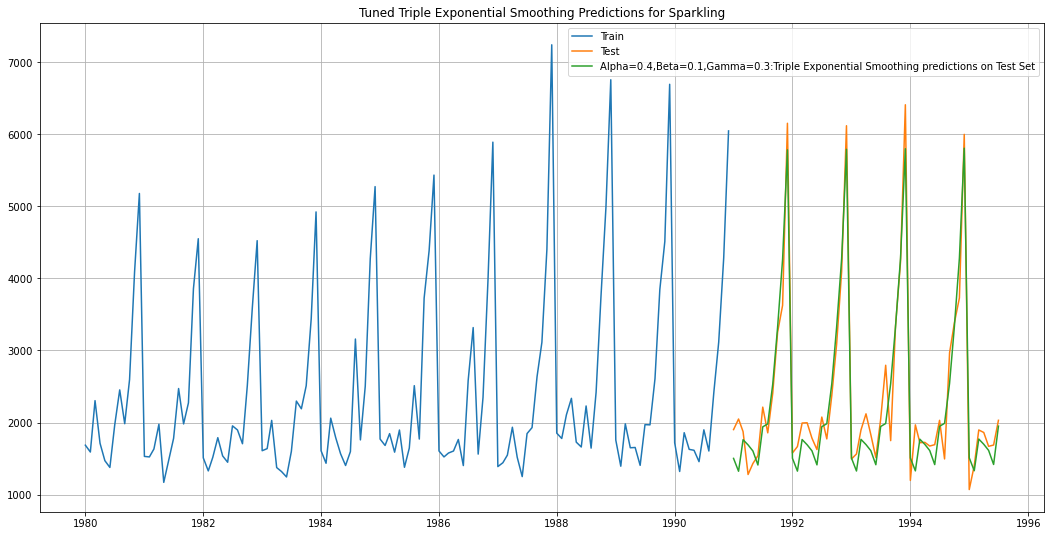

In [171]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination

plt.figure(figsize=(18,9))
plt.plot(TES_train_s['Sparkling'], label='Train')
plt.plot(TES_test_s['Sparkling'], label='Test')

#The value of alpha and beta is taken like that by python
plt.plot(TES_test_s['predict', 0.40000000000000004,0.10000000000000001,0.30000000000000003],
         label='Alpha=0.4,Beta=0.1,Gamma=0.3:Triple Exponential Smoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();
plt.title('Tuned Triple Exponential Smoothing Predictions for Sparkling');

In [172]:
resultsDf_temp = pd.DataFrame({'Test RMSE-Sparkling': [resultsDf_2.sort_values(by=['Test RMSE']).values[0][4]]}
                           ,index=['Alpha=0.4,Beta=0.01,Gamma=0.3:Tuned Triple Exponential Smoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

Test RMSE-Sparkling
Linear Regression                                           1389.135175
Naive Approach                                              3864.279352
Simple Average                                              1275.081804
2point Trailing Moving Average                               813.400684
4point Trailing Moving Average                              1156.589694
6point Trailing Moving Average                              1283.927428
9point Trailing Moving Average                              1346.278315
Alpha=0.049:Simple Exponential Smoothing                    1316.035487
Alpha=0.02:Tuned Simple Exponential Smoothing               1279.495201
Alpha=0.66,Beta=0.0001:DoubleExponentialSmoothing           5291.879833
Alpha=0.1,Beta=0.1:Tuned Double Exponential Smo...          1778.564670
Alpha=0.111,Beta=0.049,Gamma=0.362:Triple Expon...           380.398478
Alpha=0.4,Beta=0.01,Gamma=0.3:Tuned Triple Expo...           326.579641

### Triple Exponential Smoothing for Rose (Holt Winter's Model)

In [173]:
TES_train_r = train_r.copy()
TES_test_r = test_r.copy()

In [174]:
# Initializing the Triple Exponential Smoothing Model
model_TES_r = ExponentialSmoothing(TES_train_r['Rose'],trend='multiplicative',seasonal='multiplicative',
                                   initialization_method='estimated')

F:\DS\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [175]:
model_TES_autofit_r= model_TES_r.fit()

F:\DS\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [176]:
model_TES_autofit_r.params

{'smoothing_level': 0.05509258651447915,
 'smoothing_trend': 0.03163443011388579,
 'smoothing_seasonal': 0.00033441920536960617,
 'damping_trend': nan,
 'initial_level': 162.24448448772696,
 'initial_trend': 0.9924159109944972,
 'initial_seasons': array([0.69939026, 0.79380649, 0.86893412, 0.75865299, 0.85377453,
        0.9282575 , 1.02003364, 1.08767274, 1.03068915, 1.00761385,
        1.17626069, 1.61916255]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [177]:
## Prediction on the test data

TES_test_r['auto_predict'] = model_TES_autofit_r.forecast(steps=len(TES_test_r))
TES_test_r.head()

Rose  auto_predict
YearMonth                     
1991-01-01  54.0     55.663816
1991-02-01  55.0     62.993228
1991-03-01  66.0     68.738503
1991-04-01  65.0     59.835212
1991-05-01  60.0     67.118704

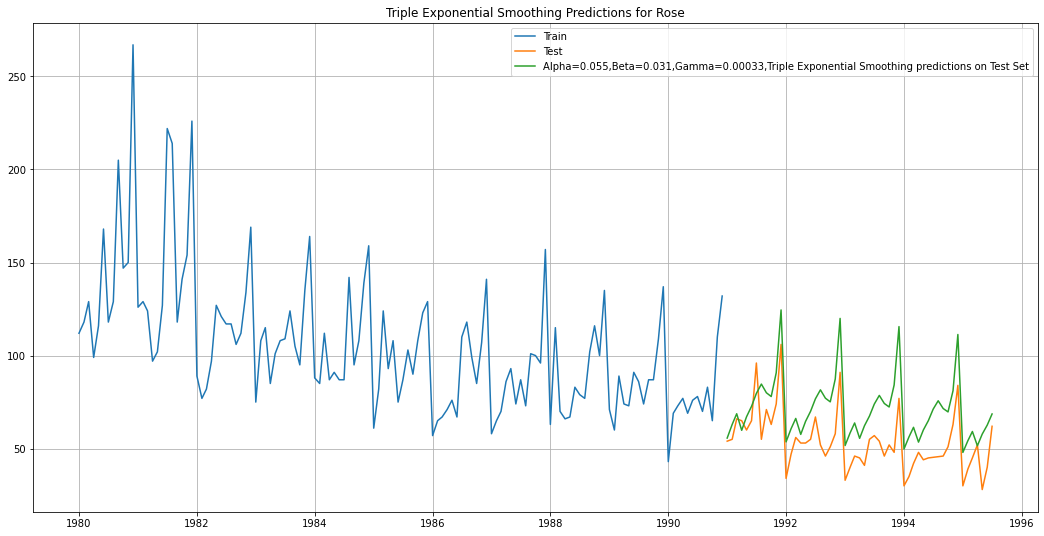

In [178]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(TES_train_r['Rose'], label='Train')
plt.plot(TES_test_r['Rose'], label='Test')

plt.plot(TES_test_r['auto_predict'] , label='Alpha=0.055,Beta=0.031,Gamma=0.00033,Triple Exponential Smoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid()
plt.title('Triple Exponential Smoothing Predictions for Rose');

In [179]:
print('TES RMSE:',mean_squared_error(TES_test_r['Rose'],TES_test_r['auto_predict'].values,squared=False))

TES RMSE: 19.98744868511025


In [180]:
temp_resultsDf = pd.DataFrame({'Test RMSE-Rose':[mean_squared_error(TES_test_r['Rose'],TES_test_r['auto_predict'].values,squared=False)]}
                              ,index=['Alpha=0.055,Beta=0.031,Gamma=0.00033:Triple Exponential Smoothing'])

resultsDf_r = pd.concat([resultsDf_r, temp_resultsDf])
resultsDf_r

Test RMSE-Rose
Linear Regression                                        15.268955
Naive Approach                                           79.718773
Simple Average                                           53.460570
2point Trailing Moving Average                           11.529278
4point Trailing Moving Average                           14.451403
6point Trailing Moving Average                           14.566327
9point Trailing Moving Average                           14.727630
Alpha= 0.098:Simple Exponential Smoothing                36.796227
Alpha=0.07:Tuned Simple Exponential Smoothing            36.435772
Alpha=1.4901-08,,Beta=1.661-10:Double Exponenti...       15.268944
Alpha=0.1,,Beta=0.1:Tuned Double Exponential Sm...       36.923416
Alpha=0.055,Beta=0.031,Gamma=0.00033:Triple Exp...       19.987449

### Tuning Triple Exponential Smoothing for Rose (Holt Winter's Model)

In [181]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_3 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_3

Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, Train RMSE, Test RMSE]
Index: []

In [183]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        for k in np.arange(0.1,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES_r.fit(smoothing_level=i,smoothing_trend=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train_r['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test_r['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(TES_test_r))
        
            rmse_model_train = metrics.mean_squared_error(TES_train_r['Rose'],TES_train_r['predict',i,j,k],squared=False)
            
            rmse_model_test = metrics.mean_squared_error(TES_test_r['Rose'],TES_test_r['predict',i,j,k],squared=False)
            
            resultsDf_3 = resultsDf_3.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model_train,'Test RMSE':rmse_model_test}
                                                 , ignore_index=True)

C:\Users\pooja kabadi\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_regression.py:256: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,
C:\Users\pooja kabadi\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_regression.py:256: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,
C:\Users\pooja kabadi\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_regression.py:256: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,
C:\Users\pooja kabadi\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_regression.py:256: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,
F:\DS\lib\site-packages\statsmodels\tsa\holtwinters\model.py:1352: RuntimeWarning: overflow encountered in power
  b[nobs:] = dampen(b[nobs], phi_h)
F:\

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [184]:
resultsDf_3.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values  Gamma Values  Train RMSE  Test RMSE
1080           0.2          0.7           0.2   24.042290   8.702460
161            0.2          0.7           0.2   24.042290   8.702460
215            0.3          0.2           0.6   26.940472  10.206702
1134           0.3          0.2           0.6   26.940472  10.206702
10             0.1          0.2           0.1   19.647823  11.133402

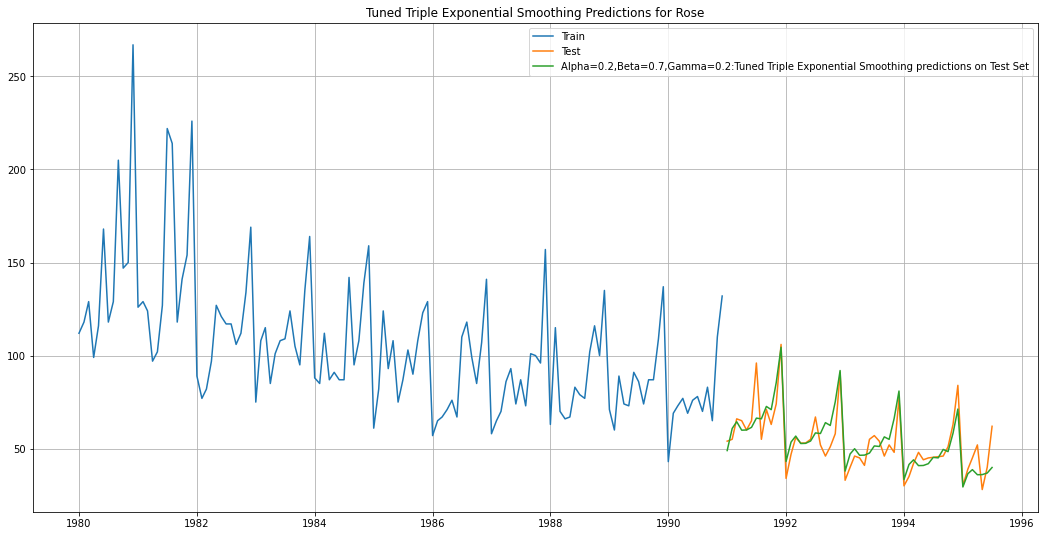

In [185]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination

plt.figure(figsize=(18,9))
plt.plot(TES_train_r['Rose'], label='Train')
plt.plot(TES_test_r['Rose'], label='Test')

#The value of alpha and beta is taken like that by python
plt.plot(TES_test_r['predict', 0.20000000000000002,0.70000000000000007,0.2],
         label='Alpha=0.2,Beta=0.7,Gamma=0.2:Tuned Triple Exponential Smoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();
plt.title('Tuned Triple Exponential Smoothing Predictions for Rose');

In [186]:
temp_resultsDf = pd.DataFrame({'Test RMSE-Rose':[resultsDf_3.sort_values(by=['Test RMSE']).values[0][4]]}
                              ,index=['Alpha=0.2,Beta=0.7,Gamma=0.2:Tuned Triple Exponential Smoothing'])

resultsDf_r = pd.concat([resultsDf_r, temp_resultsDf])
resultsDf_r

Test RMSE-Rose
Linear Regression                                        15.268955
Naive Approach                                           79.718773
Simple Average                                           53.460570
2point Trailing Moving Average                           11.529278
4point Trailing Moving Average                           14.451403
6point Trailing Moving Average                           14.566327
9point Trailing Moving Average                           14.727630
Alpha= 0.098:Simple Exponential Smoothing                36.796227
Alpha=0.07:Tuned Simple Exponential Smoothing            36.435772
Alpha=1.4901-08,,Beta=1.661-10:Double Exponenti...       15.268944
Alpha=0.1,,Beta=0.1:Tuned Double Exponential Sm...       36.923416
Alpha=0.055,Beta=0.031,Gamma=0.00033:Triple Exp...       19.987449
Alpha=0.2,Beta=0.7,Gamma=0.2:Tuned Triple Expon...        8.702460

## 5. Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05.

**Ho: Time series is non-stationary**

**Ha: Time series is stationary**

**Also given that alpha = 0.05**

In [188]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

### Checking for stationarity of the whole Time Series data for Sparkling.

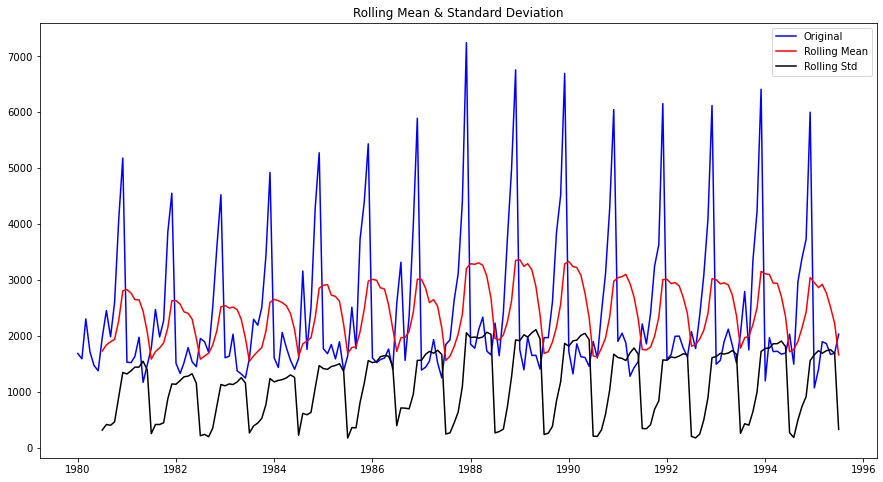

Results of Dickey-Fuller Test:
Test Statistic                  -1.360497
p-value                          0.601061
#Lags Used                      11.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [189]:
test_stationarity(df1['Sparkling'])

Although from the graphs, it looks like the series is stationary but p-value (0.6) is greater than alpha (0.05)

Therefore, we fail to reject Null hypothesis. The series is non-stationary

Let us take a difference of order 1 and check whether the Time Series is stationary or not.

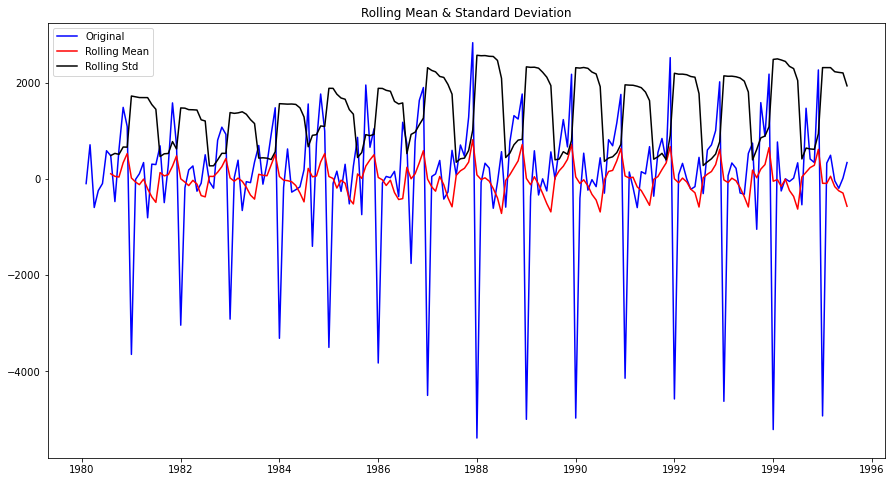

Results of Dickey-Fuller Test:
Test Statistic                 -45.050301
p-value                          0.000000
#Lags Used                      10.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [190]:
test_stationarity(df1['Sparkling'].diff().dropna())

For this series, the p-value (0.0000) is less than alpha (0.05), therefore we can reject the null hypothesis.

Therefore the series at difference of order 1 is stationary

### Checking for stationarity of the data on which the model is being built for Sparkling.

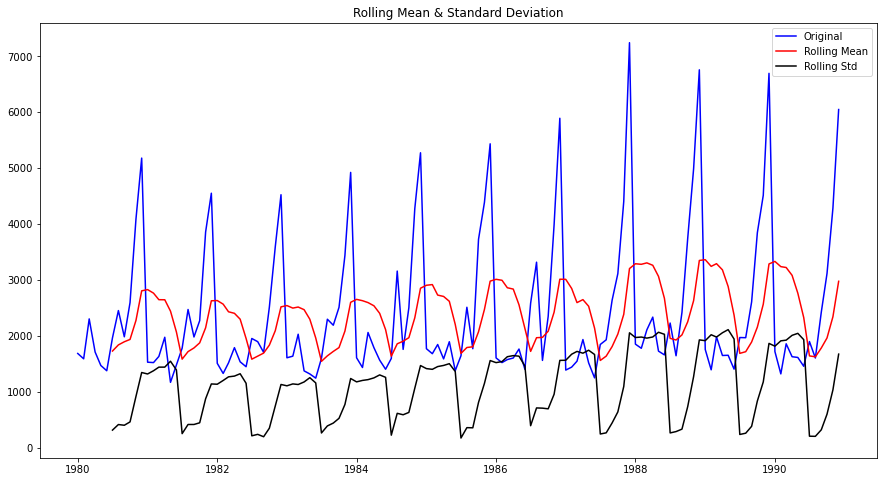

Results of Dickey-Fuller Test:
Test Statistic                  -1.208926
p-value                          0.669744
#Lags Used                      12.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64 



In [191]:
test_stationarity(train_s['Sparkling'])

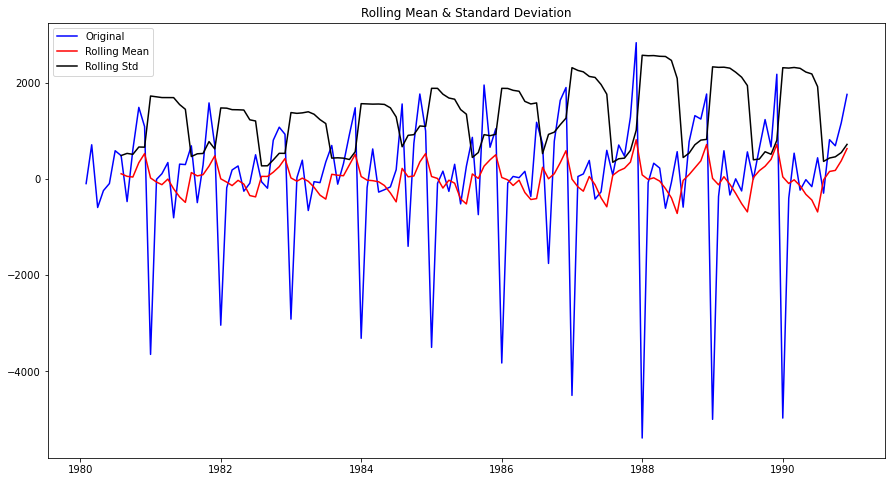

Results of Dickey-Fuller Test:
Test Statistic                -8.005007e+00
p-value                        2.280104e-12
#Lags Used                     1.100000e+01
Number of Observations Used    1.190000e+02
Critical Value (1%)           -3.486535e+00
Critical Value (5%)           -2.886151e+00
Critical Value (10%)          -2.579896e+00
dtype: float64 



In [192]:
test_stationarity(train_s['Sparkling'].diff().dropna())

We see that after taking a difference of order 1 the series have become stationary at $\alpha$ = 0.05.

### Checking for stationarity of the whole Time Series data for Rose.

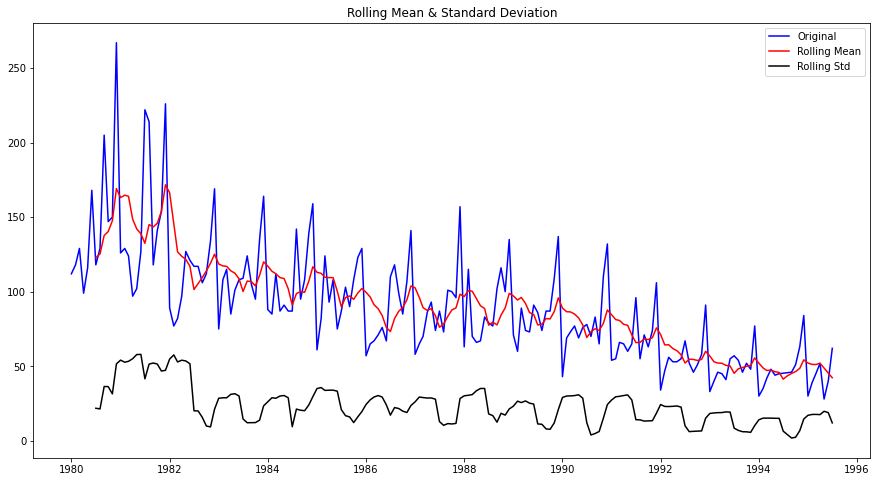

Results of Dickey-Fuller Test:
Test Statistic                  -1.876699
p-value                          0.343101
#Lags Used                      13.000000
Number of Observations Used    173.000000
Critical Value (1%)             -3.468726
Critical Value (5%)             -2.878396
Critical Value (10%)            -2.575756
dtype: float64 



In [193]:
test_stationarity(df2['Rose'])

Since p-value (0.34) is greater than alpha (0.05), we fail to reject the Null Hypothesis.

Therefore Rose time series is Non-stationary

Let us take a difference of order 1 and check whether the Time Series is stationary or not.

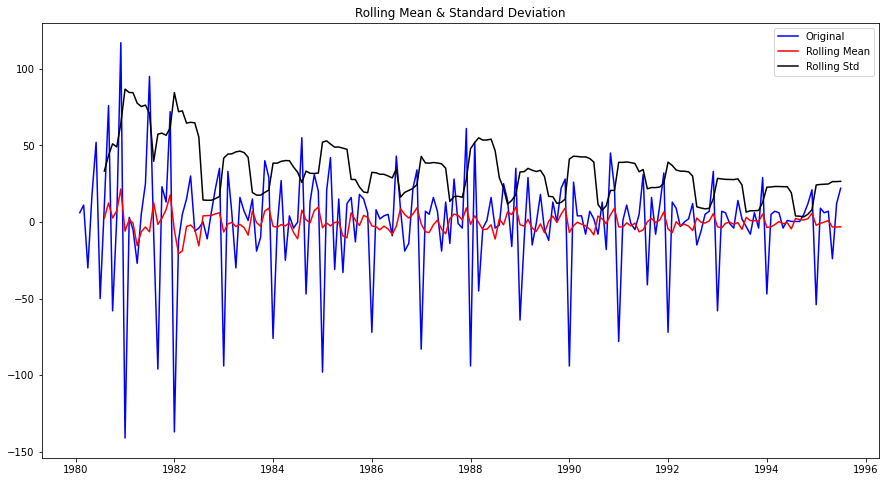

Results of Dickey-Fuller Test:
Test Statistic                -8.044392e+00
p-value                        1.810895e-12
#Lags Used                     1.200000e+01
Number of Observations Used    1.730000e+02
Critical Value (1%)           -3.468726e+00
Critical Value (5%)           -2.878396e+00
Critical Value (10%)          -2.575756e+00
dtype: float64 



In [195]:
test_stationarity(df2['Rose'].diff().dropna())

For this series, the p-value (1.8e-12) is less than alpha (0.05), therefore we can reject the null hypothesis.

Therefore the series at difference of order 1 is stationary

### Checking for stationarity of the data on which the model is being built for Rose

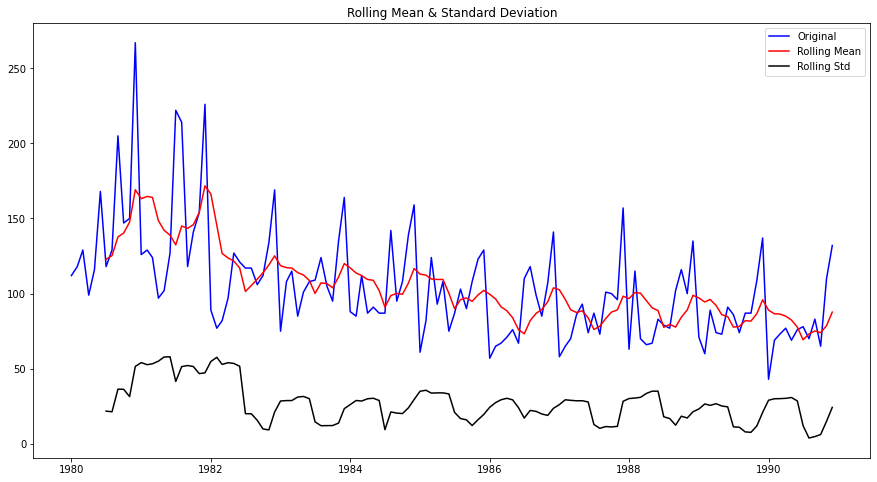

Results of Dickey-Fuller Test:
Test Statistic                  -2.164250
p-value                          0.219476
#Lags Used                      13.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64 



In [196]:
test_stationarity(train_r['Rose'])

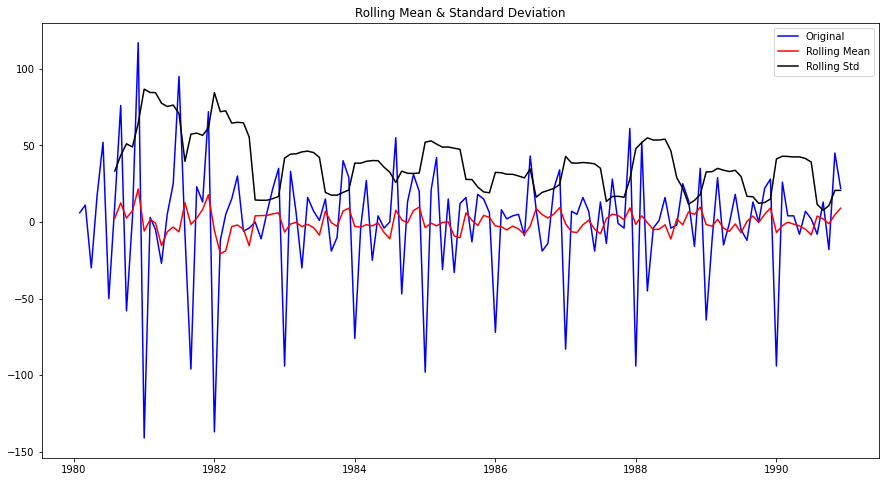

Results of Dickey-Fuller Test:
Test Statistic                -6.592372e+00
p-value                        7.061944e-09
#Lags Used                     1.200000e+01
Number of Observations Used    1.180000e+02
Critical Value (1%)           -3.487022e+00
Critical Value (5%)           -2.886363e+00
Critical Value (10%)          -2.580009e+00
dtype: float64 



In [197]:
test_stationarity(train_r['Rose'].diff().dropna())

We see that after taking a difference of order 1 the series have become stationary at $\alpha$ = 0.05.

## 6. Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

## ARIMA & SARIMA model for Sparkling

### Plotting the Autocorrelation and the Partial Autocorrelation function plots for Sparkling.

In [199]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

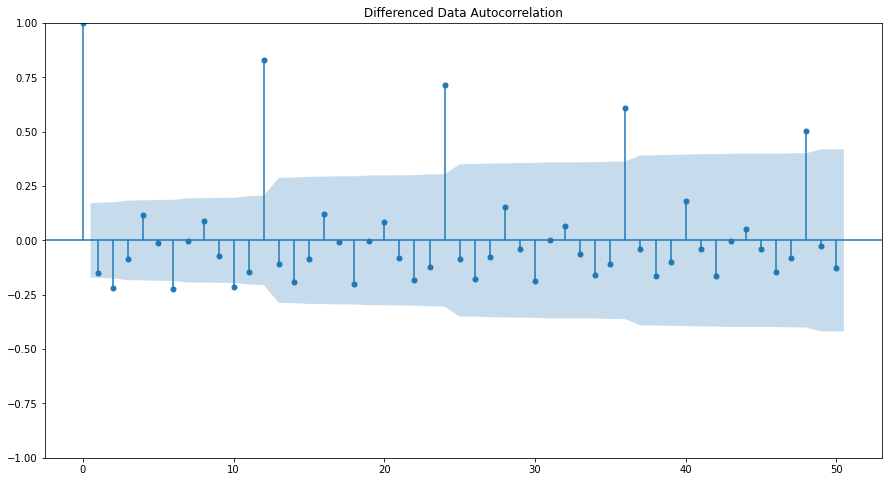

In [200]:
plot_acf(train_s['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

F:\DS\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


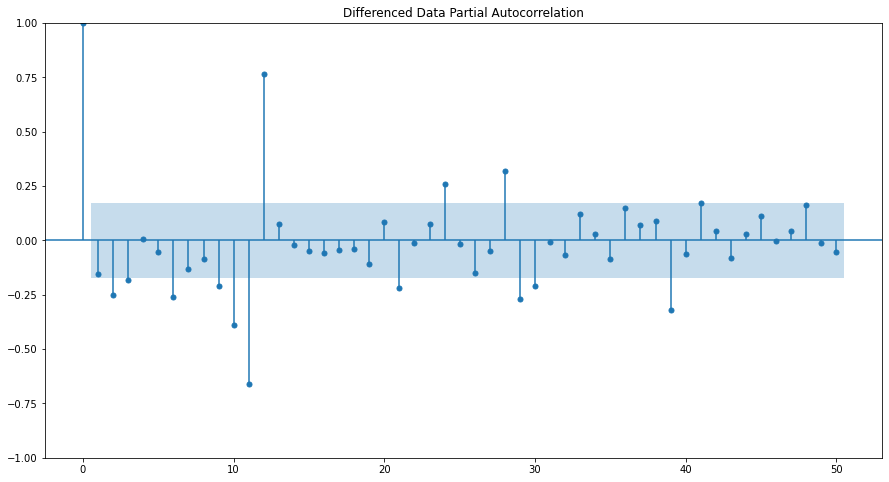

In [201]:
plot_pacf(train_s['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

Here, we have taken alpha=0.05.

* The Auto-Regressive parameter in an ARIMA model is 'p' which comes from the significant lag before which the PACF plot cuts-off to 0.
* The Moving-Average parameter in an ARIMA model is 'q' which comes from the significant lag before the ACF plot cuts-off to 0.

By looking at the above plots, we can say that both the PACF and ACF plot cuts-off at lag 0.

### Build an Automated version of an ARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

### ARIMA model for which the best parameters are selected for Sparkling

In [202]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [203]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [204]:
import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

In [205]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train_s['Sparkling'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:2267.6630357855465
ARIMA(0, 1, 1) - AIC:2263.060015591336
ARIMA(0, 1, 2) - AIC:2234.4083231283275
ARIMA(1, 1, 0) - AIC:2266.6085393190087


F:\DS\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(1, 1, 1) - AIC:2235.755094673383
ARIMA(1, 1, 2) - AIC:2234.527200452466
ARIMA(2, 1, 0) - AIC:2260.365743968086
ARIMA(2, 1, 1) - AIC:2233.777626239922
ARIMA(2, 1, 2) - AIC:2213.509212306332


In [206]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True)

param          AIC
8  (2, 1, 2)  2213.509212
7  (2, 1, 1)  2233.777626
2  (0, 1, 2)  2234.408323
5  (1, 1, 2)  2234.527200
4  (1, 1, 1)  2235.755095
6  (2, 1, 0)  2260.365744
1  (0, 1, 1)  2263.060016
3  (1, 1, 0)  2266.608539
0  (0, 1, 0)  2267.663036

In [207]:
from statsmodels.tsa.arima.model import ARIMA

auto_ARIMA = ARIMA(train_s['Sparkling'], order=(2,1,2))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

F:\DS\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
F:\DS\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
F:\DS\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1101.755
Date:                Wed, 23 Mar 2022   AIC                           2213.509
Time:                        00:46:21   BIC                           2227.885
Sample:                    01-01-1980   HQIC                          2219.351
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3121      0.046     28.781      0.000       1.223       1.401
ar.L2         -0.5593      0.072     -7.741      0.000      -0.701      -0.418
ma.L1         -1.9917      0.109    -18.217      0.0

**Note: When we see that both the AR(p) and the MA(q) model are of order 0, we have to convert the input variable into a 'float64' type variable else Python might throw an error.**

### Predicting on the Sparkling Test Set using this model and evaluate the model.

In [208]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test_s))

In [209]:
rmse = mean_squared_error(test_s['Sparkling'],predicted_auto_ARIMA.values,squared=False)
print(rmse)

1299.9795689481477


In [210]:
resultsDf_temp = pd.DataFrame({'Test RMSE-Sparkling':  [rmse]}
                                          ,index=['ARIMA(2,1,2) AIC criteria'])
resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

Test RMSE-Sparkling
Linear Regression                                           1389.135175
Naive Approach                                              3864.279352
Simple Average                                              1275.081804
2point Trailing Moving Average                               813.400684
4point Trailing Moving Average                              1156.589694
6point Trailing Moving Average                              1283.927428
9point Trailing Moving Average                              1346.278315
Alpha=0.049:Simple Exponential Smoothing                    1316.035487
Alpha=0.02:Tuned Simple Exponential Smoothing               1279.495201
Alpha=0.66,Beta=0.0001:DoubleExponentialSmoothing           5291.879833
Alpha=0.1,Beta=0.1:Tuned Double Exponential Smo...          1778.564670
Alpha=0.111,Beta=0.049,Gamma=0.362:Triple Expon...           380.398478
Alpha=0.4,Beta=0.01,Gamma=0.3:Tuned Triple Expo...           326.579641
ARIMA(2,1,2) AIC criteria                                   1299.979569

### Build an Automated version of a SARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

### SARIMA model for which the best parameters for Sparkling

Let us look at the ACF plot on train data once more to understand the seasonal parameter for the SARIMA model.

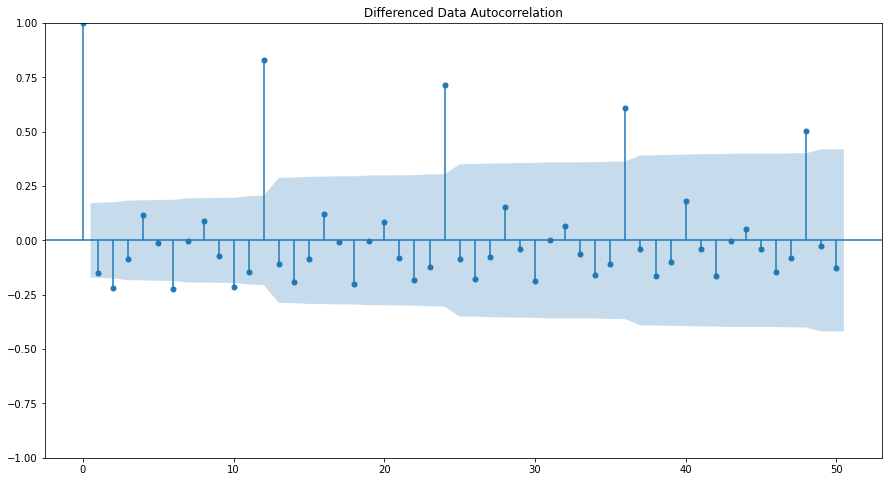

In [211]:
plot_acf(train_s['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

We see that there can be a seasonality of 4. We will run our auto SARIMA models by setting seasonality.

### Setting the seasonality as 12 for the first iteration of the auto SARIMA model for Sparkling.

In [212]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [213]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [214]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train_s['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1956.2614616846013
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:1723.1533640236748
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1837.4366022456675
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1806.9905301388796
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:1633.2108735791871
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:1648.3776153470856
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:1647.2054158610893
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:1630.9898053920836
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:2230.1629078505825
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1923.7688649566526
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:1692.7089573264204
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1797.1795881838495
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1738.090319377595
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:1570.1509144030938
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:1605.6751954177198
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:1599.2245085400543
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:1570.4018826079407
SARIMA(0, 1

In [215]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param       seasonal          AIC
50  (1, 1, 2)  (1, 0, 2, 12)  1555.584248
53  (1, 1, 2)  (2, 0, 2, 12)  1556.076790
26  (0, 1, 2)  (2, 0, 2, 12)  1557.121579
23  (0, 1, 2)  (1, 0, 2, 12)  1557.160507
77  (2, 1, 2)  (1, 0, 2, 12)  1557.340402

In [216]:
import statsmodels.api as sm

auto_SARIMA_12 = sm.tsa.statespace.SARIMAX(train_s['Sparkling'].values,
                                order=(1, 1, 2),
                                seasonal_order=(1, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_12 = auto_SARIMA_12.fit(maxiter=1000)
print(results_auto_SARIMA_12.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(1, 0, 2, 12)   Log Likelihood                -770.792
Date:                            Wed, 23 Mar 2022   AIC                           1555.584
Time:                                    00:51:14   BIC                           1574.095
Sample:                                         0   HQIC                          1563.083
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6283      0.255     -2.464      0.014      -1.128      -0.128
ma.L1         -0.1040      0.225   

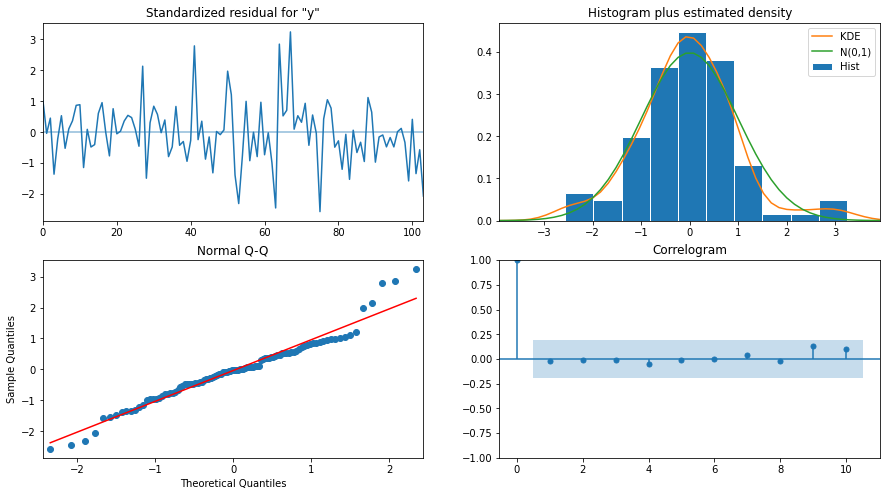

In [217]:
results_auto_SARIMA_12.plot_diagnostics()
plt.show()

### Predict on the Test Set using this model and evaluate the model.

In [218]:
predicted_auto_SARIMA_12 = results_auto_SARIMA_12.get_forecast(steps=len(test_s))

In [219]:
predicted_auto_SARIMA_12.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  1327.420690  388.340435     566.287424    2088.553956
1  1315.131011  401.998581     527.228271    2103.033752
2  1621.592088  401.992199     833.701856    2409.482321
3  1598.894150  407.229343     800.739304    2397.048996
4  1392.700709  407.958777     593.116199    2192.285219

In [220]:
rmse = mean_squared_error(test_s['Sparkling'],predicted_auto_SARIMA_12.predicted_mean,squared=False)
print(rmse)

528.6113639398799


In [221]:
resultsDf_temp = pd.DataFrame({'Test RMSE-Sparkling':  [rmse]}
                                          ,index=['SARIMA(1,1,2)(1,0,2,12) AIC criteria'])
resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

Test RMSE-Sparkling
Linear Regression                                           1389.135175
Naive Approach                                              3864.279352
Simple Average                                              1275.081804
2point Trailing Moving Average                               813.400684
4point Trailing Moving Average                              1156.589694
6point Trailing Moving Average                              1283.927428
9point Trailing Moving Average                              1346.278315
Alpha=0.049:Simple Exponential Smoothing                    1316.035487
Alpha=0.02:Tuned Simple Exponential Smoothing               1279.495201
Alpha=0.66,Beta=0.0001:DoubleExponentialSmoothing           5291.879833
Alpha=0.1,Beta=0.1:Tuned Double Exponential Smo...          1778.564670
Alpha=0.111,Beta=0.049,Gamma=0.362:Triple Expon...           380.398478
Alpha=0.4,Beta=0.01,Gamma=0.3:Tuned Triple Expo...           326.579641
ARIMA(2,1,2) AIC criteria                                   1299.979569
SARIMA(1,1,2)(1,0,2,12) AIC criteria                         528.611364

## ARIMA & SARIMA model for Rose

### Plotting the Autocorrelation and the Partial Autocorrelation function plots for Rose

In [222]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

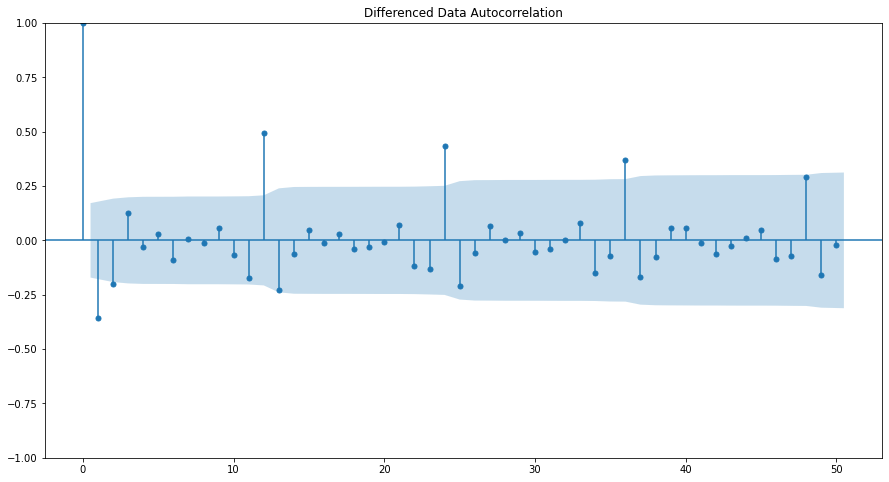

In [223]:
plot_acf(train_r['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

F:\DS\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


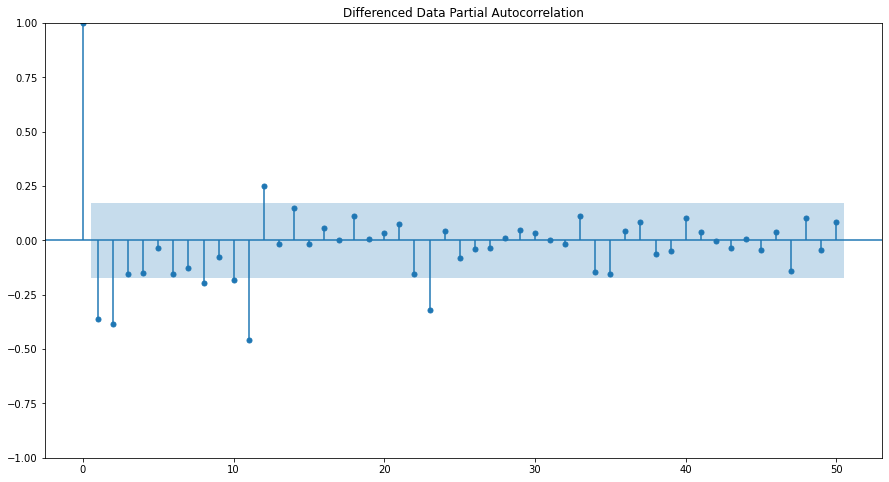

In [224]:
plot_pacf(train_r['Rose'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

**From the plot, p=2 & q=2**

### Build an Automated version of an ARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

### ARIMA model for which the best parameters are selected for Rose

In [225]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [226]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [227]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train_r['Rose'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:1333.1546729124348
ARIMA(0, 1, 1) - AIC:1282.3098319748312
ARIMA(0, 1, 2) - AIC:1279.6715288535818
ARIMA(1, 1, 0) - AIC:1317.3503105381492
ARIMA(1, 1, 1) - AIC:1280.5742295380032
ARIMA(1, 1, 2) - AIC:1279.870723423191
ARIMA(2, 1, 0) - AIC:1298.6110341605004
ARIMA(2, 1, 1) - AIC:1281.5078621868474
ARIMA(2, 1, 2) - AIC:1281.8707222264284


In [228]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True)

param          AIC
2  (0, 1, 2)  1279.671529
5  (1, 1, 2)  1279.870723
4  (1, 1, 1)  1280.574230
7  (2, 1, 1)  1281.507862
8  (2, 1, 2)  1281.870722
1  (0, 1, 1)  1282.309832
6  (2, 1, 0)  1298.611034
3  (1, 1, 0)  1317.350311
0  (0, 1, 0)  1333.154673

In [229]:
from statsmodels.tsa.arima.model import ARIMA

auto_ARIMA = ARIMA(train_r['Rose'], order=(0,1,2))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(0, 1, 2)   Log Likelihood                -636.836
Date:                Wed, 23 Mar 2022   AIC                           1279.672
Time:                        00:55:39   BIC                           1288.297
Sample:                    01-01-1980   HQIC                          1283.176
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6970      0.072     -9.689      0.000      -0.838      -0.556
ma.L2         -0.2042      0.073     -2.794      0.005      -0.347      -0.061
sigma2       965.8407     88.305     10.938      0.0

F:\DS\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
F:\DS\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
F:\DS\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


**Note: When we see that both the AR(p) and the MA(q) model are of order 0, we have to convert the input variable into a 'float64' type variable else Python might throw an error.**

### Predicting on the Sparkling Test Set using this model and evaluate the model.

In [230]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test_r))

In [231]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test_r['Rose'],predicted_auto_ARIMA.values,squared=False)
print(rmse)

37.30647971665308


In [232]:
temp_resultsDf = pd.DataFrame({'Test RMSE-Rose': 15.619203}
                                          ,index=['ARIMA(0,1,2) AIC criteria'])

resultsDf_r = pd.concat([resultsDf_r, temp_resultsDf])
resultsDf_r

Test RMSE-Rose
Linear Regression                                        15.268955
Naive Approach                                           79.718773
Simple Average                                           53.460570
2point Trailing Moving Average                           11.529278
4point Trailing Moving Average                           14.451403
6point Trailing Moving Average                           14.566327
9point Trailing Moving Average                           14.727630
Alpha= 0.098:Simple Exponential Smoothing                36.796227
Alpha=0.07:Tuned Simple Exponential Smoothing            36.435772
Alpha=1.4901-08,,Beta=1.661-10:Double Exponenti...       15.268944
Alpha=0.1,,Beta=0.1:Tuned Double Exponential Sm...       36.923416
Alpha=0.055,Beta=0.031,Gamma=0.00033:Triple Exp...       19.987449
Alpha=0.2,Beta=0.7,Gamma=0.2:Tuned Triple Expon...        8.702460
ARIMA(0,1,2) AIC criteria                                15.619203

### Build an Automated version of a SARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

### SARIMA model for which the best parameters for Sparkling

Let us look at the ACF plot on train data once more to understand the seasonal parameter for the SARIMA model.

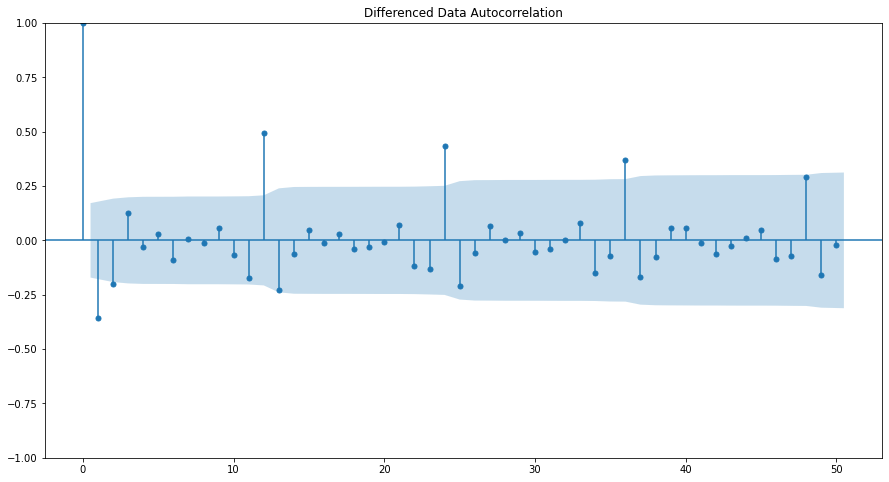

In [233]:
plot_acf(train_r['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

We see that there can be a seasonality of 12. We will run our auto SARIMA models by setting seasonality.

### Setting the seasonality as 12 for the first iteration of the auto SARIMA model for Rose.

In [234]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [235]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [236]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train_r['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:1323.9657875279158
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1145.423082720733
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:976.4375296380911
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1139.921738995602
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1116.0207869386036
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:969.6913635753504


F:\DS\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:960.8812220353041
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:962.8794540697521
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:955.573540894562
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:1263.5369097383964
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1098.5554825918337
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:923.6314049383859
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1095.793632491795
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1054.743433094527
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:918.8573483302789
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:914.5982866536075
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:915.3332430461672
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:901.1988271349375
SARIMA(0, 1, 2)x(0, 0, 0, 12) - AIC:1251.6675430541054
SARIMA(0, 1, 2)x(0, 0, 1, 12) - AIC:1083.486697526487
SARIMA(0, 1, 2)x(0, 0, 2, 12) - AIC:913.4938486617702
SARIMA(0, 1, 2)x(1, 0, 0, 12) - AIC:1088.8332843413825
SARIMA(0, 1, 2)x(1, 0, 1, 12) - AIC:1045.5400933538035
SARIMA(0, 1, 2)x(1, 0, 2, 12) - AIC:904.8310913587571
SARIMA(0, 1, 2)x(2, 0, 0

In [237]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param       seasonal         AIC
26  (0, 1, 2)  (2, 0, 2, 12)  887.937509
53  (1, 1, 2)  (2, 0, 2, 12)  889.903048
80  (2, 1, 2)  (2, 0, 2, 12)  890.668798
69  (2, 1, 1)  (2, 0, 0, 12)  896.518161
78  (2, 1, 2)  (2, 0, 0, 12)  897.346444

In [238]:
import statsmodels.api as sm

auto_SARIMA_12 = sm.tsa.statespace.SARIMAX(train_r['Rose'].values,
                                order=(0, 1, 2),
                                seasonal_order=(2, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_12 = auto_SARIMA_12.fit(maxiter=1000)
print(results_auto_SARIMA_12.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(0, 1, 2)x(2, 0, 2, 12)   Log Likelihood                -436.969
Date:                            Wed, 23 Mar 2022   AIC                            887.938
Time:                                    00:59:41   BIC                            906.448
Sample:                                         0   HQIC                           895.437
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8427    189.943     -0.004      0.996    -373.124     371.439
ma.L2         -0.1573     29.841   

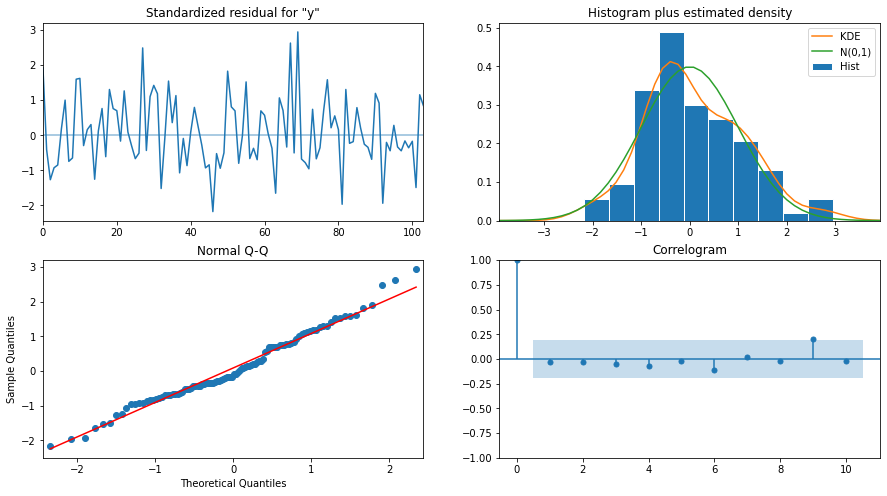

In [239]:
results_auto_SARIMA_12.plot_diagnostics()
plt.show()

### Predict on the Test Set using this model and evaluate the model.

In [240]:
predicted_auto_SARIMA_12 = results_auto_SARIMA_12.get_forecast(steps=len(test_r))

In [241]:
predicted_auto_SARIMA_12.summary_frame(alpha=0.05).head()

y       mean    mean_se  mean_ci_lower  mean_ci_upper
0  62.867265  15.928501      31.647977      94.086553
1  70.541190  16.147659      38.892360     102.190020
2  77.356411  16.147657      45.707586     109.005236
3  76.208814  16.147657      44.559989     107.857639
4  72.747398  16.147657      41.098573     104.396223

In [242]:
rmse = mean_squared_error(test_r['Rose'],predicted_auto_SARIMA_12.predicted_mean,squared=False)
print(rmse)

26.928362030237995


In [243]:
temp_resultsDf = pd.DataFrame({'Test RMSE-Rose': [rmse]}
                                          ,index=['SARIMA(0,1,2)(2,0,2,12) AIC criteria'])

resultsDf_r = pd.concat([resultsDf_r, temp_resultsDf])
resultsDf_r

Test RMSE-Rose
Linear Regression                                        15.268955
Naive Approach                                           79.718773
Simple Average                                           53.460570
2point Trailing Moving Average                           11.529278
4point Trailing Moving Average                           14.451403
6point Trailing Moving Average                           14.566327
9point Trailing Moving Average                           14.727630
Alpha= 0.098:Simple Exponential Smoothing                36.796227
Alpha=0.07:Tuned Simple Exponential Smoothing            36.435772
Alpha=1.4901-08,,Beta=1.661-10:Double Exponenti...       15.268944
Alpha=0.1,,Beta=0.1:Tuned Double Exponential Sm...       36.923416
Alpha=0.055,Beta=0.031,Gamma=0.00033:Triple Exp...       19.987449
Alpha=0.2,Beta=0.7,Gamma=0.2:Tuned Triple Expon...        8.702460
ARIMA(0,1,2) AIC criteria                                15.619203
SARIMA(0,1,2)(2,0,2,12) AIC criteria                     26.928362

## 7. Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.

### ACF and PACF for Sparkling

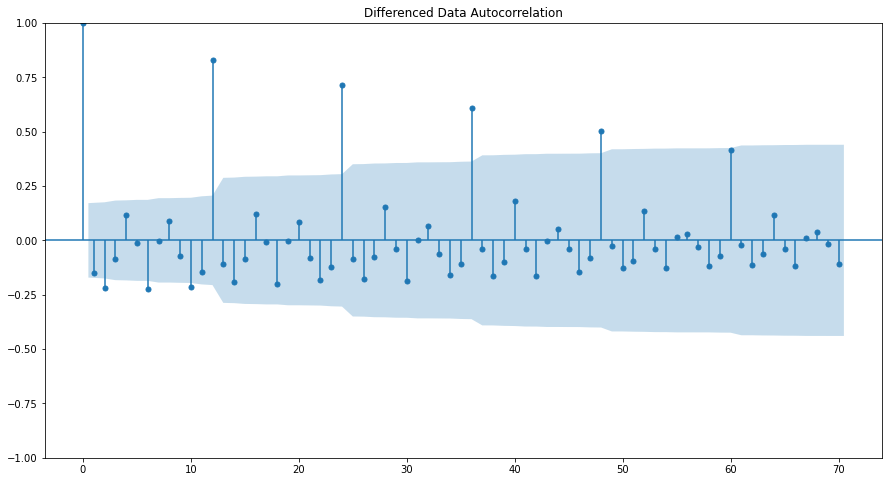

In [244]:
plot_acf(train_s['Sparkling'].diff().dropna(),lags=70,title='Differenced Data Autocorrelation')
plt.show()

F:\DS\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


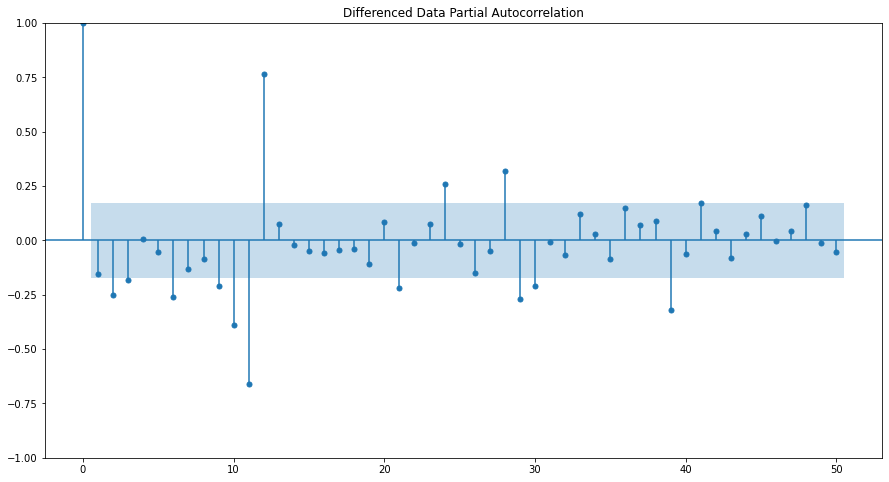

In [245]:
plot_pacf(train_s['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show();

**ARIMA - From plots we can see that p = 0 and q= 0 with d = 1**

**SARIMA - From plots P = 2 , Q = 4 and D = 1**

### Manual ARIMA model for Sparkling

In [246]:
manual_ARIMA = ARIMA(train_s['Sparkling'].astype('float64'), order=(0,1,0))

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -1132.832
Date:                Wed, 23 Mar 2022   AIC                           2267.663
Time:                        03:12:27   BIC                           2270.538
Sample:                    01-01-1980   HQIC                          2268.831
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.885e+06   1.29e+05     14.658      0.000    1.63e+06    2.14e+06
Ljung-Box (L1) (Q):                   3.07   Jarque-Bera (JB):               198.83
Prob(Q):                              0.08   Pr

F:\DS\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
F:\DS\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
F:\DS\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


### Predict on the Test Set using this model and evaluate the model.

In [247]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test_s))

In [248]:
rmse = mean_squared_error(test_s['Sparkling'],predicted_manual_ARIMA.values,squared=False)
print(rmse)

3864.2793518443914


In [249]:
resultsDf_temp = pd.DataFrame({'Test RMSE-Sparkling':  [rmse]}
                                          ,index=['ARIMA(0,1,0) Manual plot'])
resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

Test RMSE-Sparkling
Linear Regression                                           1389.135175
Naive Approach                                              3864.279352
Simple Average                                              1275.081804
2point Trailing Moving Average                               813.400684
4point Trailing Moving Average                              1156.589694
6point Trailing Moving Average                              1283.927428
9point Trailing Moving Average                              1346.278315
Alpha=0.049:Simple Exponential Smoothing                    1316.035487
Alpha=0.02:Tuned Simple Exponential Smoothing               1279.495201
Alpha=0.66,Beta=0.0001:DoubleExponentialSmoothing           5291.879833
Alpha=0.1,Beta=0.1:Tuned Double Exponential Smo...          1778.564670
Alpha=0.111,Beta=0.049,Gamma=0.362:Triple Expon...           380.398478
Alpha=0.4,Beta=0.01,Gamma=0.3:Tuned Triple Expo...           326.579641
ARIMA(2,1,2) AIC criteria                                   1299.979569
SARIMA(1,1,2)(1,0,2,12) AIC criteria                         528.611364
ARIMA(0,1,0) Manual plot                                    3864.279352

### SARIMA model for Sparkling

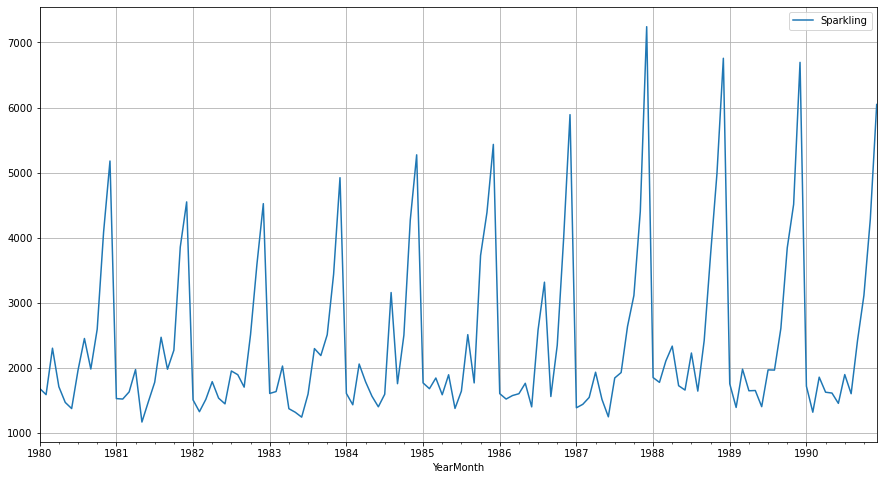

In [250]:
train_s.plot()
plt.grid();

We see that there is a very slight trend and evident seasonality. So, now we take a seasonal differencing and check the series.

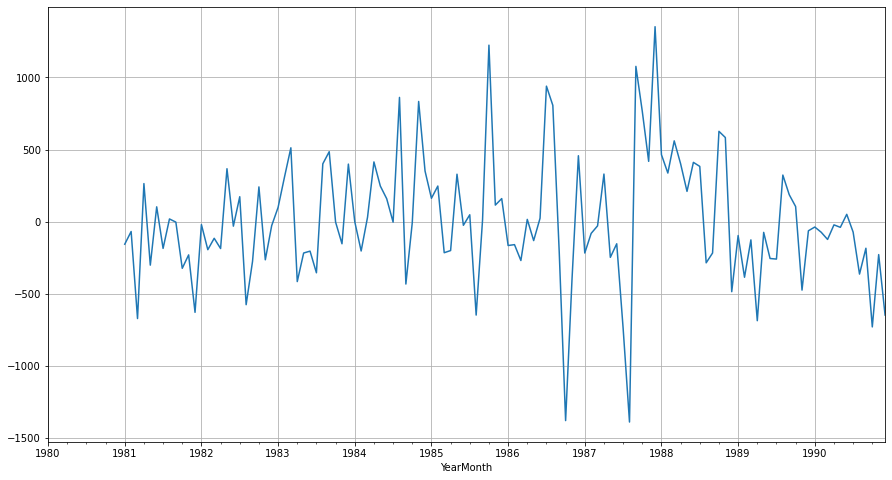

In [251]:
(train_s['Sparkling'].diff(12)).plot()
plt.grid();

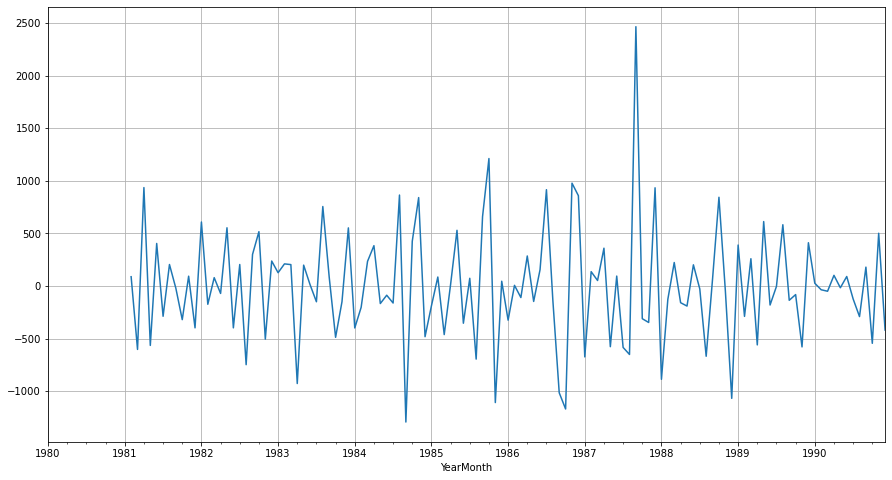

In [252]:
(train_s['Sparkling'].diff(12)).diff().plot()
plt.grid();

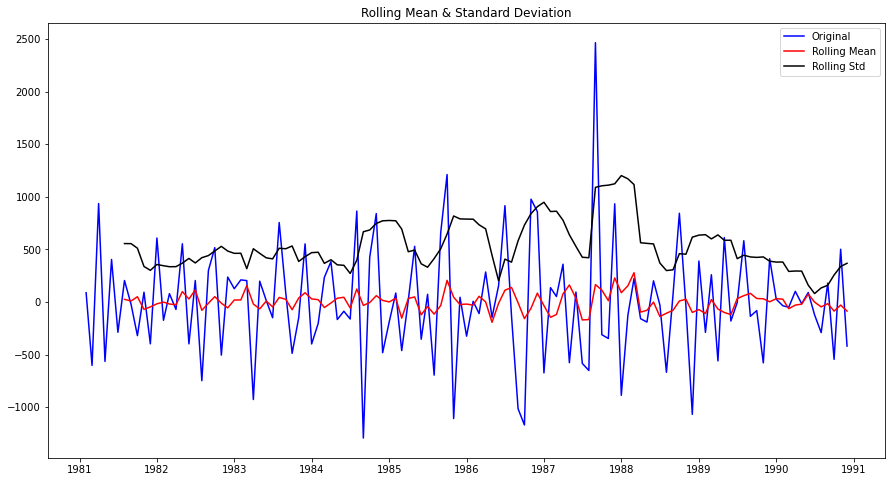

Results of Dickey-Fuller Test:
Test Statistic                  -3.342905
p-value                          0.013066
#Lags Used                      10.000000
Number of Observations Used    108.000000
Critical Value (1%)             -3.492401
Critical Value (5%)             -2.888697
Critical Value (10%)            -2.581255
dtype: float64 



In [253]:
test_stationarity((train_s['Sparkling'].diff(12).dropna()).diff().dropna())

In [254]:
import statsmodels.api as sm

manual_SARIMA = sm.tsa.statespace.SARIMAX(train_s['Sparkling'].values,
                                order=(0, 1, 0),
                                seasonal_order=(2, 1, 4, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA.summary())

F:\DS\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                           SARIMAX Results                                           
Dep. Variable:                                             y   No. Observations:                  132
Model:             SARIMAX(0, 1, 0)x(2, 1, [1, 2, 3, 4], 12)   Log Likelihood                -538.663
Date:                                       Wed, 23 Mar 2022   AIC                           1091.326
Time:                                               03:14:08   BIC                           1107.066
Sample:                                                    0   HQIC                          1097.578
                                                       - 132                                         
Covariance Type:                                         opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.5734     

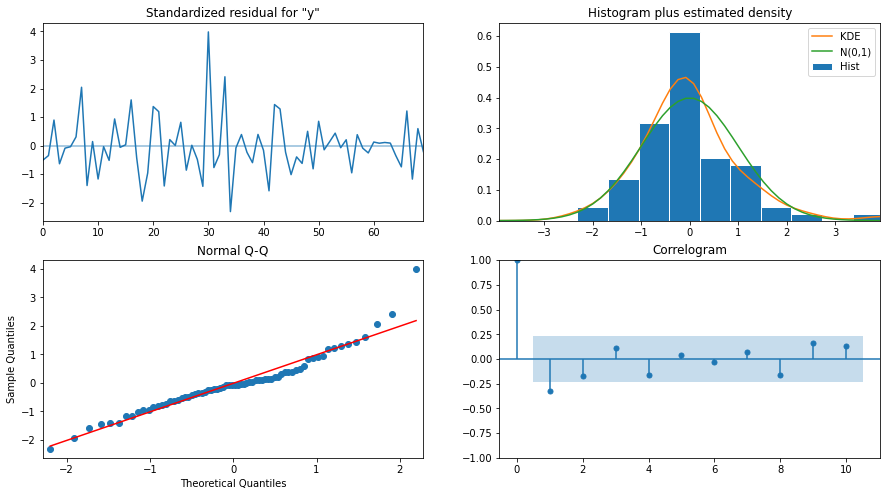

In [255]:
results_manual_SARIMA.plot_diagnostics()
plt.show()

#### Predict on the Test Set using this model and evaluate the model.

In [256]:
predicted_manual_SARIMA= results_manual_SARIMA.get_forecast(steps=len(test_s))

In [257]:
predicted_manual_SARIMA.summary_frame(alpha=0.05).head()

y         mean      mean_se  mean_ci_lower  mean_ci_upper
0  1258.379360   501.571361     275.317557    2241.441163
1   890.013778   709.162809    -499.919787    2279.947344
2  1352.591554   868.475647    -349.589437    3054.772544
3  1241.696847  1002.790113    -723.735658    3207.129352
4  1232.913127  1121.127143    -964.455694    3430.281949

In [258]:
rmse = mean_squared_error(test_s['Sparkling'],predicted_manual_SARIMA.predicted_mean,squared=False)
print(rmse)

937.5401314731712


In [259]:
resultsDf_temp = pd.DataFrame({'Test RMSE-Sparkling':  [rmse]}
                                          ,index=['SARIMA(0,1,0)(2,1,4,12) Manual plot'])
resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

Test RMSE-Sparkling
Linear Regression                                           1389.135175
Naive Approach                                              3864.279352
Simple Average                                              1275.081804
2point Trailing Moving Average                               813.400684
4point Trailing Moving Average                              1156.589694
6point Trailing Moving Average                              1283.927428
9point Trailing Moving Average                              1346.278315
Alpha=0.049:Simple Exponential Smoothing                    1316.035487
Alpha=0.02:Tuned Simple Exponential Smoothing               1279.495201
Alpha=0.66,Beta=0.0001:DoubleExponentialSmoothing           5291.879833
Alpha=0.1,Beta=0.1:Tuned Double Exponential Smo...          1778.564670
Alpha=0.111,Beta=0.049,Gamma=0.362:Triple Expon...           380.398478
Alpha=0.4,Beta=0.01,Gamma=0.3:Tuned Triple Expo...           326.579641
ARIMA(2,1,2) AIC criteria                                   1299.979569
SARIMA(1,1,2)(1,0,2,12) AIC criteria                         528.611364
ARIMA(0,1,0) Manual plot                                    3864.279352
SARIMA(0,1,0)(2,1,4,12) Manual plot                          937.540131

### Manual ARIMA model for Rose

### ACF and PACF for Rose

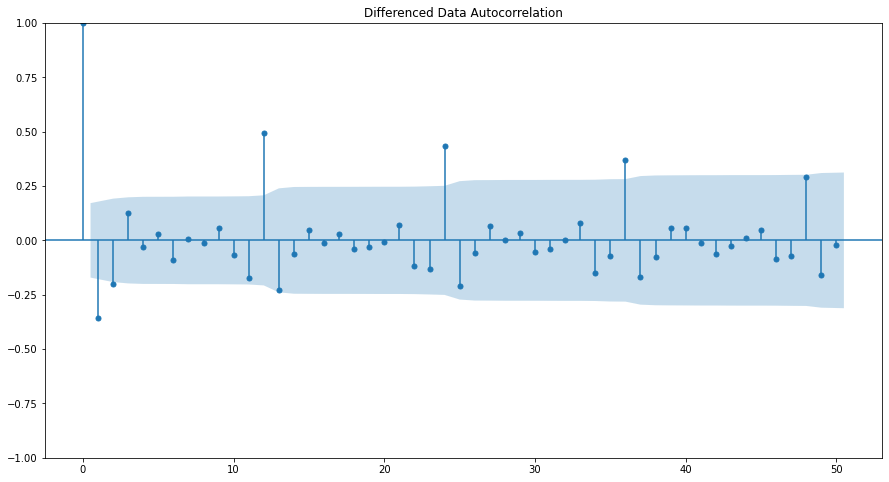

In [260]:
plot_acf(train_r['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

F:\DS\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


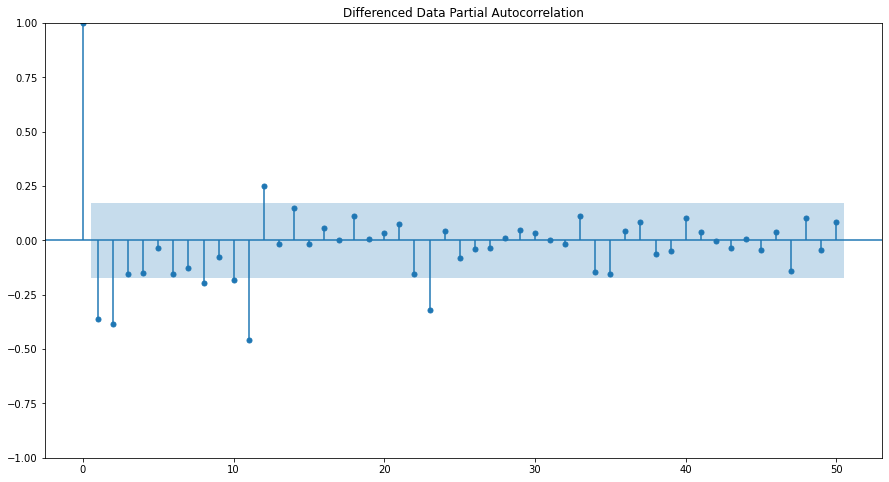

In [261]:
plot_pacf(train_r['Rose'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show();

**ARIMA - From plots we can see that p = 2 and q = 2 with d = 1**

**SARIMA - From plots P = 2 , Q = 4 and D = 1**

In [262]:
manual_ARIMA = ARIMA(train_r['Rose'].astype('float64'), order=(2,1,2))

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -635.935
Date:                Wed, 23 Mar 2022   AIC                           1281.871
Time:                        03:15:55   BIC                           1296.247
Sample:                    01-01-1980   HQIC                          1287.712
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4540      0.469     -0.969      0.333      -1.372       0.464
ar.L2          0.0001      0.170      0.001      0.999      -0.334       0.334
ma.L1         -0.2541      0.459     -0.554      0.5

F:\DS\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
F:\DS\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
F:\DS\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


### Predict on the Test Set using this model and evaluate the model.

In [263]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test_r))

In [264]:
rmse = mean_squared_error(test_r['Rose'],predicted_manual_ARIMA.values,squared=False)
print(rmse)

36.871196622260655


In [265]:
temp_resultsDf = pd.DataFrame({'Test RMSE-Rose': [rmse]}
                                          ,index=['ARIMA(2,1,2) Manual plot'])

resultsDf_r = pd.concat([resultsDf_r, temp_resultsDf])
resultsDf_r

Test RMSE-Rose
Linear Regression                                        15.268955
Naive Approach                                           79.718773
Simple Average                                           53.460570
2point Trailing Moving Average                           11.529278
4point Trailing Moving Average                           14.451403
6point Trailing Moving Average                           14.566327
9point Trailing Moving Average                           14.727630
Alpha= 0.098:Simple Exponential Smoothing                36.796227
Alpha=0.07:Tuned Simple Exponential Smoothing            36.435772
Alpha=1.4901-08,,Beta=1.661-10:Double Exponenti...       15.268944
Alpha=0.1,,Beta=0.1:Tuned Double Exponential Sm...       36.923416
Alpha=0.055,Beta=0.031,Gamma=0.00033:Triple Exp...       19.987449
Alpha=0.2,Beta=0.7,Gamma=0.2:Tuned Triple Expon...        8.702460
ARIMA(0,1,2) AIC criteria                                15.619203
SARIMA(0,1,2)(2,0,2,12) AIC criteria                     26.928362
ARIMA(2,1,2) Manual plot                                 36.871197

### SARIMA model for Rose

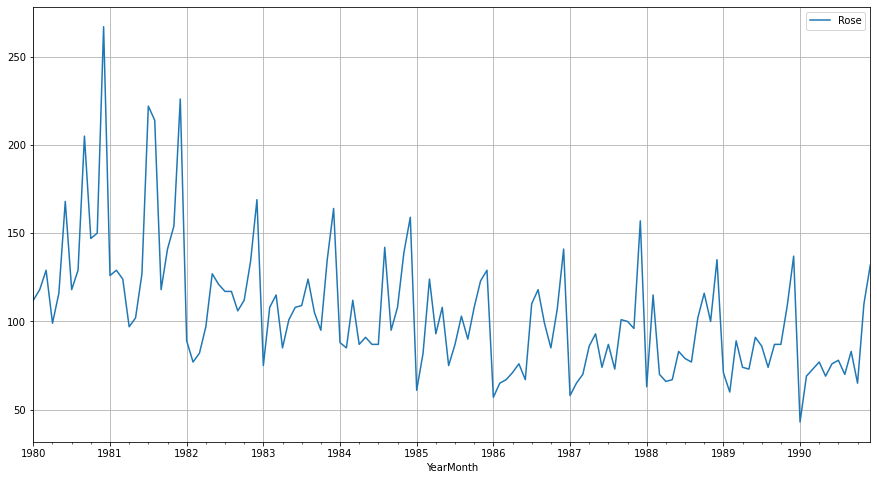

In [266]:
train_r.plot()
plt.grid();

We see that there is a t trend and a seasonality. So, now we take a seasonal differencing and check the series.

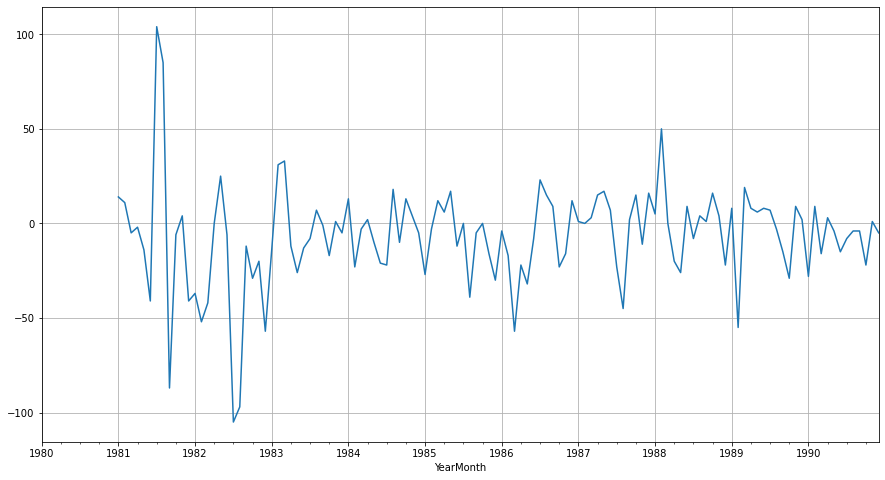

In [267]:
(train_r['Rose'].diff(12)).plot()
plt.grid();

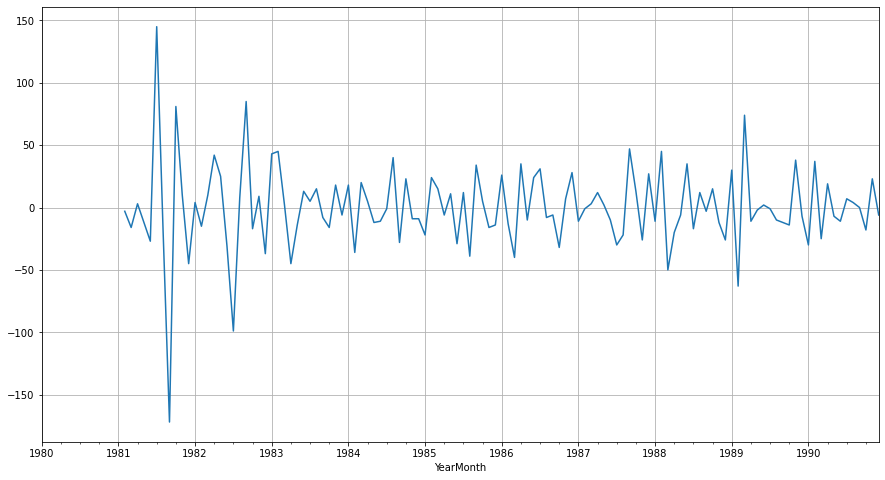

In [268]:
(train_r['Rose'].diff(12)).diff().plot()
plt.grid();

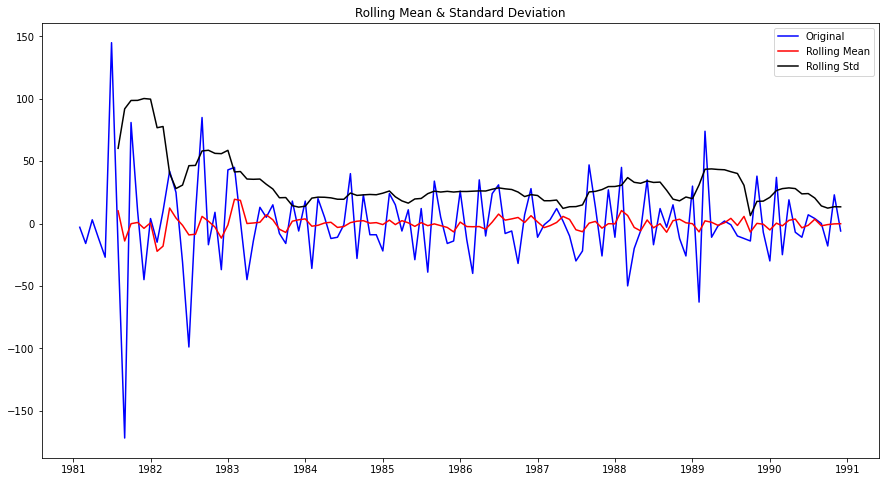

Results of Dickey-Fuller Test:
Test Statistic                  -3.692348
p-value                          0.004222
#Lags Used                      11.000000
Number of Observations Used    107.000000
Critical Value (1%)             -3.492996
Critical Value (5%)             -2.888955
Critical Value (10%)            -2.581393
dtype: float64 



In [269]:
test_stationarity((train_r['Rose'].diff(12).dropna()).diff().dropna())

In [270]:
import statsmodels.api as sm

manual_SARIMA_1 = sm.tsa.statespace.SARIMAX(train_r['Rose'].values,
                                order=(2, 1, 2),
                                seasonal_order=(2, 1, 4, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_1 = manual_SARIMA_1.fit(maxiter=1000)
print(results_manual_SARIMA_1.summary())

F:\DS\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                           SARIMAX Results                                           
Dep. Variable:                                             y   No. Observations:                  132
Model:             SARIMAX(2, 1, 2)x(2, 1, [1, 2, 3, 4], 12)   Log Likelihood                -276.118
Date:                                       Wed, 23 Mar 2022   AIC                            574.236
Time:                                               03:17:47   BIC                            598.651
Sample:                                                    0   HQIC                           583.910
                                                       - 132                                         
Covariance Type:                                         opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0068     

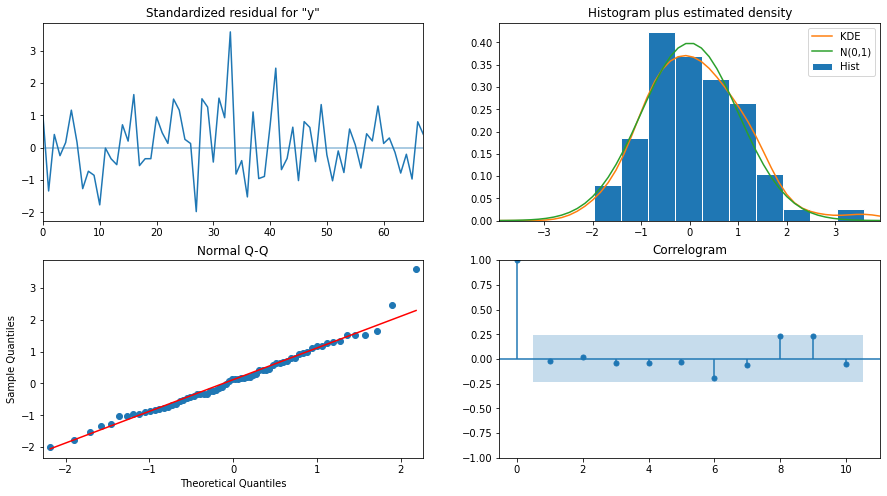

In [271]:
results_manual_SARIMA_1.plot_diagnostics()
plt.show()

### Predict on the Test Set using this model and evaluate the model.

In [272]:
predicted_manual_SARIMA_1= results_manual_SARIMA_1.get_forecast(steps=len(test_r))

In [273]:
predicted_manual_SARIMA_1.summary_frame(alpha=0.05).head()

y       mean    mean_se  mean_ci_lower  mean_ci_upper
0  45.359637  13.089497      19.704693      71.014580
1  58.633291  12.900133      33.349494      83.917088
2  72.015734  12.900802      46.730626      97.300841
3  71.130545  13.117850      45.420032      96.841057
4  71.864951  13.117176      46.155758      97.574144

In [274]:
rmse = mean_squared_error(test_r['Rose'],predicted_manual_SARIMA_1.predicted_mean,squared=False)
print(rmse)

16.9318177913651


In [275]:
temp_resultsDf = pd.DataFrame({'Test RMSE-Rose': [rmse]}
                                          ,index=['SARIMA(2,1,2)(2,1,4,12) Manual plot'])

resultsDf_r = pd.concat([resultsDf_r, temp_resultsDf])
resultsDf_r

Test RMSE-Rose
Linear Regression                                        15.268955
Naive Approach                                           79.718773
Simple Average                                           53.460570
2point Trailing Moving Average                           11.529278
4point Trailing Moving Average                           14.451403
6point Trailing Moving Average                           14.566327
9point Trailing Moving Average                           14.727630
Alpha= 0.098:Simple Exponential Smoothing                36.796227
Alpha=0.07:Tuned Simple Exponential Smoothing            36.435772
Alpha=1.4901-08,,Beta=1.661-10:Double Exponenti...       15.268944
Alpha=0.1,,Beta=0.1:Tuned Double Exponential Sm...       36.923416
Alpha=0.055,Beta=0.031,Gamma=0.00033:Triple Exp...       19.987449
Alpha=0.2,Beta=0.7,Gamma=0.2:Tuned Triple Expon...        8.702460
ARIMA(0,1,2) AIC criteria                                15.619203
SARIMA(0,1,2)(2,0,2,12) AIC criteria                     26.928362
ARIMA(2,1,2) Manual plot                                 36.871197
SARIMA(2,1,2)(2,1,4,12) Manual plot                      16.931818

## 8. Build a table with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

### Sparkling 

In [276]:
resultsDf

Test RMSE-Sparkling
Linear Regression                                           1389.135175
Naive Approach                                              3864.279352
Simple Average                                              1275.081804
2point Trailing Moving Average                               813.400684
4point Trailing Moving Average                              1156.589694
6point Trailing Moving Average                              1283.927428
9point Trailing Moving Average                              1346.278315
Alpha=0.049:Simple Exponential Smoothing                    1316.035487
Alpha=0.02:Tuned Simple Exponential Smoothing               1279.495201
Alpha=0.66,Beta=0.0001:DoubleExponentialSmoothing           5291.879833
Alpha=0.1,Beta=0.1:Tuned Double Exponential Smo...          1778.564670
Alpha=0.111,Beta=0.049,Gamma=0.362:Triple Expon...           380.398478
Alpha=0.4,Beta=0.01,Gamma=0.3:Tuned Triple Expo...           326.579641
ARIMA(2,1,2) AIC criteria                                   1299.979569
SARIMA(1,1,2)(1,0,2,12) AIC criteria                         528.611364
ARIMA(0,1,0) Manual plot                                    3864.279352
SARIMA(0,1,0)(2,1,4,12) Manual plot                          937.540131

In [277]:
resultsDf.sort_values(by='Test RMSE-Sparkling',ascending=True).style.background_gradient()

### Rose

In [278]:
resultsDf_r

Test RMSE-Rose
Linear Regression                                        15.268955
Naive Approach                                           79.718773
Simple Average                                           53.460570
2point Trailing Moving Average                           11.529278
4point Trailing Moving Average                           14.451403
6point Trailing Moving Average                           14.566327
9point Trailing Moving Average                           14.727630
Alpha= 0.098:Simple Exponential Smoothing                36.796227
Alpha=0.07:Tuned Simple Exponential Smoothing            36.435772
Alpha=1.4901-08,,Beta=1.661-10:Double Exponenti...       15.268944
Alpha=0.1,,Beta=0.1:Tuned Double Exponential Sm...       36.923416
Alpha=0.055,Beta=0.031,Gamma=0.00033:Triple Exp...       19.987449
Alpha=0.2,Beta=0.7,Gamma=0.2:Tuned Triple Expon...        8.702460
ARIMA(0,1,2) AIC criteria                                15.619203
SARIMA(0,1,2)(2,0,2,12) AIC criteria                     26.928362
ARIMA(2,1,2) Manual plot                                 36.871197
SARIMA(2,1,2)(2,1,4,12) Manual plot                      16.931818

In [279]:
resultsDf_r.sort_values(by='Test RMSE-Rose',ascending=True).style.background_gradient()

## 9. Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

### Sparkling best model is Triple Exponential smoothing with Alpha = 0.4 , Beta = 0.01, Gamma = 0.3
#### Building the most optimum model on the Full Data.

In [280]:
fullmodel1 = ExponentialSmoothing(df1,trend='multiplicative',
                                  seasonal='multiplicative').fit(smoothing_level=0.4,
                                                                 smoothing_trend=0.1,
                                                                 smoothing_seasonal=0.3)

F:\DS\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
F:\DS\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [281]:
RMSE_fullmodel1 = metrics.mean_squared_error(df1['Sparkling'],fullmodel1.fittedvalues,squared=False)

print('RMSE:',RMSE_fullmodel1)

RMSE: 390.51375925256656


In [282]:
# Getting the predictions for 12 months into the future
prediction_1 = fullmodel1.forecast(steps=12)

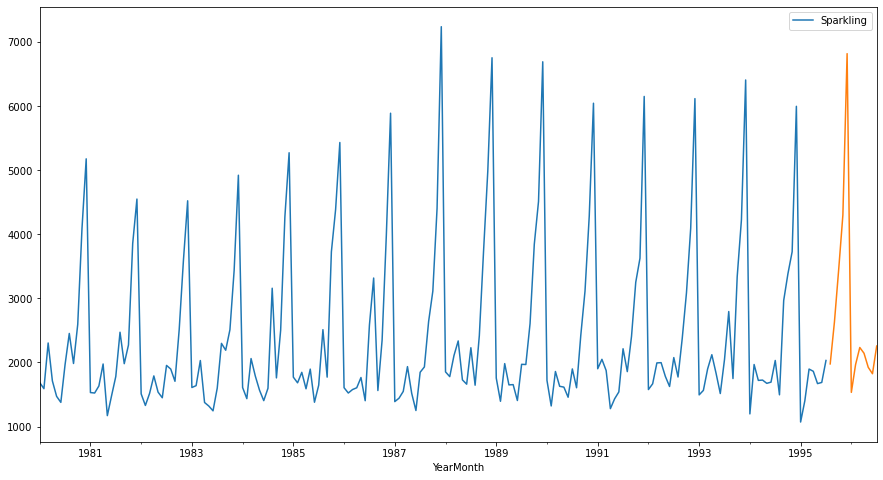

In [283]:
df1.plot()
prediction_1.plot();

In [284]:
#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level
#Here we are taking the multiplier to be 1.96 as we want to plot with respect to a 95% confidence intervals.
pred_1_df = pd.DataFrame({'lower_CI':prediction_1 - 1.96*np.std(fullmodel1.resid,ddof=1),
                          'prediction':prediction_1,
                          'upper_ci': prediction_1 + 1.96*np.std(fullmodel1.resid,ddof=1)})
pred_1_df.head()

lower_CI   prediction     upper_ci
1995-08-01  1211.419916  1977.321151  2743.222386
1995-09-01  1864.875002  2630.776236  3396.677471
1995-10-01  2678.340503  3444.241738  4210.142973
1995-11-01  3536.295410  4302.196645  5068.097880
1995-12-01  6055.267129  6821.168363  7587.069598

In [292]:
pred_1_df

lower_CI  prediction    upper_ci
1995-08-01  -0.538512   39.978825   80.496161
1995-09-01  -0.744898   39.772439   80.289776
1995-10-01   0.034640   40.551977   81.069314
1995-11-01   5.969809   46.487146   87.004483
1995-12-01  23.535285   64.052622  104.569959
1996-01-01 -16.118004   24.399333   64.916669
1996-02-01 -10.029194   30.488143   71.005479
1996-03-01  -5.152905   35.364432   75.881768
1996-04-01  -4.223762   36.293575   76.810911
1996-05-01  -9.811917   30.705419   71.222756
1996-06-01  -5.845705   34.671631   75.188968
1996-07-01  -3.264476   37.252860   77.770197

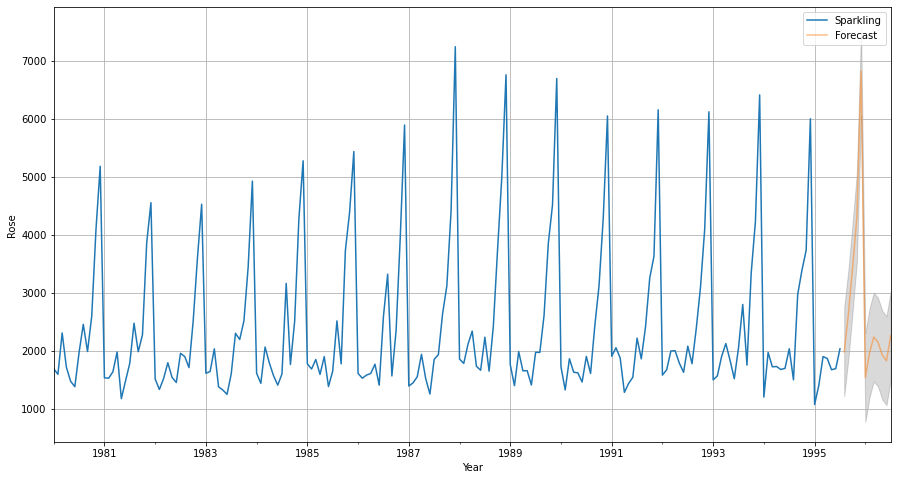

In [285]:
# plot the forecast along with the confidence band

axis = df1.plot(label='Actual', figsize=(15,8))
pred_1_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_1_df.index, pred_1_df['lower_CI'], pred_1_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year')
axis.set_ylabel('Rose')
plt.legend(loc='best')
plt.grid()
plt.show()

### Rose best model is Triple Exponential smoothing with Alpha = 0.2 , Beta = 0.7, Gamma = 0.2
#### Building the most optimum model on the Full Data.


In [286]:
fullmodel1 = ExponentialSmoothing(df2,trend='multiplicative',
                                  seasonal='multiplicative').fit(smoothing_level=0.2,
                                                                 smoothing_trend=0.7,
                                                                 smoothing_seasonal=0.2)

F:\DS\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
F:\DS\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [287]:
RMSE_fullmodel1 = metrics.mean_squared_error(df2['Rose'],fullmodel1.fittedvalues,squared=False)

print('RMSE:',RMSE_fullmodel1)

RMSE: 20.68138071086382


In [288]:
# Getting the predictions for 12 months into the future
prediction_1 = fullmodel1.forecast(steps=12)

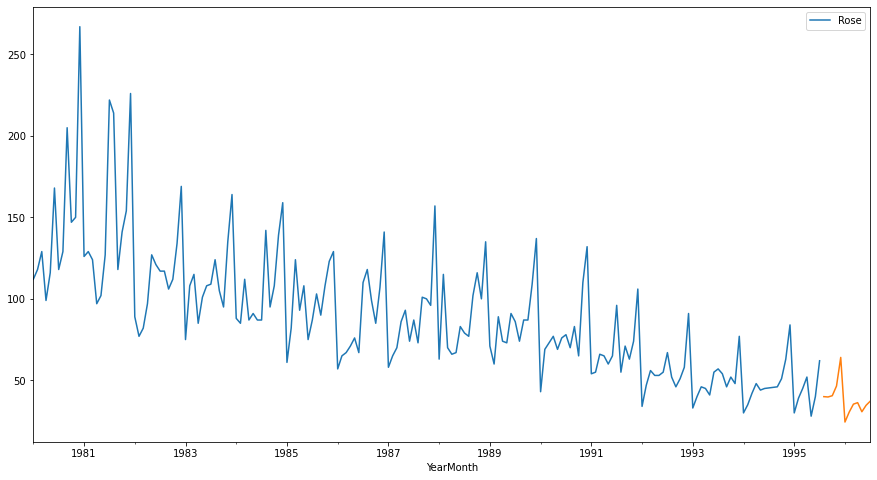

In [289]:
df2.plot()
prediction_1.plot();

In [290]:
#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level
#Here we are taking the multiplier to be 1.96 as we want to plot with respect to a 95% confidence intervals.
pred_1_df = pd.DataFrame({'lower_CI':prediction_1 - 1.96*np.std(fullmodel1.resid,ddof=1),
                          'prediction':prediction_1,
                          'upper_ci': prediction_1 + 1.96*np.std(fullmodel1.resid,ddof=1)})
pred_1_df.head()

lower_CI  prediction    upper_ci
1995-08-01  -0.538512   39.978825   80.496161
1995-09-01  -0.744898   39.772439   80.289776
1995-10-01   0.034640   40.551977   81.069314
1995-11-01   5.969809   46.487146   87.004483
1995-12-01  23.535285   64.052622  104.569959

In [293]:
pred_1_df

lower_CI  prediction    upper_ci
1995-08-01  -0.538512   39.978825   80.496161
1995-09-01  -0.744898   39.772439   80.289776
1995-10-01   0.034640   40.551977   81.069314
1995-11-01   5.969809   46.487146   87.004483
1995-12-01  23.535285   64.052622  104.569959
1996-01-01 -16.118004   24.399333   64.916669
1996-02-01 -10.029194   30.488143   71.005479
1996-03-01  -5.152905   35.364432   75.881768
1996-04-01  -4.223762   36.293575   76.810911
1996-05-01  -9.811917   30.705419   71.222756
1996-06-01  -5.845705   34.671631   75.188968
1996-07-01  -3.264476   37.252860   77.770197

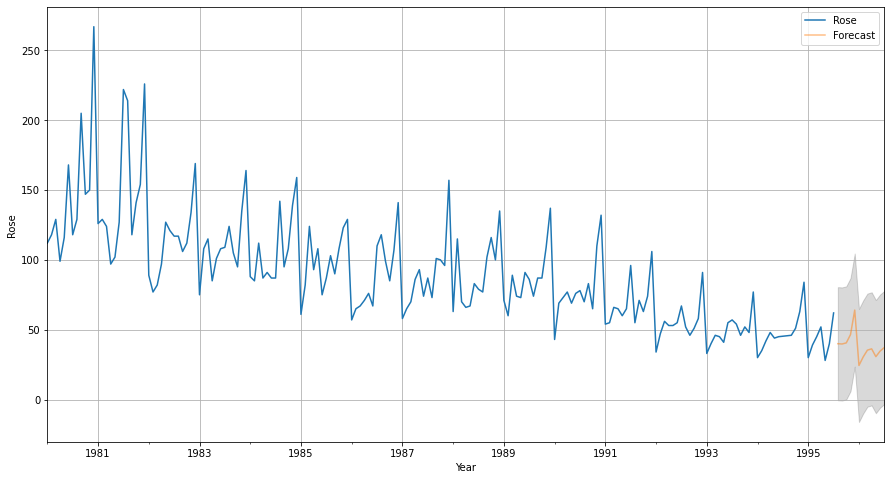

In [291]:
# plot the forecast along with the confidence band

axis = df2.plot(label='Actual', figsize=(15,8))
pred_1_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_1_df.index, pred_1_df['lower_CI'], pred_1_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year')
axis.set_ylabel('Rose')
plt.legend(loc='best')
plt.grid()
plt.show()

## 10. Comment on the model thus built and report your findings and suggest the measures that the company should be taking for future sales.

The problem statement states that we must analyse past sales of two distinct types of wines (Rose and Sparkling) for ABC Estate Wines throughout the twentieth century for 15 years. build several models based on the analysis, and choose the best fit model to forecast future sales.
1.	Let's take a look at a quick rundown of the stages involved in accomplishing this.
2.	First, we read the data as a time series and plotted it on a graph to show how sales for Sparkling and Rose wines have changed over the years.
3.	We performed some exploratory data analyses on the data sets, creating various types of charts for better understanding of sales.
4.	Next, we moved on to the model building section, where we began by splitting the data into test and train, treating all data less than 1991 as train and all data after and equal to 1991 as test.
5.	Started with Basic models, Built the models:
-	Linear Regression Model 
-	Naïve Approach 
-	Simple Average Model 
-	Moving Average Model 
6.	Then we moved on to create Exponential Smoothing models. We built the following: 
-	Simple Exponential Smoothing Model 
-	Tuned Simple Exponential Smoothing Model 
-	Double Exponential Smoothing Model
-	Tuned Double Exponential Smoothing Model
-	Triple Exponential Smoothing Model
-	Tuned Triple Exponential Smoothing Model.
7.	We calculate the RMSE values for all of these models to see how well they perform. The model with the lowest RMSE value is the most accurate.
8.	From here, we build ARIMA and SARIMA models, but first we examine the dataset for stationarity. By stating hypothesis for statistical testing, we employ the ADF test. If the series is not stationary, we use the difference of the series.
9.	The ARIMA/SARIMA models are now being built. Using AIC scores, we first create auto predictive models. Then we build the ones when the parameters are entered manually by the ACF and PACF graphs visually.
10.	We check the performance of all these models and compare the RMSE values in the tabular form sorted in the ascending order, where least RMSE is on top and the best fit model.
11.	Finally, we take the best fit model with minimum RMSE value and build that most optimum model on the complete data and then predict the sales for the next 12 months in future with appropriate confidence intervals
12.	All these steps are performed for both Rose and Sparkling wine sales separately.
13.	Finally, the suggestions and recommendations that the company must can take for future sales.


### Thank you